# Energy Analysis Sensitivity of Lifetime, Efficiency, and Material Circularity
This journal complements the 17-Energy Results journal to understand the sensitivity of our metrics to three module design aspects; lifetime, efficiency, and material circularity. This journal creates a simple modern module; 25 years, 20% efficiency, no material circularity, and modifies first one parameter, and then two parameters at a time. This will allow us to elucidate if there are multiplicative effects of changing design aspects

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis'/'Sensitivity')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
from platform import python_version 
print(python_version())

3.8.8


In [3]:
import PV_ICE
PV_ICE.__version__

'v0.2.0+475.g48de157.dirty'

#https://www.learnui.design/tools/data-color-picker.html#palette
#color pallette - modify here for all graphs below
colorpalette=['#000000', #PV ICE baseline
              '#595959', '#7F7F7F', '#A6A6A6', '#D9D9D9', # greys
              #'#067872','#0aa39e','#09d0cd','#00ffff', # teals
              '#0579C1','#C00000','#FFC000', #b,r,y
                '#6E30A0','#00B3B5','#10C483', #
               '#97CB3F','#FF7E00' #
                ] 

colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B'] #colors for material plots       

import matplotlib as mpl #import matplotlib
from cycler import cycler #import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=colorpalette) #reset the default color palette of mpl

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

scennames_labels = []  

scennames_labels_flat = [] 

In [4]:
MATERIALS = ['glass', 'silicon', 'silver', 'aluminium_frames', 'copper', 'encapsulant', 'backsheet']
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [5]:
#load in a baseline and materials for modification
sim1 = PV_ICE.Simulation(name='sim1', path=testfolder)

sim1.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis\Sensitivity
Baseline folder directed to default:  C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\baselines


## Create Sensitivity Scenarios
First, examine only the effect of one set of parameters (life, eff, material circularity) at a time. Possibly get to interactions.

In [6]:
timeshift = 2022-1995

### Life

In [7]:
#life sensitivity
#mod_reliability_t50, mod_reliability_t90, mod_degradation, mod_lifetime

sim1.createScenario(name='life_high', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['life_high'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim1.modifyScenario('life_high', 'mod_degradation', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']-0.1, start_year=2022) #standard current degrdation
#T50
sim1.modifyScenario('life_high', 'mod_reliability_t50',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']+10, start_year=2022)
#t90
sim1.modifyScenario('life_high', 'mod_reliability_t90',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']+10, start_year=2022) 
#Mod Project Lifetime
sim1.modifyScenario('life_high', 'mod_lifetime',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']+10, start_year=2022) #project lifetime of 25 years

#--------------------------------------------------------------------------------------

#life low
sim1.createScenario(name='life_low', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['life_low'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim1.modifyScenario('life_low', 'mod_degradation', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']+0.1, start_year=2022) #standard current degrdation
#T50
sim1.modifyScenario('life_low', 'mod_reliability_t50',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']-10, start_year=2022)
#t90
sim1.modifyScenario('life_low', 'mod_reliability_t90',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']-10, start_year=2022) 
#Mod Project Lifetime
sim1.modifyScenario('life_low', 'mod_lifetime',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']-10, start_year=2022) #project lifetime of 25 years



### Efficiency

In [8]:
sim1.createScenario(name='eff_high', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['eff_high'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
sim1.modifyScenario('eff_high', 'mod_eff', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']+5, start_year=2022) #

#-------------------------------------------------------------------------------------------------------

sim1.createScenario(name='eff_high_bifi', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['eff_high_bifi'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
sim1.modifyScenario('eff_high_bifi', 'mod_eff', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']+5, start_year=2022) #

#------------------------------------------------------------------------------------------------------

sim1.createScenario(name='eff_low', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['eff_low'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
sim1.modifyScenario('eff_low', 'mod_eff', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']-5, start_year=2022) #

### Material Circularity
Here, we will use recycling as a stand in for the forms of material circularity. We set to 0 or 25% closed loop (through yield). The other variables are being changed by ~25% as well.

In [9]:
mod_circ_vars = ['mod_EOL_collection_eff', 'mod_EOL_pg4_recycled', 'mod_EOL_pb4_recycled']
mat_circ_vars = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
                 'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG']

In [10]:
sim1.createScenario(name='circ_high', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['circ_high'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
for var in range(0,len(mod_circ_vars)):
    sim1.modifyScenario('circ_high', mod_circ_vars[var], 100.0, start_year=2022) #

for mat in range (0, len(MATERIALS)):
    for mvar in range(0,len(mat_circ_vars)):
        sim1.scenario['circ_high'].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar],100.0, start_year=2022) #
        sim1.scenario['circ_high'].modifyMaterials(MATERIALS[mat], 'mat_Recycling_yield',25.0, start_year=2022) #

#-----------------------------------------------------------------------------------------------------------

sim1.createScenario(name='circ_low', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['circ_low'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
for var in range(0,len(mod_circ_vars)):
    sim1.modifyScenario('circ_low', mod_circ_vars[var],0.0, start_year=2022) #

for mat in range (0, len(MATERIALS)):
    for mvar in range(0,len(mat_circ_vars)):
        sim1.scenario['circ_low'].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar],0.0, start_year=2022) #

In [11]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim1.trim_Years(startYear=2000, endYear=2100)

Trimming and extending  PV_ICE
PV_ICE glass : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE silicon : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE silver : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE copper : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE encapsulant : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE backsheet : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE backsheet : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  life_high
life_high glass : Data trimmed for Energy, years now encompass  2000  to  2100
life_high silicon : Data trimmed for Energy, years now encompass  2000  to  2100
life_high silver : Data trimmed for Energy, years now encompass  2000  to  2100
life_high aluminium_frames : Data trimmed for Energy, years 

In [12]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
global_projection.iloc[-1,:]

#fig, ax1 = plt.subplots()

#ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
#ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
#ax1.set_ylim(0,90)
#ax1.set_xlim(2000,2100)
#ax2 = ax1.twinx()
#ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
#ax2.set_ylabel('Annual Installations [TW]')
#ax2.set_ylim(0,5)
#plt.show()

#fig.savefig('energyresults-deployment.png', dpi=300, bbox_inches='tight')

World_cum              85966000.0
World_annual_[MWdc]      219320.0
Name: 2100, dtype: float64

In [13]:
#deployment projection for all scenarios
sim1.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)

In [14]:
sim1.scenario.keys()

dict_keys(['PV_ICE', 'life_high', 'life_low', 'eff_high', 'eff_high_bifi', 'eff_low', 'circ_high', 'circ_low'])

In [15]:
bifiFactors = {'PV_ICE':0.0,
               'life_high':0.0,
               'life_low': 0.0,
               'eff_high': 0.0,
               'eff_high_bifi': 0.9,
               'eff_low': 0.0,
               'circ_high':0.0,
               'circ_low': 0.0
              } 

#PV ICE currently set up to read in a csv of bifi factors, so generate files to read in 
idx_temp = pd.RangeIndex(start=2000,stop=2101,step=1) #create the index
df_temp = pd.DataFrame(index=idx_temp, columns=['bifi'], dtype=float)
bifiPathDict={}

for f in bifiFactors.keys(): #loop over module types
    bifi = df_temp.copy() #copy of df
    bifi['bifi'] = bifiFactors[f] #assign column
    bifipath = os.path.join(testfolder,'bifi_'+str(f)+'.csv') #create file path
    bifi.to_csv(path_or_buf=bifipath, index_label='year') #create file
    bifiPathDict[str(f)] = bifipath
    #append bifi path to dict? or list?

## Calculate Mass Flow: Identical Installs

In [16]:
#CALCULATE MASS FLOWs
#13 scenarios, 7 mats = 

for scen in sim1.scenario.keys(): #loop over scenarios
    sim1.calculateMassFlow(scenarios=[scen], bifacialityfactors=bifiPathDict[scen])

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Mate

In [17]:
#sim1.calculateMassFlow()

In [18]:
ii_yearly, ii_cumu = sim1.aggregateResults() #have to do this to get auto plots
sim1.saveSimulation(customname='_EnergySensitivity_identicalinstalls')

:) Saved Input and Output Dataframes


(0.0, 90.26425956655)

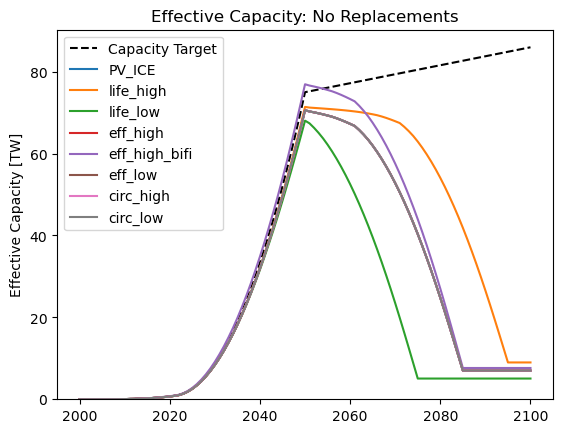

In [19]:
effective_capacity = ii_yearly.filter(like='ActiveCapacity')
plt.plot(ii_cumu['newInstalledCapacity_sim1_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity/1e6, label=sim1.scenario.keys())
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

In [20]:
sim1.scenario['eff_high'].dataIn_m

year  new_Installed_Capacity_[MW]    mod_eff  mod_reliability_t50  \
0    2000                      808.669  13.420000                 19.0   
1    2001                      284.317  13.600000                 19.0   
2    2002                      344.073  13.722222                 19.0   
3    2003                      527.971  13.844444                 19.0   
4    2004                     1086.949  13.966667                 19.0   
..    ...                          ...        ...                  ...   
96   2096                   219320.000  30.001640                 40.0   
97   2097                   219320.000  30.001640                 40.0   
98   2098                   219320.000  30.001640                 40.0   
99   2099                   219320.000  30.001640                 40.0   
100  2100                   219320.000  30.001640                 40.0   

     mod_reliability_t90  mod_degradation  mod_lifetime  mod_MFG_eff  \
0                   23.0             0.75          20.0         98.0   
1                   23.0             0.75          20.0         98.0   
2                   23.0             0.75          20.0         98.0   
3                   23.0             0.75          20.0         98.0   
4                   23.0             0.75          20.0         98.0   
..                   ...              ...           ...          ...   
96                  44.0             0.50          35.0         98.0   
97                  44.0             0.50          35.0         98.0   
98                  44.0             0.50          35.0         98.0   
99                  44.0             0.50          35.0         98.0   
100                 44.0             0.50          35.0         98.0   

     mod_Repair  mod_MerchantTail  ...  mod_EOL_pg1_landfill  \
0           0.0               0.0  ...                  60.0   
1           0.0               0.0  ...                  60.0   
2           0.0               0.0  ...                  60.0   
3           0.0               0.0  ...                  60.0   
4           0.0               0.0  ...                  60.0   
..          ...               ...  ...                   ...   
96          0.0               0.0  ...                  60.0   
97          0.0               0.0  ...                  60.0   
98          0.0               0.0  ...                  60.0   
99          0.0               0.0  ...                  60.0   
100         0.0               0.0  ...                  60.0   

     mod_EOL_pg2_stored  mod_EOL_pg3_reMFG  mod_EOL_pg4_recycled  \
0                   0.0                0.0                  40.0   
1                   0.0                0.0                  40.0   
2                   0.0                0.0                  40.0   
3                   0.0                0.0                  40.0   
4                   0.0                0.0                  40.0   
..                  ...                ...                   ...   
96                  0.0                0.0                  40.0   
97                  0.0                0.0                  40.0   
98                  0.0                0.0                  40.0   
99                  0.0                0.0                  40.0   
100                 0.0                0.0                  40.0   

     mod_EOL_reMFG_yield  mod_EOL_sp_reMFG_recycle  mod_EOL_pb1_landfill  \
0                    0.0                     100.0                  60.0   
1                    0.0                     100.0                  60.0   
2                    0.0                     100.0                  60.0   
3                    0.0                     100.0                  60.0   
4                    0.0                     100.0                  60.0   
..                   ...                       ...                   ...   
96                   0.0                     100.0                  60.0   
97                   0.0                     100.0       

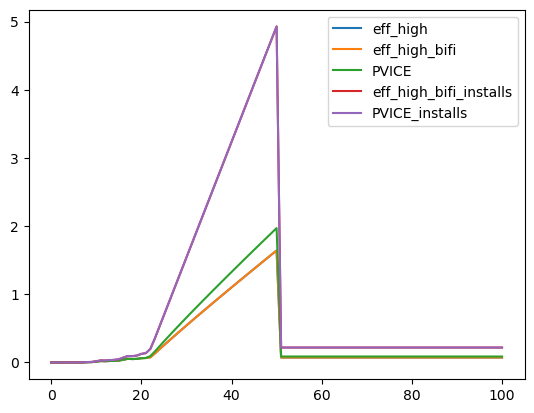

In [21]:
#plt.plot(sim1.scenario['eff_high'].dataOut_m['Yearly_Sum_Area_PathsBad'])
#plt.plot(sim1.scenario['eff_high'].dataOut_m['Cumulative_Active_Area'])
plt.plot(sim1.scenario['eff_high'].dataOut_m['Area']/1e10, label='eff_high')

#plt.plot(sim1.scenario['eff_high_bifi'].dataOut_m['Yearly_Sum_Area_PathsBad'])
#plt.plot(sim1.scenario['eff_high_bifi'].dataOut_m['Cumulative_Active_Area'])
plt.plot(sim1.scenario['eff_high_bifi'].dataOut_m['Area']/1e10, label='eff_high_bifi')

plt.plot(sim1.scenario['PV_ICE'].dataOut_m['Area']/1e10, label='PVICE')


plt.plot(sim1.scenario['eff_high_bifi'].dataIn_m['new_Installed_Capacity_[MW]']/1e6, label='eff_high_bifi_installs')
plt.plot(sim1.scenario['PV_ICE'].dataIn_m['new_Installed_Capacity_[MW]']/1e6, label='PVICE_installs')
plt.legend()

## Calculate Flows: Capacity Compensation

In [22]:
UnderInstall_df = pd.DataFrame()


for row in range (0,len(sim1.scenario['PV_ICE'].dataIn_m)): #loop over length of years
    print(row)
    for scen in sim1.scenario.keys(): #loop over scenarios
        print(scen)
        Under_Installment = global_projection.iloc[row,0] - ((sim1.scenario[scen].dataOut_m['Effective_Capacity_[W]'][row])/1e6)  # MWATTS
        sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        UnderInstall_df.loc[row,scen] = Under_Installment #save the underinstallment as df
        #calculate flows for that scenario with it's bifi factor and modified weibull
        sim1.calculateMassFlow(scenarios=[scen], bifacialityfactors=bifiPathDict[scen])

sim1.calculateEnergyFlow()

0
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
1
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
2
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
3
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
4
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
5
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
6
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
7
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
8
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
9
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
10
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
11
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
12
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
13
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
14
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
15
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
16
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
17
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
18
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
19
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
20
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
21
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522281.0480266041  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_low

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
22
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787195276.6245084  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92137323.551914  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522370.0331784635  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315981852.8637393  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1905079.478916816  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185870755.69400868  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78249089.93890864  tonnes.
circ_low
>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
23
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787421571.4978733  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92145977.2661618  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522470.6197191128  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316010223.10240877  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1905299.08363438  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185888718.48207664  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78260304.15714504  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
24
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787753322.5102015  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92158135.3186515  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522593.43704018486  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316050622.1522593  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1905609.6324606165  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185913857.16491142  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78275471.89481662  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
25
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2788227043.1910014  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92175283.71670865  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522747.92204010184  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316107844.0453842  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1906031.5436963488  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185948190.46619388  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78296097.5906738  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
26
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2788888852.2380667  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92198945.35354482  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522940.98065930686  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316187461.4129709  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1906594.3077959258  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185994449.43586808  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78322998.88555433  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
27
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2789926501.1222167  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92235084.68404324  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  523177.6819884945  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316309971.9112594  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1907391.761098963  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  186064979.1339966  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78359045.09197274  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
28
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2791301481.9354954  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92281736.62505063  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  523468.5348794645  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316469328.64485127  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1908399.0236872435  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  186155843.23558044  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78404029.8430971  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
29
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2793101589.7211823  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92341238.93991047  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  523820.6539082674  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316674172.1953207  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1909655.0701142598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  186273929.41358855  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78459126.38977602  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
30
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2795367450.4316335  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92415953.5149775  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  524234.9240568888  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316931048.95472646  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1911181.2284745786  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  186423578.9659491  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78524902.07039961  tonnes.
circ_low

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
31
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2797740088.0142555  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92493997.85689422  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  524670.3802205924  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  317199017.14066404  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1912786.0908413366  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  186581352.8259736  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78590032.36400834  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
32
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2800993751.8636756  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92601022.23171073  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  525267.2749926466  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  317566489.36051166  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1914986.48129674  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  186797712.50454617  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78679320.83767305  tonnes.
circ_low

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
33
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2804174565.4355016  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92705650.30630213  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  525850.6512047087  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  317925733.79332805  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1917137.3588633481  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  187009227.84044114  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78766594.05575582  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
34
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2808613754.4781585  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92851670.7478629  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  526664.6914524983  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  318427100.4763427  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1920138.9447025075  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  187304421.67694125  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78888380.21572058  tonnes.
circ_low

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
35
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2813439329.2291484  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  93010400.76570019  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  527549.5047579606  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  318972105.96795267  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1923401.651473931  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  187625309.09812894  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  79020757.86377515  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
36
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2818032791.4253945  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  93161495.79043178  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  528391.7146926689  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  319490896.4233161  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1926507.3449560367  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  187930761.67415085  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  79146763.28798284  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
37
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2824257545.2388563  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  93366249.69744375  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  529532.9892598252  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  320193926.6709692  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1930715.915950823  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  188344690.64671937  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  79317513.8106859  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
38
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2830060746.3905454  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  93557137.2641801  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  530596.9585714351  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  320849346.31728977  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1934639.4446724465  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  188730587.5291201  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  79476698.9404396  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
39
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2836579374.5242863  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  93771557.72460942  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  531792.0864684732  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  321585567.03999704  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1939046.6541563289  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  189164058.33404103  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  79655507.5719415  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
40
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2844772000.2107983  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  94041041.81478697  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  533294.1201828112  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  322510850.80830634  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1944585.6332488398  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  189708845.3625212  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  79880233.96856377  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
41
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2852784634.3728247  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  94304605.35469502  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  534763.1517727083  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  323415806.14438707  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1950002.9160047998  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  190241663.45069712  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  80100022.82646595  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
42
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2861674070.7769837  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  94597009.98456965  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  536392.9345323204  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  324419788.44858617  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1956012.9955901532  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  190832786.47142273  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  80343862.46569243  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
43
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2872313003.2230663  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  94946961.65335065  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  538343.4680064864  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  325621360.67721933  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1963205.8946048683  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  191540246.15715513  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  80635691.17438301  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
44
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2884196069.6063523  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  95337837.2352891  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  540522.0997540507  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  326963446.70225245  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1971239.942219598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  192330437.3207574  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  80961646.76876783  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
45
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2895657711.0240116  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  95714850.67732444  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  542623.4677022506  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  328257936.54809034  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1978989.0675110093  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  193092604.88563365  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  81276042.55495977  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
46
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2909514269.5710473  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  96170641.31343117  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  545163.9177613085  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  329822910.85532695  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1988357.3772798944  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  194014027.83898902  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  81656131.53223194  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
47
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2922924819.8279414  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  96611761.17817841  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  547622.5970177903  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  331337512.51682204  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1997424.1443416267  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  194905792.47029212  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  82023986.38569231  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
48
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2938565694.2934284  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  97126244.20061798  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  550490.1820781209  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  333104009.34199774  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2007998.8159697722  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  195945867.5144763  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  82453019.60724808  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
49
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2955371900.3007436  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  97679059.05003479  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  553571.4180643447  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  335002119.93809533  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2019361.359042944  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  197063433.89442506  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  82914018.17354493  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
50
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2975389712.6847734  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  98337514.8570096  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  557241.4673220231  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  337262952.73880476  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2032895.2438078865  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  198394563.2469258  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  83463111.93124261  tonnes.
circ_low

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
51
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2997077331.212422  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  99050896.42363763  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  560767.4137569807  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  339712375.20295477  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2047558.0713110892  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  199836730.10582942  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  84058008.90221876  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
52
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3015817080.9179287  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  99667312.28257981  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  564203.1440543853  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  341828862.2595073  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2060227.8679987553  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  201082871.81267345  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  84572045.07094066  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
53
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3035416181.6079946  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  100311995.19863883  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  567796.4270544758  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  344042405.3207792  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2073478.6650961826  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  202386157.99153593  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  85109653.45885612  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
54
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3055971913.195142  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  100988145.04810843  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  571428.0465142544  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  346363991.282484  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2087376.2327834861  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  203753057.4884865  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  85665862.4336774  tonnes.
circ_low
>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
55
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3077552471.375847  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  101698005.02577409  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  574907.5228115292  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  348801322.238362  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2101422.880456818  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  205188105.12938696  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  86200868.42035276  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
56
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3099775636.2760825  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  102394201.90379474  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  578237.8342585985  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  351227318.19112796  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2115078.32507386  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  206596889.55809063  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  86714638.74314183  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
57
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3120846512.782079  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  103028070.13692683  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  580869.3039919726  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  353463949.5712474  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2127242.775371737  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  207879100.6267007  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  87144186.62409392  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
58
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3141313723.7506366  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  103638822.48560081  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  583282.4200130433  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  355626826.0576378  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2138675.5043504247  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  209107859.0308703  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  87539226.61699185  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
59
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3161209910.5689354  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  104235758.12859832  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  585633.9891010947  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  357735405.107835  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2149515.978349514  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  210311380.46317437  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  87909011.25213963  tonnes.
circ_low

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
60
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3180885815.8628216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  104828164.82524592  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  588044.6004268441  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  359824289.52355015  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2160356.4688913035  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  211531178.87541956  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  88269545.89969556  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
61
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3200477911.0676184  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  105424114.46718764  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  590617.9217952703  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  361911204.6060303  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2171457.4305810607  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  212780225.36896104  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  88645579.93173994  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
62
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3213364918.3037395  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  105764716.64868635  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  591109.5194818717  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  363145046.2009012  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2176266.0539972535  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  213577083.50659513  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  88685426.03433602  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
63
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3224276117.0574393  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  106072112.84309636  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  591747.0710837702  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  364229434.64980394  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2180891.533722879  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  214325096.8655666  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  88721504.03642517  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
64
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3233159691.4400015  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  106355022.30992965  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  592712.4385074496  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  365183516.62116724  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2185720.4844666948  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  214967588.90801114  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  88785433.40861087  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
65
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3242505656.2274404  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  106657342.84706168  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  594478.3200243704  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  366212001.7636639  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2192232.450732148  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  215617689.47829115  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  88942766.62065046  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
66
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3180084591.6749086  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  104604095.8866218  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  583034.0933911637  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  359162101.0308466  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2150030.062261832  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  211466860.72407037  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  87230540.71719038  tonnes.
circ_low

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
67
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3108316553.9718065  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  102243394.31373188  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  569876.2003884964  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  351056543.3121035  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2101508.259107552  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  206694484.01650354  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  85261924.9289682  tonnes.
circ_low

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
68
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3028386085.161887  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  99614201.85591367  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  555221.813980373  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  342029112.0326631  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2047467.9007844112  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  201379328.13678688  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  83069411.54982078  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
69
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2939464840.3230333  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  96689271.3538033  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  538919.0660900951  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  331986253.04513544  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1987348.9498364474  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  195466310.43059915  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  80630278.86484602  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
70
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2842607769.427746  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  93503303.7988045  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  521161.3703779141  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  321047113.5098179  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1921864.6496034728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  189025582.16356662  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  77973464.42393544  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
71
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2738586442.8181143  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  90081678.83592993  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  502090.1859157266  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  309298835.3932743  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1851536.652696552  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  182108450.63691542  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  75120132.6006148  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
72
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2625935825.684617  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  86376206.35033397  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  481436.91442655836  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  296575956.12207294  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1775374.460658196  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  174617495.07359102  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  72030097.11212347  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
73
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2506647741.0719676  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  82452404.3629218  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  459566.7351091357  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  283103434.28740734  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1694724.7293088338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  166685166.2164086  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  68757994.17840911  tonnes.
circ_low

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
74
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2379819490.372835  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  78280579.9617737  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  436314.1479432675  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  268779318.15841615  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1608977.1512534993  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  158251437.09590587  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  65279062.543803245  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
75
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2245536746.9510183  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  73863551.24323379  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  411694.8602130056  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  253613283.77498367  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1518189.6495764325  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  149322004.75465128  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  61595652.25077597  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
76
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2105520501.6696033  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  69257927.61125739  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  386024.3969676588  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  237799701.65664226  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1423525.772600281  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  140011310.34182188  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  57754970.5226664  tonnes.
circ_low

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
77
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  1959083922.049504  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  64441116.74528538  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  359176.8349054366  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  221261000.2202678  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1324521.158313531  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  130273681.39053562  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  53738177.36739079  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
78
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  1805724760.735071  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  59396597.97455112  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  331060.09240925784  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  203940455.12086532  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1220836.241247966  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  120075719.8358844  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  49531496.010418765  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
79
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  1646019453.358442  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  54143332.28150599  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  301779.85271379474  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  185903169.6054645  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1112860.744979274  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  109455757.05869274  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  45150738.229843184  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
80
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  1481457612.8480675  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  48730318.24122223  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  271609.2202281302  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  167317382.12611946  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1001601.7850369237  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  98512848.21318437  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  40636764.49256736  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
81
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  1310308917.5888746  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  43100639.52870291  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  240230.959210561  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  147987668.3383473  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  885889.5046505865  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  87131931.68089166  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  35942111.63031817  tonnes.
circ_low
>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
82
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  1135215822.7825544  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  37341215.730306655  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  208129.5352243238  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  128212469.91398415  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  767510.4469004982  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  75488723.44986369  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  31139262.870953165  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
83
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  954885228.7516917  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  31409512.278556384  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  175067.87243814635  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  107845742.81439057  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  645590.3573132949  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  63497235.95546063  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  26192748.15673938  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
84
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  771108458.209719  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  25364452.037759025  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  141374.3904849315  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  87089800.91230604  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  521340.33501985366  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  51276587.22106629  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  21151703.931814503  tonnes.
circ_low

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
85
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  583674688.7977773  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  19199100.323755916  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  107010.43736680906  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  65920833.70861661  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  394617.84468934353  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  38812758.14086345  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  16010347.284489097  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
86
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  541258251.8884532  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  17803875.47808761  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  99233.84271173221  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  61130276.678002685  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  365940.42688485445  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  35992181.99021735  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  14846853.477883097  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
87
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  500953793.6608844  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  16478120.992143434  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  91844.45649104803  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  56578248.74270194  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  338690.9011774867  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  33312046.601089396  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  13741291.791345526  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
88
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  473287878.4664393  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  15568092.3553685  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  86772.21035474804  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  53453631.16045556  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  319986.1945405117  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  31472339.490610827  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  12982408.600575961  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
89
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  452197757.66976273  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  14874364.57722973  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  82905.56495468837  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  51071690.718947  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  305727.33053158113  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  30069904.5840552  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  12403901.146497197  tonnes.
circ_low
>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
90
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  429941374.7770426  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  14142274.362933483  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  78825.0980212005  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  48558031.408744134  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  290679.96593573707  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  28589916.462444384  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  11793402.822262915  tonnes.
circ_l

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
91
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  406430660.41854113  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  13368924.803126842  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  74514.66298847455  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  45902706.58252997  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  274784.55774805555  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  27026518.755418587  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  11148497.862341914  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
92
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  379712340.90829295  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  12490065.900034772  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  69616.14826550975  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  42885111.45426326  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  256720.51306492495  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  25249824.146273278  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  10415607.465641463  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
93
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  350786605.0973553  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  11538597.360399228  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  64312.92765359517  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  39618208.405546635  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  237164.05166469404  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  23326342.436986063  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  9622167.07036514  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
94
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  319830312.2845469  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  10520336.704641059  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  58637.42639110793  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  36121972.11174462  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  216234.74672168825  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  21267834.283486955  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  8773027.972703991  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
95
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  287058768.3494613  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  9442366.09558476  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  52629.11848092178  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  32420719.445522044  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  194078.16483967655  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  19088616.933364976  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  7874096.068477805  tonnes.
circ_low

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
96
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  252461179.52559337  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  8304330.488528256  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  46286.025002763716  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  28513231.347528692  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  170687.00843842118  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  16787972.630896233  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  6925075.281886872  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
97
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  198678686.19520208  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  6535236.325410165  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  36425.58691212609  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  22438979.941201463  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  134325.089706305  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  13211585.054205708  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  5449807.6155453995  tonnes.
circ_lo

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
98
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  138970435.17024675  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  4571223.282553531  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  25478.72527975299  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  15695467.223602524  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  93956.81302435767  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  9241150.922791  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  3811994.886972222  tonnes.
circ_low
>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
99
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  73253083.5953516  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  2409549.9221808827  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  13430.160095090034  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  8273280.364921921  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  49525.8309466649  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  4871128.166470632  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  2009350.9801444006  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
100
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet


>>>> Calculating Energy Flows <<<<

Working on Scenario:  PV_ICE
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Working on Energy for Material :  copper
==> Working on Energy for Material :  encapsulant
==> Working on Energy for Material :  backsheet
Working on Scenario:  life_high
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Working on Energy for Material :

In [23]:
sim1.saveSimulation(customname='_EnergySensitivity_withreplacements')

#aggregate results - mass
cc_yearly, cc_cumu = sim1.aggregateResults() #have to do this to get auto plots
cc_yearly.to_csv(os.path.join(testfolder, 'cc_10scen_yearly.csv'))
cc_cumu.to_csv(os.path.join(testfolder, 'cc_10scen_cumu.csv'))

#aggregate results - energy
allenergy, energyGen, energy_demands = sim1.aggregateEnergyResults()
allenergy.to_csv(os.path.join(testfolder, 'cc_10scen_allenergy.csv'))
energyGen.to_csv(os.path.join(testfolder, 'cc_10scen_energyGen.csv'))
energy_demands.to_csv(os.path.join(testfolder, 'cc_10scen_energy_demands.csv'))

UnderInstall_df.to_csv(os.path.join(testfolder, 'cc_10scen_underInstalls.csv'))

:) Saved Input and Output Dataframes


C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_demands_scen.loc[:,colname] = energy_demands_scen.sum(axis=1)
C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_demands_scen.loc[:,colname] = energy_demands_scen.sum(axis=1)
C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

Text(0.5, 1.0, 'Cumulative Installs with Replacements')

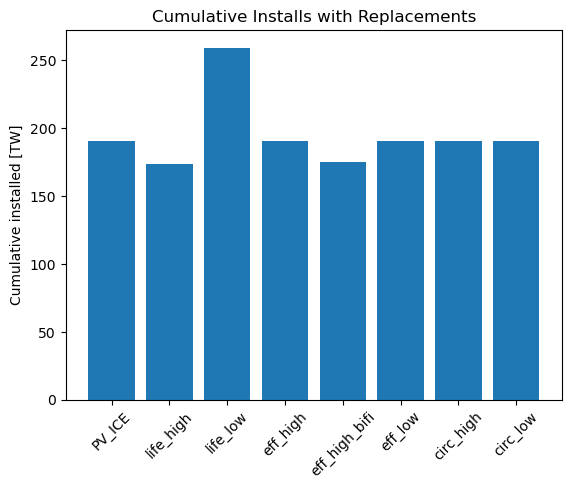

In [26]:
cumu_installs = cc_cumu.filter(like='newInstalled')
total_installed = cumu_installs.loc[2100]
total_installed.index= scennames_labels

plt.bar(scennames_labels, total_installed/1e6)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
#plt.ylim(0,410)

Text(0.5, 1.0, 'Cumulative Area Deployed with Replacements')

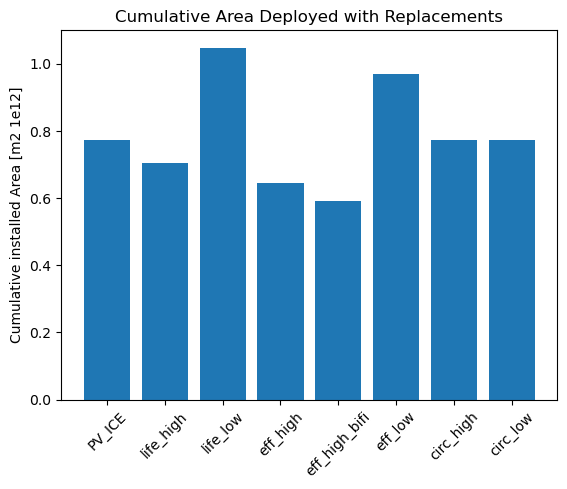

In [27]:
cumu_area_deployed = pd.DataFrame()

for scen in sim1.scenario.keys():
    area_deploy = sim1.scenario[scen].dataOut_m['Area'].cumsum()
    cumu_area_deployed = pd.concat([cumu_area_deployed,area_deploy], axis=1)
    
cumu_area_deployed.columns = sim1.scenario.keys()
cumu_area_deployed_total = cumu_area_deployed.iloc[-1,:]
#cumu_area_deployed

plt.bar(scennames_labels, cumu_area_deployed.iloc[-1,:]/1e12)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed Area [m2 1e12]')
plt.title('Cumulative Area Deployed with Replacements')
#plt.ylim(0,410)

Text(0, 0.5, 'Virgin Material Requirements\n[billion tonnes]')

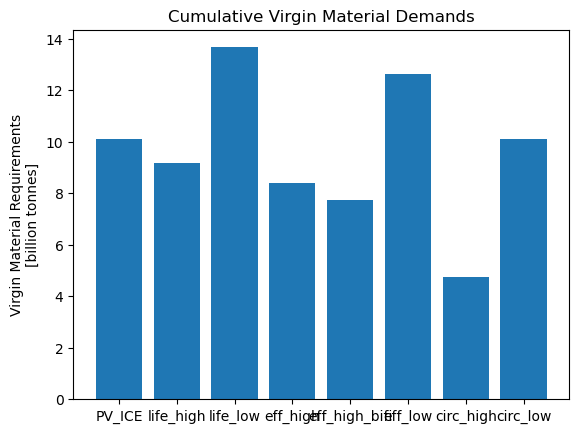

In [28]:
cumu_virgin_module = cc_cumu.filter(like='VirginStock_Module')
virgin = cumu_virgin_module.loc[2100]
virgin.index= scennames_labels

plt.bar(scennames_labels, virgin/1e9)
#plt.legend(scennames)
plt.title('Cumulative Virgin Material Demands')
plt.ylabel('Virgin Material Requirements\n[billion tonnes]')
#plt.xticks(rotation=90)

Text(0, 0.5, 'Lifecycle Wastes\n[billion tonnes]')

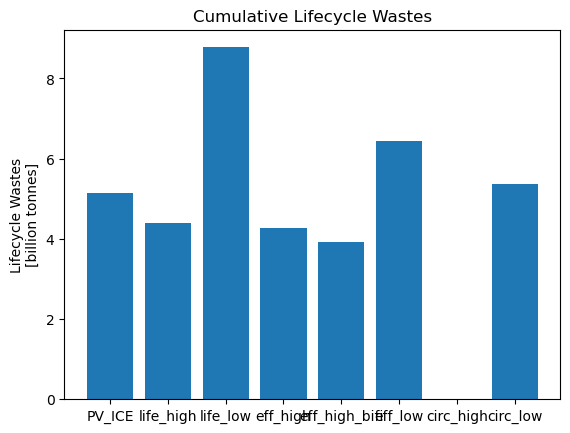

In [29]:
cumu_lifecycle_wastes = cc_cumu.filter(like='WasteAll_Module')
wastes = cumu_lifecycle_wastes.loc[2100]
wastes.index= scennames_labels

plt.bar(scennames_labels, wastes/1e9)
#plt.legend(scennames)
plt.title('Cumulative Lifecycle Wastes')
plt.ylabel('Lifecycle Wastes\n[billion tonnes]')

allenergy = pd.DataFrame()
energyGen = pd.DataFrame()
energyFuel = pd.DataFrame()
energy_mod=pd.DataFrame()
energy_mat = pd.DataFrame()
energy_demands = pd.DataFrame()

for scen in scenarios:
    # add the scen name as a prefix 
    scende = sim1.scenario[scen].dataOut_e.add_prefix(str(scen+'_'))
    #concat into one large df
    #energy_mod = pd.concat([energy_mod, scende], axis=1)
    
    #material level energy
    for mat in materials:
        # add the scen name as a prefix 
        scenmatde = sim1.scenario[scen].material[mat].matdataOut_e.add_prefix(str(scen+'_'+mat+'_'))
        #concat into one large df
        #energy_mat = pd.concat([energy_mat, scenmatde], axis=1)
    
    #compile module and material energies into one df
    allenergy_scen = pd.concat([scende,scenmatde], axis=1) #df of mod and mat energy for scenario
    
    #select df to sum the total demand
    energyGen_scen = allenergy_scen.filter(like='e_out_annual') #select all columns of energy generation
    energyFuel_scen = allenergy_scen.filter(like='_fuel') #select all columns of fuel attributable
    energy_demands_1 = allenergy_scen.loc[:,~allenergy_scen.columns.isin(energyGen_scen.columns)] #select all columns that are NOT energy generation, i.e. demands
    energy_demands_scen = energy_demands_1.loc[:,~energy_demands_1.columns.isin(energyFuel_scen.columns)] #select all columns that are NOT fuel (this avoids double counting)
    colname = str(scen+'_e_demand_total')
    energy_demands_scen.loc[:,colname] = energy_demands_scen.sum(axis=1)
    
    allenergy = pd.concat([allenergy,allenergy_scen], axis=1)
    energyGen = pd.concat([energyGen,energyGen_scen], axis=1)
    energyFuel = pd.concat([energyFuel,energyFuel_scen], axis=1)
    energy_demands = pd.concat([energy_demands,energy_demands_scen], axis=1)


#Fix the index to be years
allenergy.index = sim1.scenario[scen].dataIn_e['year']
energyGen.index = sim1.scenario[scen].dataIn_e['year']
energyFuel.index = sim1.scenario[scen].dataIn_e['year']
energy_demands.index = sim1.scenario[scen].dataIn_e['year']
        
energy_demands = pd.concat([energy_demands,energyFuel], axis=1) #append fuel energy columns back onto energy demands
        
return allenergy, energyGen, energy_demands #note, all these are annual

Text(0, 0.5, 'Cumulative Energy Demands\n[TWh]')

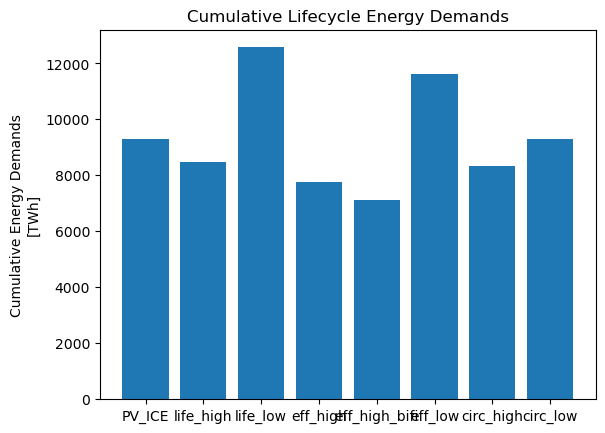

In [30]:
e_annual_sumDemands = energy_demands.filter(like='demand_total')
e_annual_sumDemands_cumu = e_annual_sumDemands.cumsum()
cumu_e_demands = e_annual_sumDemands_cumu.loc[2100]
cumu_e_demands.index= scennames_labels

plt.bar(scennames_labels, cumu_e_demands/1e12)
plt.title('Cumulative Lifecycle Energy Demands')
plt.ylabel('Cumulative Energy Demands\n[TWh]')

In [31]:
e_demands_eff_high = energy_demands.filter(like='eff_high')
e_demands_eff_high_cumu = e_demands_eff_high.cumsum()

e_demands_eff_high_cumu

#plt.bar(e_demands_eff_high_cumu.columns, e_demands_eff_high_cumu.iloc[-1,:])

eff_high_mod_MFG  eff_high_mod_Install  eff_high_mod_OandM  \
year                                                               
2000      5.595432e+10          5.724557e+07                 0.0   
2001      7.599869e+10          7.752961e+07                 0.0   
2002      1.003605e+11          1.019176e+08                 0.0   
2003      1.376869e+11          1.388866e+08                 0.0   
2004      2.141538e+11          2.138242e+08                 0.0   
...                ...                   ...                 ...   
2096      2.084757e+15          5.842628e+12                 0.0   
2097      2.106728e+15          5.904238e+12                 0.0   
2098      2.130099e+15          5.969776e+12                 0.0   
2099      2.154891e+15          6.039297e+12                 0.0   
2100      2.181460e+15          6.113803e+12                 0.0   

      eff_high_mod_Repair  eff_high_mod_Demount  eff_high_mod_Store  \
year                                                                  
2000                  0.0          0.000000e+00                 0.0   
2001                  0.0          3.657513e-01                 0.0   
2002                  0.0          2.862575e+01                 0.0   
2003                  0.0          3.744197e+02                 0.0   
2004                  0.0          2.361542e+03                 0.0   
...                   ...                   ...                 ...   
2096                  0.0          2.900146e+12                 0.0   
2097                  0.0          2.949143e+12                 0.0   
2098                  0.0          3.002774e+12                 0.0   
2099                  0.0          3.061103e+12                 0.0   
2100                  0.0          3.125324e+12                 0.0   

      eff_high_mod_Resell_Certify  eff_high_mod_ReMFG_Disassembly  \
year                                                                
2000                          0.0                             0.0   
2001                          0.0                             0.0   
2002                          0.0                             0.0   
2003                          0.0                             0.0   
2004                          0.0                             0.0   
...                           ...                             ...   
2096                          0.0                             0.0   
2097                          0.0                             0.0   
2098                          0.0                             0.0   
2099                          0.0                             0.0   
2100                          0.0                             0.0   

      eff_high_mod_Recycle_Crush  eff_high_backsheet_mat_extraction  ...  \
year                                                                 ...   
2000                0.000000e+00                       2.361798e+10  ...   
2001                1.547705e+00                       3.224195e+10  ...   
2002                1.211321e+02                       4.291771e+10  ...   
2003                1.584386e+03                       5.956614e+10  ...   
2004                9.993052e+03                       9.421588e+10  ...   
...                          ...                                ...  ...   
2096                1.227219e+13                       3.082694e+15  ...   
2097                1.247953e+13                       3.114726e+15  ...   
2098                1.270647e+13                       3.148800e+15  ...   
2099                1.295330e+13                       3.184944e+15  ...   
2100                1.322506e+13                       3.223680e+15  ...   

      eff_high_bifi_backsheet_mat_Recycled_HQ_elec  \
year                                                 
2000                                           0.0   
2001                                           0.0   
2002                                           0.0   
2003                                    

Text(0, 0.5, 'Cumulative Net Energy [TWh]')

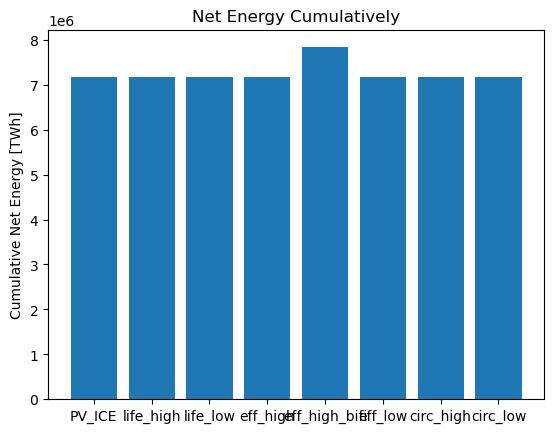

In [32]:
energyGen_cumu = energyGen.cumsum()
energyGen_cumu.columns = e_annual_sumDemands_cumu.columns = scennames_labels
netEnergy_cumu = energyGen_cumu.loc[[2100]] - e_annual_sumDemands_cumu.loc[[2100]]
#netEnergy_cumu.index= scennames_labels

plt.bar(scennames_labels, netEnergy_cumu.loc[2100]/1e12)
plt.title('Net Energy Cumulatively')
plt.ylabel('Cumulative Net Energy [TWh]')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

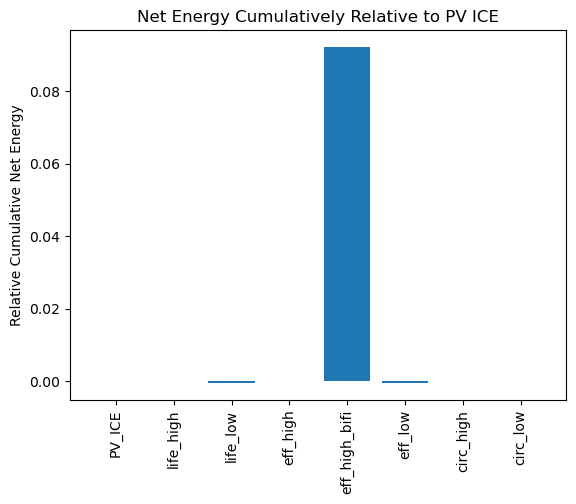

In [33]:
netEnergy_cumu_norm = netEnergy_cumu/netEnergy_cumu.loc[2100,'PV_ICE']
netEnergy_cumu_norm_waterfall = netEnergy_cumu_norm-1

plt.bar(scennames_labels, netEnergy_cumu_norm_waterfall.loc[2100])
plt.title('Net Energy Cumulatively Relative to PV ICE')
plt.ylabel('Relative Cumulative Net Energy')
#plt.ylim(-0.026,0.005)
plt.plot(0.0, lw=2)
plt.xticks(rotation=90)

Text(0, 0.5, 'Unitless')

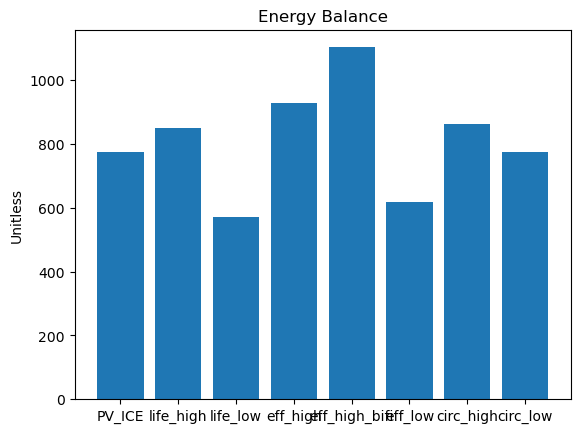

In [34]:
energyBalance_allyears = energyGen_cumu/e_annual_sumDemands_cumu
energyBalance = energyBalance_allyears.loc[2100]
energyBalance.index = scennames_labels

plt.bar(scennames_labels, energyBalance)
plt.title('Energy Balance')
plt.ylabel('Unitless')

In [35]:
discussTable = pd.concat([total_installed,cumu_area_deployed_total,virgin,wastes,
                          cumu_e_demands, netEnergy_cumu.loc[2100].T, energyBalance],
                         axis=1, keys=['replacements','area','virgin','wastes','energydemand','netenergy','energybalance'])
#discussTable.to_csv(os.path.join(testfolder,'discussiontable.csv'))
discussTable

replacements          area        virgin        wastes  \
PV_ICE         1.906612e+08  7.728509e+11  1.008632e+10  5.139612e+09   
life_high      1.732992e+08  7.033519e+11  9.180273e+09  4.394466e+09   
life_low       2.593475e+08  1.047702e+12  1.366772e+10  8.777769e+09   
eff_high       1.906612e+08  6.435582e+11  8.398524e+09  4.276345e+09   
eff_high_bifi  1.752295e+08  5.914535e+11  7.718548e+09  3.929078e+09   
eff_low        1.906612e+08  9.678296e+11  1.263162e+10  6.447753e+09   
circ_high      1.906612e+08  7.728509e+11  4.746508e+09  3.423740e+06   
circ_low       1.906612e+08  7.728509e+11  1.011723e+10  5.374146e+09   

               energydemand     netenergy  energybalance  
PV_ICE         9.290967e+15  7.178739e+18     773.657878  
life_high      8.461753e+15  7.179568e+18     849.472856  
life_low       1.257411e+16  7.175456e+18     571.653296  
eff_high       7.740063e+15  7.180290e+18     928.678411  
eff_high_bifi  7.113194e+15  7.840880e+18    1103.300845  
eff_low        1.163054e+16  7.176399e+18     618.030672  
circ_high      8.341473e+15  7.179688e+18     861.721883  
circ_low       9.275074e+15  7.178755e+18     774.983528

In [36]:
discussTable_norm = (discussTable/discussTable.loc['PV_ICE'])*100-100
discussTable_norm

replacements       area     virgin     wastes  energydemand  \
PV_ICE         0.000000e+00   0.000000   0.000000   0.000000      0.000000   
life_high     -9.106160e+00  -8.992551  -8.982934 -14.498109     -8.924944   
life_low       3.602537e+01  35.563336  35.507452  70.786595     35.336905   
eff_high      -4.263256e-14 -16.729327 -16.733513 -16.796343    -16.692596   
eff_high_bifi -8.093759e+00 -23.471200 -23.475082 -23.553026    -23.439680   
eff_low       -2.842171e-14  25.228496  25.235163  25.452119     25.181146   
circ_high      0.000000e+00   0.000000 -52.941136 -99.933385    -10.219539   
circ_low       0.000000e+00   0.000000   0.306455   4.563261     -0.171055   

               netenergy  energybalance  
PV_ICE          0.000000       0.000000  
life_high       0.011551       9.799548  
life_low       -0.045734     -26.110324  
eff_high        0.021604      20.037350  
eff_high_bifi   9.223640      42.608364  
eff_low        -0.032590     -20.115766  
circ_high       0.013226      11.382810  
circ_low        0.000221       0.171348

# Best Combos and Worst Combos
Now, what happens when we combine these?

In [37]:
#load in a baseline and materials for modification
sim2 = PV_ICE.Simulation(name='sim1', path=testfolder)

sim2.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis\Sensitivity
Baseline folder directed to default:  C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\baselines


In [38]:
mod_circ_vars = ['mod_EOL_collection_eff', 'mod_EOL_pg4_recycled', 'mod_EOL_pb4_recycled']
mat_circ_vars = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
                 'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG']

### Good Combos

In [39]:
#Life+Eff

sim2.createScenario(name='good_eff_life', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['good_eff_life'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim2.modifyScenario('good_eff_life', 'mod_degradation', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']-0.1, start_year=2022) #standard current degrdation
#T50
sim2.modifyScenario('good_eff_life', 'mod_reliability_t50',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']+10, start_year=2022)
#t90
sim2.modifyScenario('good_eff_life', 'mod_reliability_t90',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']+10, start_year=2022) 
#Mod Project Lifetime
sim2.modifyScenario('good_eff_life', 'mod_lifetime',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']+10, start_year=2022) #

sim2.modifyScenario('good_eff_life', 'mod_eff', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']+5, start_year=2022) #




In [40]:
#Eff+Circ
sim2.createScenario(name='good_eff_circ', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['good_eff_circ'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

for var in range(0,len(mod_circ_vars)):
    sim2.modifyScenario('good_eff_circ', mod_circ_vars[var], 100.0, start_year=2022) #

for mat in range (0, len(MATERIALS)):
    for mvar in range(0,len(mat_circ_vars)):
        sim2.scenario['good_eff_circ'].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar],100.0, start_year=2022) #

sim2.modifyScenario('good_eff_circ', 'mod_eff', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']+5, start_year=2022) #

In [41]:
#Life+Circ

sim2.createScenario(name='good_life_circ', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['good_life_circ'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim2.modifyScenario('good_life_circ', 'mod_degradation', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']-0.1, start_year=2022) #standard current degrdation
#T50
sim2.modifyScenario('good_life_circ', 'mod_reliability_t50',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']+10, start_year=2022)
#t90
sim2.modifyScenario('good_life_circ', 'mod_reliability_t90',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']+10, start_year=2022) 
#Mod Project Lifetime
sim2.modifyScenario('good_life_circ', 'mod_lifetime',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']+10, start_year=2022) #

for var in range(0,len(mod_circ_vars)):
    sim2.modifyScenario('good_life_circ', mod_circ_vars[var], 100.0, start_year=2022) #

for mat in range (0, len(MATERIALS)):
    for mvar in range(0,len(mat_circ_vars)):
        sim2.scenario['good_life_circ'].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar],100.0, start_year=2022) #

### Bad Combos

In [42]:
#life eff
sim2.createScenario(name='bad_life_eff', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['bad_life_eff'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim2.modifyScenario('bad_life_eff', 'mod_degradation', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']+0.1, start_year=2022) #standard current degrdation
#T50
sim2.modifyScenario('bad_life_eff', 'mod_reliability_t50',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']-10, start_year=2022)
#t90
sim2.modifyScenario('bad_life_eff', 'mod_reliability_t90',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']-10, start_year=2022) 
#Mod Project Lifetime
sim2.modifyScenario('bad_life_eff', 'mod_lifetime',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']-10, start_year=2022) #project lifetime of 25 years
#eff -5
sim2.modifyScenario('bad_life_eff', 'mod_eff', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']-5, start_year=2022) #

In [43]:
#eff circ
sim2.createScenario(name='bad_eff_circ', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['bad_eff_circ'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

sim2.modifyScenario('bad_life_eff', 'mod_eff', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']-5, start_year=2022) #    

for var in range(0,len(mod_circ_vars)):
    sim2.modifyScenario('bad_eff_circ', mod_circ_vars[var],0.0, start_year=2022) #

for mat in range (0, len(MATERIALS)):
    for mvar in range(0,len(mat_circ_vars)):
        sim2.scenario['bad_eff_circ'].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar],0.0, start_year=2022) #

In [44]:
#life circ
sim2.createScenario(name='bad_life_circ', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['bad_life_circ'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

#degradation rate:
sim2.modifyScenario('bad_life_circ', 'mod_degradation', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']+0.1, start_year=2022) #standard current degrdation
#T50
sim2.modifyScenario('bad_life_circ', 'mod_reliability_t50',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']-10, start_year=2022)
#t90
sim2.modifyScenario('bad_life_circ', 'mod_reliability_t90',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']-10, start_year=2022) 
#Mod Project Lifetime
sim2.modifyScenario('bad_life_circ', 'mod_lifetime',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']-10, start_year=2022)
    
#0 circ
for var in range(0,len(mod_circ_vars)):
    sim2.modifyScenario('bad_life_circ', mod_circ_vars[var],0.0, start_year=2022) #

for mat in range (0, len(MATERIALS)):
    for mvar in range(0,len(mat_circ_vars)):
        sim2.scenario['bad_life_circ'].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar],0.0, start_year=2022) #

In [45]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim2.trim_Years(startYear=2000, endYear=2100)

Trimming and extending  PV_ICE
PV_ICE glass : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE silicon : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE silver : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE copper : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE encapsulant : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE backsheet : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE backsheet : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  good_eff_life
good_eff_life glass : Data trimmed for Energy, years now encompass  2000  to  2100
good_eff_life silicon : Data trimmed for Energy, years now encompass  2000  to  2100
good_eff_life silver : Data trimmed for Energy, years now encompass  2000  to  2100
good_eff_life aluminium_frames : Data trimme

In [46]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
global_projection.iloc[-1,:]

#fig, ax1 = plt.subplots()

#ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
#ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
#ax1.set_ylim(0,90)
#ax1.set_xlim(2000,2100)
#ax2 = ax1.twinx()
#ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
#ax2.set_ylabel('Annual Installations [TW]')
#ax2.set_ylim(0,5)
#plt.show()

#fig.savefig('energyresults-deployment.png', dpi=300, bbox_inches='tight')

World_cum              85966000.0
World_annual_[MWdc]      219320.0
Name: 2100, dtype: float64

In [47]:
#deployment projection for all scenarios
sim2.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)

In [48]:
sim2.scenario.keys()

dict_keys(['PV_ICE', 'good_eff_life', 'good_eff_circ', 'good_life_circ', 'bad_life_eff', 'bad_eff_circ', 'bad_life_circ'])

In [49]:
bifiFactors = {'PV_ICE':0.0,
               'good_eff_life':0.9, 
               'good_eff_circ': 0.9,
               'good_life_circ': 0.0,
               'bad_life_eff': 0.0,
               'bad_eff_circ':0.0,
               'bad_life_circ': 0.0
              } 

#PV ICE currently set up to read in a csv of bifi factors, so generate files to read in 
idx_temp = pd.RangeIndex(start=2000,stop=2101,step=1) #create the index
df_temp = pd.DataFrame(index=idx_temp, columns=['bifi'], dtype=float)
bifiPathDict={}

for f in bifiFactors.keys(): #loop over module types
    bifi = df_temp.copy() #copy of df
    bifi['bifi'] = bifiFactors[f] #assign column
    bifipath = os.path.join(testfolder,'bifi_'+str(f)+'.csv') #create file path
    bifi.to_csv(path_or_buf=bifipath, index_label='year') #create file
    bifiPathDict[str(f)] = bifipath
    #append bifi path to dict? or list?

## Calculate Mass Flow: Identical Installs

In [50]:
#CALCULATE MASS FLOW= 

for scen in sim2.scenario.keys(): #loop over scenarios
    sim2.calculateMassFlow(scenarios=[scen], bifacialityfactors=bifiPathDict[scen])

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  S

In [51]:
#sim1.calculateMassFlow()

In [52]:
ii_yearly2, ii_cumu2 = sim2.aggregateResults() #have to do this to get auto plots
sim2.saveSimulation(customname='_EnergySensitivity-goodbad_identicalinstalls')

:) Saved Input and Output Dataframes


(0.0, 90.26425956655)

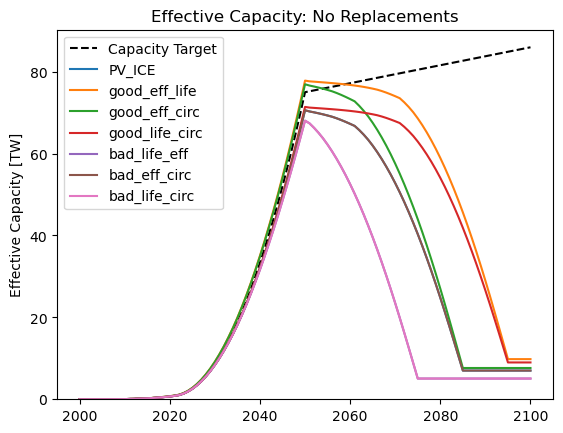

In [53]:
effective_capacity = ii_yearly2.filter(like='ActiveCapacity')

plt.plot(ii_cumu2['newInstalledCapacity_sim1_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')

plt.plot(effective_capacity/1e6, label=sim2.scenario.keys())

plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

## Calculate Flows: Capacity Compensation

In [54]:
UnderInstall_df = pd.DataFrame()


for row in range (0,len(sim2.scenario['PV_ICE'].dataIn_m)): #loop over length of years
    print(row)
    for scen in sim2.scenario.keys(): #loop over scenarios
        print(scen)
        Under_Installment = global_projection.iloc[row,0] - ((sim2.scenario[scen].dataOut_m['Effective_Capacity_[W]'][row])/1e6)  # MWATTS
        sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        UnderInstall_df.loc[row,scen] = Under_Installment #save the underinstallment as df
        #calculate flows for that scenario with it's bifi factor and modified weibull
        sim2.calculateMassFlow(scenarios=[scen], bifacialityfactors=bifiPathDict[scen])

sim2.calculateEnergyFlow()

0
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
1
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
2
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
3
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
4
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
5
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
6
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
7
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
8
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
9
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
10
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
11
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
12
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
13
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
14
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
15
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
16
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
17
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
18
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
19
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
20
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432998.5467168738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648429

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  good_life_circ
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Mate

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
21
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310622547.3601646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76377157.33952625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432924.04582159425  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261938330.89069155  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578975.0110904214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154079973.9523989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  64842

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786355639.833216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92106694.69215429  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521715.7825075759  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315879580.16664696  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904326.337037242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185809720.8861563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
22
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310461368.6879773  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76369711.78911571  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432823.033583846  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261914097.8014955  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578786.0158313033  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154064808.93646553  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6483388

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786519946.5601907  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92113253.73340242  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521785.7157147845  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315900927.92777175  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904492.3805277508  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185823080.269889  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
23
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2310055435.7812033  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76351500.79548863  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432611.3579035213  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261854395.08647445  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1578323.876685321  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154027007.80163905  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  648125

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2786740247.5704126  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92121678.2370715  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521866.98228497064  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315928546.72507894  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904705.6759131942  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185840567.27831712  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
24
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2309325171.397553  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76321135.15133962  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  432304.61247121094  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261753495.44216406  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1577548.257797645  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  153964222.06371093  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  647774

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2787053505.757638  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92133158.56219965  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  521967.5359917713  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  315966693.8072325  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1904998.3953473805  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185864304.6534009  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
25
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2308249209.920904  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76278126.78477244  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  431917.1624316549  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261609982.31942314  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1576506.6771148657  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  153878113.77522263  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  647287

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2787488635.2083306  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92148909.98139937  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  522094.9354707763  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  316019254.1701894  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1905385.4743610823  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185895841.02310774  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
26
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2306819088.4559684  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76222892.38293956  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  431466.497187137  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261424127.9888626  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1575268.9884763628  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  153770129.42329246  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6466870

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2788083481.6990414  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92170177.5081866  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  522255.06399624347  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  316090815.76627  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1905890.972575193  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185937419.4601156  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  782

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
27
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2304550170.0251346  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76143528.86516069  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  430946.69092929614  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261155089.6869647  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1573522.731681114  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  153615243.18510935  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  645896

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2789003804.219681  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92202230.58533688  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  522464.65676145756  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  316199474.0728629  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1906598.5493967645  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  185999974.40577507  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
28
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2302018777.6825304  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76057395.68132362  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  430409.6910749173  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  260860870.35688436  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1571666.4777217216  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  153447481.3686252  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  645067

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2790215448.0127516  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92243340.63880846  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  522720.73615284526  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  316339900.46665394  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1907486.4615629201  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  186080044.55921558  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
29
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2299284181.744531  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  75966836.05756417  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  429873.78307130333  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  260549108.45478413  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1569757.1075894358  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  153267759.95985648  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  64422

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2791798344.3118677  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92295663.05790432  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  523030.2396691884  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  316520026.4016196  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1908591.2527654031  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  186183881.77142698  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
30
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2296439302.5063796  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  75872917.31417052  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  429353.03150778165  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  260226205.69546613  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1567840.1095848782  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  153079645.42002922  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6434

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2793789102.86267  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92361306.40416044  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  523394.1569623857  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  316745715.2989692  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1909932.410663075  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  186315362.10674122  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  78

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
31
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2293193604.9149995  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  75766075.0820776  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  428756.8946531925  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  259859358.86951658  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1565644.0769250484  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  152863653.95982924  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  642511

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2795822945.3710384  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92428206.59207387  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  523767.42574438115  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  316975419.6126166  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1911308.3413073558  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  186450607.02808008  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
32
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2290192751.9792514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  75667320.95423116  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  428206.1245811283  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  259520282.85397285  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1563614.286964697  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  152664013.35090068  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  641687

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2798665890.792349  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92521721.00242312  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  524288.9936991602  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  317296504.86088544  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1913231.212041389  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  186639655.06316322  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
33
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2286598241.497539  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  75549051.93848225  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  427546.6903835542  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  259114201.73618117  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1561183.388469385  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  152424921.59001538  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6407014

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2801357055.2078567  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92610242.80505168  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  524782.5952234828  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  317600447.8025995  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1915051.153772431  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  186818610.0796837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
34
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2283584220.1460867  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  75449893.89328305  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  426993.9003849655  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  258773738.85520124  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1559145.2964015135  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  152224464.42477646  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  63987

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2805220702.1177397  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92737331.65447773  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  525491.1364078481  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  318036812.1513428  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1917663.753517137  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  187075531.9506044  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
35
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2280333763.9365864  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  75342964.86867169  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  426397.8428464775  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  258406594.0238724  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1556947.4798103545  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  152008297.50546807  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  638982

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2809376844.9332476  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92874041.7164459  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  526253.2407360905  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  318506211.2955385  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1920473.9657660003  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  187351903.993102  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  78

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
36
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2276406104.294979  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  75213763.53378631  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  425677.6692470403  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  257962976.37678033  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1554291.8786913606  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  151747105.04968527  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  637905

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2813199191.4485273  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92999772.05155805  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  526954.0931933789  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  318937911.134244  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1923058.3780832316  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  187606079.5016095  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
37
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2273386033.316064  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  75114419.96626028  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  425123.9397056478  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  257621876.4979073  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1552249.9734020608  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  151546272.83389297  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6370768

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2818543031.8700957  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  93175549.6385203  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  527933.8834163621  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  319541450.0961975  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1926671.4343072863  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  187961430.16150004  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
38
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2269435433.918233  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74984468.96538578  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  424399.6186861734  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  257175684.84442046  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1549578.9636664188  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  151283564.85893306  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  635993

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2823344682.049726  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  93333492.69359468  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  528814.2425501429  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  320083753.52153593  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1929917.8590469211  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  188280726.6646307  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
39
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2265661650.6905894  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74860335.08845155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  423707.72641528386  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  256749466.50496715  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1547027.51895585  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  151032616.73838106  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  634957

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2828730559.164665  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  93510653.01431051  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  529801.7029570527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  320692040.1518852  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1933559.2509011258  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  188638872.64877322  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
40
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2262763320.4407434  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74764998.52027842  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  423176.3453622839  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  256422124.8092152  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1545067.9734345423  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  150839885.04262003  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  634162

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2835645340.0603075  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  93738104.32354185  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  531069.4660786726  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  321473002.7844984  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1938234.310365763  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  189098686.52052504  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
41
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2259141371.9294825  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74645859.76922666  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  422512.2983209633  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  256013057.4225202  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1542619.198420806  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  150599035.03132787  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6331694

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2842217202.7811575  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  93954275.85558383  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  532274.3525931541  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  322215235.8775067  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1942677.5107389274  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  189535697.27876896  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
42
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2255817551.9981184  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74536527.63259126  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  421902.91114595067  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  255637661.41559207  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1540371.9883231043  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  150378009.9986599  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  63225

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2849482970.905578  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  94193272.36138953  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  533606.4563846486  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  323035839.377175  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1947589.8484929188  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  190018850.83387956  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
43
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2253426953.178723  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74457892.4582287  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  421464.6205089169  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  255367664.58420998  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1538755.7228470952  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  150219041.71616587  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6316019

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2858289232.340322  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  94482941.07584263  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  535220.9914877231  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  324030427.8127813  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1953543.6980979631  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  190604442.94837734  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
44
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2251494257.415186  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74394319.33263142  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  421110.281593625  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  255149383.8642717  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1537449.0423578885  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  150090522.75921175  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  63107181

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2868097283.908048  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  94805562.16879633  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  537019.1929019504  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  325138159.48045623  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1960174.8475065427  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  191256651.34568748  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
45
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2248682496.261063  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74301830.67792943  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  420594.77558536804  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  254831820.5866321  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1535548.0327813332  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  149903548.3841011  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6303005

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2877200960.404747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  95105013.90403461  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  538688.2540416237  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  326166338.28620857  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1966329.7727021414  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  191862020.7421005  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
46
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2247451246.9739027  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74261330.58540282  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  420369.039349692  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  254692761.99432257  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1534715.5948569998  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  149821673.69886002  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  629962

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2888368444.92679  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  95472351.49776225  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  540735.6917941092  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  327427605.7426362  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1973880.0215685638  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  192604627.68414325  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  8

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
47
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2245221270.651547  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74187978.8706327  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  419960.1973229653  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  254440906.12034604  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1533207.9254819383  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  149673386.4189052  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  62935111

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2898697304.742101  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  95812103.79408437  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  542629.3765893232  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  328594158.0419781  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1980863.2824095832  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  193291468.3945196  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  8

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
48
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2244451389.2207217  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74162654.77979137  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  419819.0478945183  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  254353954.90112108  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1532687.4147299763  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  149622191.42557806  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  62913

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2910793743.1161356  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  96209997.92648469  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  544847.1277162024  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  329960342.5242343  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1989041.5889742083  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  194095848.20743266  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
49
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2244034753.3234873  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74148950.16908216  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  419742.6622117912  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  254306899.60434315  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1532405.7304922163  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  149594486.28669646  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  62902

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2923508326.318764  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  96628225.0025719  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  547178.2089697131  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  331396340.93406975  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1997637.8182744626  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  194941332.94778  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  820

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
50
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2245776196.552809  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74206232.32284069  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  420061.9369811118  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  254503580.0356504  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1533583.1064980794  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  149710287.4618623  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  62950333

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2938793472.925172  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  97131006.89253905  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  549980.5751884604  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  333122661.4804143  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2007971.9851392629  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  195957753.06975603  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
51
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2263022952.854695  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  74773538.41106977  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  423036.41926025297  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  256451446.84573016  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1545243.5021437595  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  150857149.22220373  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  63423

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2954992828.3521285  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  97663860.30556427  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  552950.5516927829  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  334952233.7332161  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2018924.2413426742  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  197034965.55865017  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
52
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2276423906.095049  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  75214342.59640373  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  425493.33900494245  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  257964964.61007595  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1554303.780730423  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  151748275.67835736  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  637910

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2967580122.3679595  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  98077900.39545119  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  555258.2958255977  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  336373855.96831465  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2027434.4113606103  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  197871985.91889688  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
53
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2290884261.880348  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  75689994.23380983  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  428144.4887408541  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  259598132.41293815  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1564080.3130059435  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  152709849.4839333  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6418765

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2980274315.548484  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  98495456.77245295  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  557585.6387625597  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  337807551.507592  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2036016.855056842  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  198716114.77897123  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  83

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
54
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2306045744.4329047  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76188708.38086829  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  430924.1824815919  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  261310486.21087614  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1574330.8715482508  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  153718046.28715828  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  64603

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2993101150.3525186  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  98917376.19600405  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  559937.3001054373  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  339256227.73144233  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2044688.976705855  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  199569063.94143575  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
55
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2321997255.0846686  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  76713409.31307675  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  433631.8449979838  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  263112066.61389488  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1585115.561845347  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  154778777.7815864  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6501937

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  3006093835.857809  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  99344751.02872957  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  562319.3683794033  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  340723635.3080614  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2053473.22870318  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  200433041.71843314  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  84

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
56
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2338750920.959039  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  77253389.21469478  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  436230.6908042115  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  264992668.13840315  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1595724.937163165  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  155871453.18428275  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6541972

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  3007282497.7501407  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  99383850.2724691  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  562537.2966730627  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  340857884.03332585  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2054276.8736153662  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  200512084.45820552  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
57
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2355308197.585778  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  77753916.45763928  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  438348.96586793166  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  266756079.33485895  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1605367.2731321515  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  156883965.51777408  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  65763

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  3008141313.2835894  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  99412099.7167276  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  562694.7512065826  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  340954879.56363297  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2054857.5120108642  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  200569193.32420075  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
58
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2371331819.8100457  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  78234333.48154457  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  440286.6418721881  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  268454751.0211065  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1614404.1321165373  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  157850821.34056923  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  660784

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  3008756803.2544456  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  99432345.33286537  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  562807.594631594  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  341024393.6487851  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2055273.6399163376  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  200610121.7109125  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  8

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
59
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2386921889.9577737  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  78704095.18454136  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  442174.8405547922  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  270111827.3407959  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1622990.1423610877  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  158798121.32092625  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  663743

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  3009194899.208055  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  99446755.83982447  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  562887.9147833913  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  341073872.6669103  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2055569.8331285808  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  200639253.88439238  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_eff
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
60
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2402314118.873816  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  79169305.42461704  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  444099.43343635567  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  271750254.79654115  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1631550.3523804047  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  159755251.33216846  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  66662

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  3009504855.0076804  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  99456951.36929859  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  562944.7418247531  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  341108879.40116864  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2055779.3917953263  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  200659865.0907992  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
61
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2417617385.0469513  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  79636249.48692103  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  446139.88680328813  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  273384094.2649704  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1640285.3838703728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  160732493.01259944  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  66960

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  3009722901.628407  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  99464123.68467723  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  562984.718312852  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  341133505.8160218  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2055926.8113925161  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  200674364.5901198  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  84

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
62
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2429420689.357736  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  79961831.17469567  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  446896.10791534884  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  274550420.3966878  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1645328.068945148  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  161472174.55316883  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6704848

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  3009875377.575992  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  99469139.15146175  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  563012.6731276694  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  341150726.61003304  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2056029.8991757582  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  200684503.82039565  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
63
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2438635173.319859  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  80226107.65156557  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  447558.3663448809  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  275479626.34219944  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1649484.3150657672  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  162101832.6744191  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6710286

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  3009981266.6911325  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  99472622.21451691  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  563032.0867509447  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  341162685.8381522  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2056101.4899697318  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  200691545.1547118  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
64
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2446430141.17831  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  80475491.18812455  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  448486.8975769709  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  276322839.56748223  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1653866.0830492766  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  162659237.39858225  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6718103

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  3010054176.924698  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  99475020.48690344  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  562925.9425172213  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  341170920.3966739  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2056150.7840024827  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  200696393.48429623  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
65
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2454697941.38984  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  80743593.89873917  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  450042.301564565  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  277236169.2307452  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1659601.8802697065  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  163230647.71624556  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  67332997.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  3010103837.192547  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  99476653.98666425  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  562479.8323821257  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  341176529.07959557  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2055697.0839837  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  200699695.75523975  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  84

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
66
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2408206080.89898  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  79214314.12880328  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  441518.52210212016  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  271985329.57118285  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1628169.1007872017  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  160139067.12969106  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  660577

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  3009768496.757535  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  99431476.70427908  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  561688.0780510587  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  341056285.3225676  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2054126.8175723744  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  200609827.95975888  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
67
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2354535835.5127654  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  77448912.19284996  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  431678.6634572427  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  265923755.56581914  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1591883.0720031196  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  156570143.73192206  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  64585

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  3005051735.8207116  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  99217591.28149898  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  559602.1873499064  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  340381588.206119  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2048878.1546829916  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  200178284.01042873  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
68
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2294675506.635401  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  75479896.7779504  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  420703.9199964944  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  259163067.01549736  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1551411.9766869328  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  152589596.84246358  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6294354

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2997652599.043055  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  98912062.1478165  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  556913.4165698596  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  339398016.26703346  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2041486.1813643416  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  199554675.1921188  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  8

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
69
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2227858148.0810685  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  73282040.34375194  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  408453.6804369865  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  251616644.2107298  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1506237.2885830929  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  148146426.6537369  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6111072

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2987902146.4110546  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  98534001.83583117  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  553833.0536287767  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  338158707.51675594  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2032290.3481177315  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  198787108.67725825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
70
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2155015529.109643  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  70885992.0375317  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  395098.77458843647  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  243389722.15247494  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1456988.9695250252  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  143302593.25347692  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  591126

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2976571230.30846  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  98106514.43743753  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  550559.0626443477  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  336745702.98771334  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2022168.0304169434  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  197945145.49481422  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
71
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  2076706618.8600223  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  68310138.3077371  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  380741.6833930131  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  234545431.40363154  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1404044.934130365  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  138095266.54884717  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  5696459

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2964062971.916754  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  97646495.44408432  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  547245.2805070194  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  335206949.03420174  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  2011562.4905744053  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  197059602.72205198  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
72
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  1991668623.1437912  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  65512941.440335006  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  365150.8872028709  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  224941150.65938643  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1346551.4172273783  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  132440474.20670165  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  5463

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2924750930.709859  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  96270675.33053696  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  538280.1981965703  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  330546912.2774121  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1981106.9928734028  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  194385862.29298553  tonnes.
==> Working on Material :  backsheet


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  80813006.96343319  tonnes.
bad_life_eff
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_eff
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
73
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  1901660105.9048932  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  62552246.749219365  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  348648.79968505894  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  214775493.98257223  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1285697.3700017603  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  126455155.88253926  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  521

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2877634026.4105034  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  94669722.69052185  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  528258.491544167  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  325078674.5179513  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1946521.3812775335  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  191275024.89009783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
74
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  1805775799.5454123  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  59398276.819392204  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  331069.44982276595  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  203946219.49782702  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1220870.7481843107  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  120079113.77610421  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  495

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2822596879.0251417  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  92850131.71937026  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  517440.651078959  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  318813882.44221216  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1908143.911079485  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  187666545.17080456  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
75
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  1703492443.346734  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  56033819.77714198  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  312316.9034262268  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  192394229.58882427  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1151717.7793381682  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  113277552.49176607  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  467272

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2760419105.364614  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  90799831.40723367  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  506092.9683094523  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  311764639.2815822  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1866297.543314708  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  183560262.52331707  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
76
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  1596718604.2715776  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  52521655.05987645  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  292741.0755925747  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  180335079.81722504  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1079528.8305046454  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  106177386.47234951  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  43798

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2691520926.216144  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  88533529.51170313  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  493461.2328137079  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  303983206.40871286  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1819716.0288505624  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  178978723.50002402  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
77
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  1484896691.2123582  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  48843441.547414064  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  272239.73802676797  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  167705795.25643757  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  1003926.9187421895  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  98741537.44597545  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  4073

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2614984046.7565026  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  86015964.06743225  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  479429.02428580896  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  295339050.6824681  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1767970.0494697848  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  173889231.9590389  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
78
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  1367714184.680715  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  44988899.38159865  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  250755.5936628605  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  154471079.62649915  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  924700.7520943608  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  90949223.7280019  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  37516752.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2531705108.2035456  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  83276628.73763162  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  464160.7321891421  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  285933439.7057658  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1711665.817214186  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  168351412.0701184  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  6

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
79
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  1245754570.7447116  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  40977221.45835889  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  228395.61835664898  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  140696832.45809424  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  842244.8208808609  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  82839245.53381085  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  341713

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2440537904.3621464  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  80277820.79481582  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  447446.2120226573  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  275636919.7444717  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1650028.391132975  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  162289044.28034276  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
80
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  1120259701.4794576  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  36849256.632433355  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  205387.4922461503  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  126523309.83171625  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  757398.7314761116  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  74494182.60373208  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  307290

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2342318243.775957  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  77047032.90294468  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  429438.7002372881  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  264543887.89524892  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1583622.8547776549  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  155757707.55429488  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
81
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  989425258.7805077  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  32545654.57568882  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  181400.41313416223  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  111746730.1614864  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  668942.5986680655  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  65794052.756696075  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  2714019

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2237648606.9080787  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  73604082.7499808  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  410248.65510559495  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  252722388.9357505  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1512856.540428314  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  148797465.18227667  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_eff
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
82
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  855950104.9328306  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  28155190.300582755  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  156929.1882121738  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  96671905.79459803  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  578701.1019202127  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  56918322.89632636  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  23478932

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2126080078.2928293  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  69934203.93740115  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  389793.7728353347  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  240121721.88076875  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1437425.9398860917  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  141378465.52307433  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
83
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  718175162.0807734  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  23623290.938346  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  131669.6435107351  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  81111458.73174568  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  485552.5518049736  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  47756668.917801864  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  19699729.9

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  2009114596.4194534  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  66086800.471047595  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  368349.4175937697  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  226911517.24416783  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1358346.5018947122  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  133600583.34673457  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
84
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  577983541.1995564  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  19011898.589994617  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  105967.02704716833  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  65278069.50856834  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  390770.1047716768  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  38434312.51093787  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  1585423

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  1885946255.2965014  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  62035363.28640477  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  345767.8352392914  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  213000755.15500456  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1275073.3597819125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  125410228.1259811  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
85
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  434833978.1378186  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  14303209.185996257  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  79722.10389715745  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  49110607.1820953  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  293987.8164048502  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  28915261.101445466  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  11927608

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  1755935509.9331865  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  57758855.513662554  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  321931.7721193205  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  198317204.72885653  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1187174.1222333375  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  116764871.88157484  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
86
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  411905954.06667244  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  13549026.346109673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  75518.49882244754  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  46521092.01025471  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  278486.360515822  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  27390610.692577723  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  1129868

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  good_life_circ
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  1620502876.322536  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  53304002.88820936  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  297101.66446763213  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  183021300.5371624  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  1095609.1888864452  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  107758975.01197194  tonnes.
==> Working on Ma

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
87
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  381293490.6575537  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  12542075.441043772  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  69906.03496003014  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  43063688.17120834  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  257789.51591558743  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  25354966.246796694  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  104589

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  1478964461.633873  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  48648309.78479554  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  271152.12793515745  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  167035803.00378346  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  999916.1852027816  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  98347060.52880745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
88
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  357878956.51165086  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  11771889.584557287  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  65613.23352837298  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  40419226.039441034  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  241959.13440959336  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  23797964.258826684  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  9816

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  1330837163.9633808  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  43775885.29347424  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  243994.59101620645  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  150306150.09120637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  899768.4898028214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  88497003.48695345  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
89
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  342302447.8365195  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  11259523.777906189  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  62757.44923968472  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  38659998.75437727  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  231427.97998549795  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  22762169.36230275  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  9389444

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  1176720419.138963  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  38706446.95351592  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  215738.95378242573  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  132900042.71277997  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  795571.3765128526  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  78248664.71686202  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
90
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  325825396.87633795  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  10717535.988311004  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  59736.560269158996  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  36799063.27576023  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  220287.97603888842  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  21666490.88580506  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  89374

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  1018128470.9663917  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  33489803.535627328  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  186662.83644768703  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  114988501.1577687  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  688348.6136038598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  67702737.25821392  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
91
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  308384907.02614963  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  10143857.326625498  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  56539.0352049761  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  34829315.99482339  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  208496.59867218515  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  20506746.378453173  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  845907

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  853395418.5800735  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  28071157.73839757  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  156460.81411751042  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  96383376.828943  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  576973.898665162  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  56748443.29483194  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  2340

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
92
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  288361676.5225928  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  9485223.298764361  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  52867.992593730705  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  32567871.265991613  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  194959.05075948287  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  19175256.73593663  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  790983

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  685194741.0662652  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  22538449.632169984  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  125623.04024861076  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  77386615.26831628  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  463254.7497801865  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  45563561.81758384  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
93
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  266735507.23962167  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  8773863.01254481  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  48903.068505098185  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  30125388.944214836  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  180337.768605016  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  17737176.08244414  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  7316623.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  512305955.2995079  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  16851533.26163956  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  93925.75246862417  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  57860373.827060856  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  346366.0079525055  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  34066934.0623967  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  14

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
94
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  243558344.4305827  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  8011485.1288861735  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  44653.786539101704  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  27507735.7810818  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  164667.871984082  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  16195958.634157097  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  6680868.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  336566819.073116  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  11070858.90317052  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  61705.883779805554  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  38012210.804713905  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  227550.16670355762  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  22380765.8574869  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  9

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
95
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  219004664.9764648  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  7203828.802160858  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  40152.13514359307  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  24734617.379179727  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  148067.32333713866  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  14563206.622786008  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  600735

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  157830889.15534934  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  5191609.527085411  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  28936.58540049854  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  17825586.748541705  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  106708.21692161063  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  10495319.131555473  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
96
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  193050141.13049716  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  6350093.807757678  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  35393.65408948907  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  21803286.137181778  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  130519.67486684081  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  12837302.320220254  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  52954

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  123357275.47201042  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  4057651.8956655893  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  22616.221422634448  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  13932100.533411648  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  83400.87913317085  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  8202918.834244365  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
97
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  151244159.70917702  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  4974948.976491767  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  27728.979841478063  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  17081674.59192737  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  102254.98119375286  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  10057319.777051747  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  41486

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  91576368.02143408  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  3012266.7826321577  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  16789.535990711356  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  10342731.394459272  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  61914.05874997095  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  6089576.080051798  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  = 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
98
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  105913692.71114677  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  3483871.497338959  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  19418.12930675227  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  11962003.93588767  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  71607.41067400099  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  7042968.656856934  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  2905239.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  59658786.41422536  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  1962385.9789422497  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  10937.792831326933  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  6737926.132398339  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  40334.834049520105  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  3967144.8711304385  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
99
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_eff_circ  =  55887927.53434699  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_eff_circ  =  1838349.2520959473  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_eff_circ  =  10246.446665853393  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_eff_circ  =  6312041.361429226  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_eff_circ  =  37785.38615951407  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_eff_circ  =  3716393.1484722155  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_eff_circ  =  153302

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  good_life_circ  =  27580355.837351233  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  good_life_circ  =  907214.2905097817  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  good_life_circ  =  5056.559754143696  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  good_life_circ  =  3114954.4183993307  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  good_life_circ  =  18646.86063176479  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  good_life_circ  =  1834017.64904173  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  good_life_circ  =  7

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
100
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_life
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_life
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  good_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
good_life_circ


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  good_life_circ
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_eff
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_eff
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_eff_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_eff_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
bad_life_circ
>>>> Calculating Material Flows <<<<

Working on Scenario:  bad_life_circ
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_1508\1670677626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet


>>>> Calculating Energy Flows <<<<

Working on Scenario:  PV_ICE
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Working on Energy for Material :  copper
==> Working on Energy for Material :  encapsulant
==> Working on Energy for Material :  backsheet
Working on Scenario:  good_eff_life
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Working on Energy for Materi

In [55]:
sim2.saveSimulation(customname='_EnergySensitivity_withreplacements')

#aggregate results - mass
cc_yearly2, cc_cumu2 = sim2.aggregateResults() #have to do this to get auto plots
cc_yearly2.to_csv(os.path.join(testfolder, 'cc_10scen_yearly.csv'))
cc_cumu2.to_csv(os.path.join(testfolder, 'cc_10scen_cumu.csv'))

#aggregate results - energy
allenergy2, energyGen2, energy_demands2 = sim2.aggregateEnergyResults()
allenergy2.to_csv(os.path.join(testfolder, 'cc_10scen_allenergy.csv'))
energyGen2.to_csv(os.path.join(testfolder, 'cc_10scen_energyGen.csv'))
energy_demands2.to_csv(os.path.join(testfolder, 'cc_10scen_energy_demands.csv'))

#UnderInstall_df.to_csv(os.path.join(testfolder, 'cc_10scen_underInstalls.csv'))

:) Saved Input and Output Dataframes


C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_demands_scen.loc[:,colname] = energy_demands_scen.sum(axis=1)
C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_demands_scen.loc[:,colname] = energy_demands_scen.sum(axis=1)
C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [56]:
scennames_labels2=sim2.scenario.keys()

Text(0.5, 1.0, 'Cumulative Installs with Replacements')

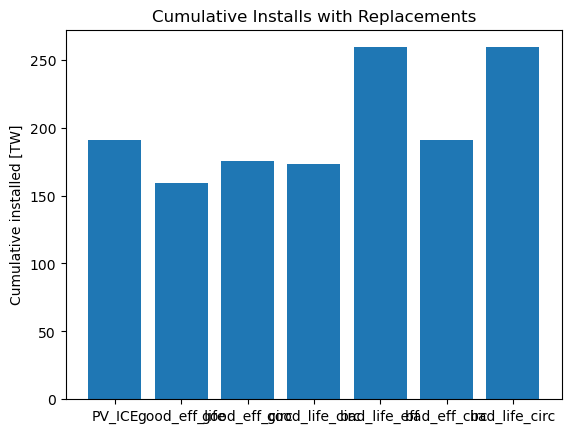

In [57]:
cumu_installs2 = cc_cumu2.filter(like='newInstalled')
total_installed2 = cumu_installs2.loc[2100]
total_installed2.index= scennames_labels2

plt.bar(scennames_labels2, total_installed2/1e6)
#plt.xticks(rotation=90)
plt.ylabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
#plt.ylim(0,410)

Text(0.5, 1.0, 'Cumulative Area Deployed with Replacements')

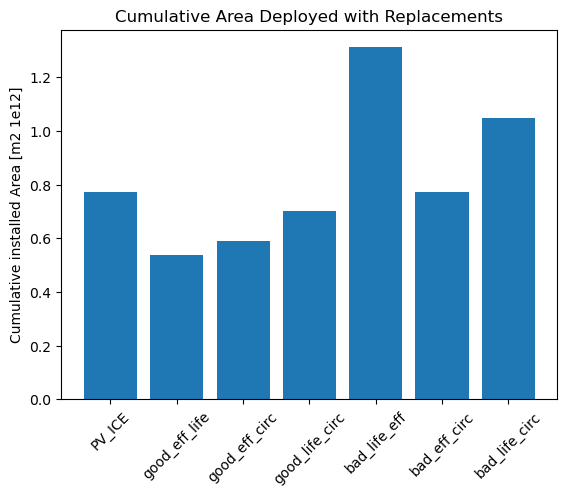

In [58]:
cumu_area_deployed2 = pd.DataFrame()

for scen in sim2.scenario.keys():
    area_deploy = sim2.scenario[scen].dataOut_m['Area'].cumsum()
    cumu_area_deployed2 = pd.concat([cumu_area_deployed2,area_deploy], axis=1)
    
cumu_area_deployed2.columns = sim2.scenario.keys()
cumu_area_deployed2_total = cumu_area_deployed2.iloc[-1,:]
#cumu_area_deployed

plt.bar(scennames_labels2, cumu_area_deployed2.iloc[-1,:]/1e12)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed Area [m2 1e12]')
plt.title('Cumulative Area Deployed with Replacements')
#plt.ylim(0,410)

Text(0, 0.5, 'Virgin Material Requirements\n[billion tonnes]')

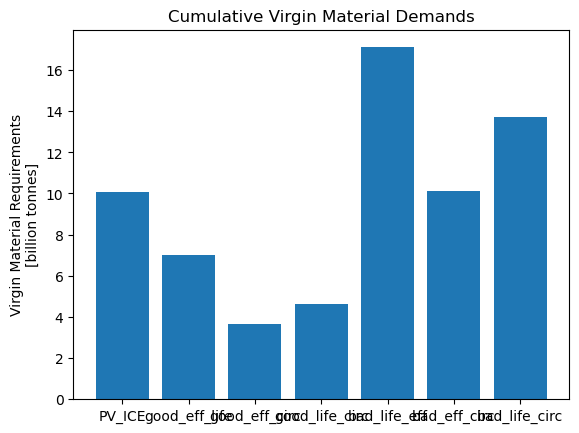

In [59]:
cumu_virgin_module2 = cc_cumu2.filter(like='VirginStock_Module')
virgin2 = cumu_virgin_module2.loc[2100]
virgin2.index= scennames_labels2

plt.bar(scennames_labels2, virgin2/1e9)
#plt.legend(scennames)
plt.title('Cumulative Virgin Material Demands')
plt.ylabel('Virgin Material Requirements\n[billion tonnes]')
#plt.xticks(rotation=90)

Text(0, 0.5, 'Lifecycle Wastes\n[billion tonnes]')

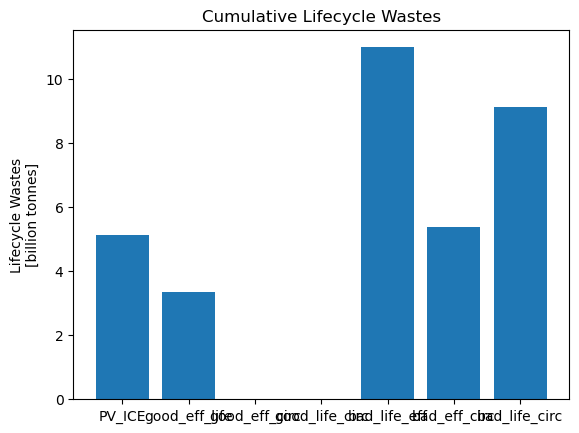

In [60]:
cumu_lifecycle_wastes2 = cc_cumu2.filter(like='WasteAll_Module')
wastes2 = cumu_lifecycle_wastes2.loc[2100]
wastes2.index= scennames_labels2

plt.bar(scennames_labels2, wastes2/1e9)
#plt.legend(scennames)
plt.title('Cumulative Lifecycle Wastes')
plt.ylabel('Lifecycle Wastes\n[billion tonnes]')

Text(0, 0.5, 'Cumulative Energy Demands\n[TWh]')

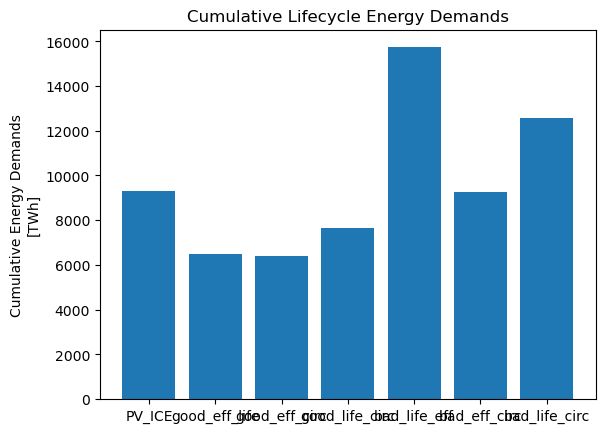

In [61]:
e_annual_sumDemands2 = energy_demands2.filter(like='demand_total')
e_annual_sumDemands_cumu2 = e_annual_sumDemands2.cumsum()
cumu_e_demands2 = e_annual_sumDemands_cumu2.loc[2100]
cumu_e_demands2.index= scennames_labels2

plt.bar(scennames_labels2, cumu_e_demands2/1e12)
plt.title('Cumulative Lifecycle Energy Demands')
plt.ylabel('Cumulative Energy Demands\n[TWh]')

Text(0, 0.5, 'Cumulative Net Energy [TWh]')

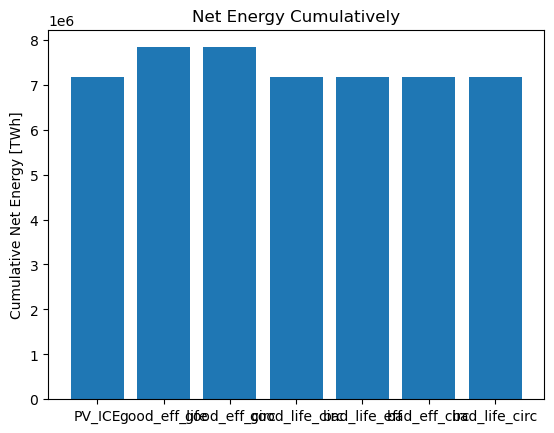

In [62]:
energyGen_cumu2 = energyGen2.cumsum()
energyGen_cumu2.columns = e_annual_sumDemands_cumu2.columns = scennames_labels2
netEnergy_cumu2 = energyGen_cumu2.loc[[2100]] - e_annual_sumDemands_cumu2.loc[[2100]]
#netEnergy_cumu.index= scennames_labels

plt.bar(scennames_labels2, netEnergy_cumu2.loc[2100]/1e12)
plt.title('Net Energy Cumulatively')
plt.ylabel('Cumulative Net Energy [TWh]')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

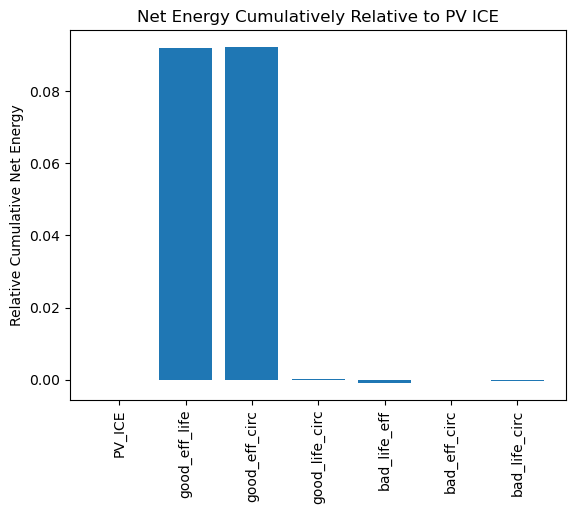

In [63]:
netEnergy_cumu_norm2 = netEnergy_cumu2/netEnergy_cumu2.loc[2100,'PV_ICE']
netEnergy_cumu_norm_waterfall2 = netEnergy_cumu_norm2-1

plt.bar(scennames_labels2, netEnergy_cumu_norm_waterfall2.loc[2100])
plt.title('Net Energy Cumulatively Relative to PV ICE')
plt.ylabel('Relative Cumulative Net Energy')
#plt.ylim(-0.026,0.005)
plt.plot(0.0, lw=2)
plt.xticks(rotation=90)

Text(0, 0.5, 'Unitless')

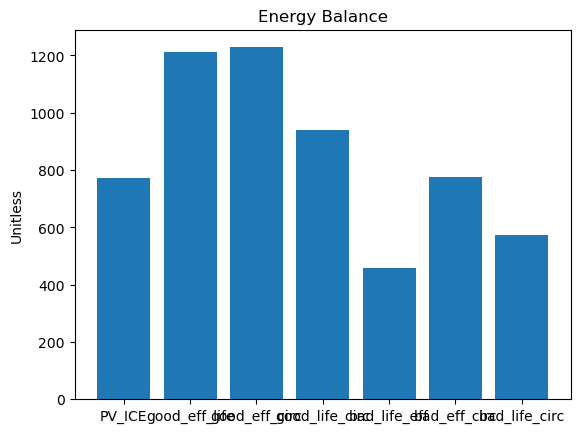

In [64]:
energyBalance_allyears2 = energyGen_cumu2/e_annual_sumDemands_cumu2
energyBalance2 = energyBalance_allyears2.loc[2100]
energyBalance2.index = scennames_labels2

plt.bar(scennames_labels2, energyBalance2)
plt.title('Energy Balance')
plt.ylabel('Unitless')

In [65]:
discussTable2 = pd.concat([total_installed2,cumu_area_deployed2_total,virgin2,wastes2,
                           cumu_e_demands2, netEnergy_cumu2.loc[2100].T, energyBalance2],
                         axis=1, keys=['replacements','area','virgin','wastes','energydemand','netenergy','energybalance'])
#discussTable.to_csv(os.path.join(testfolder,'discussiontable.csv'))
discussTable2

replacements          area        virgin        wastes  \
PV_ICE          1.906612e+08  7.728509e+11  1.008632e+10  5.139612e+09   
good_eff_life   1.590911e+08  5.376261e+11  7.016802e+09  3.354618e+09   
good_eff_circ   1.752295e+08  5.914535e+11  3.636995e+09  3.138244e+06   
good_life_circ  1.732992e+08  7.033519e+11  4.608957e+09  3.423740e+06   
bad_life_eff    2.593475e+08  1.311428e+12  1.710881e+10  1.099588e+10   
bad_eff_circ    1.906612e+08  7.728509e+11  1.011723e+10  5.374146e+09   
bad_life_circ   2.593475e+08  1.047702e+12  1.371424e+10  9.132573e+09   

                energydemand     netenergy  energybalance  
PV_ICE          9.290967e+15  7.178739e+18     773.657878  
good_eff_life   6.470979e+15  7.839164e+18    1212.434123  
good_eff_circ   6.386451e+15  7.841606e+18    1228.850313  
good_life_circ  7.641676e+15  7.180388e+18     940.635216  
bad_life_eff    1.573488e+16  7.172295e+18     456.821410  
bad_eff_circ    9.275074e+15  7.178755e+18     774.983528  
bad_life_circ   1.254665e+16  7.175483e+18     572.904358

In [66]:
discussTable_all = pd.concat([discussTable,discussTable2], axis=0)
discussTable_all

replacements          area        virgin        wastes  \
PV_ICE          1.906612e+08  7.728509e+11  1.008632e+10  5.139612e+09   
life_high       1.732992e+08  7.033519e+11  9.180273e+09  4.394466e+09   
life_low        2.593475e+08  1.047702e+12  1.366772e+10  8.777769e+09   
eff_high        1.906612e+08  6.435582e+11  8.398524e+09  4.276345e+09   
eff_high_bifi   1.752295e+08  5.914535e+11  7.718548e+09  3.929078e+09   
eff_low         1.906612e+08  9.678296e+11  1.263162e+10  6.447753e+09   
circ_high       1.906612e+08  7.728509e+11  4.746508e+09  3.423740e+06   
circ_low        1.906612e+08  7.728509e+11  1.011723e+10  5.374146e+09   
PV_ICE          1.906612e+08  7.728509e+11  1.008632e+10  5.139612e+09   
good_eff_life   1.590911e+08  5.376261e+11  7.016802e+09  3.354618e+09   
good_eff_circ   1.752295e+08  5.914535e+11  3.636995e+09  3.138244e+06   
good_life_circ  1.732992e+08  7.033519e+11  4.608957e+09  3.423740e+06   
bad_life_eff    2.593475e+08  1.311428e+12  1.710881e+10  1.099588e+10   
bad_eff_circ    1.906612e+08  7.728509e+11  1.011723e+10  5.374146e+09   
bad_life_circ   2.593475e+08  1.047702e+12  1.371424e+10  9.132573e+09   

                energydemand     netenergy  energybalance  
PV_ICE          9.290967e+15  7.178739e+18     773.657878  
life_high       8.461753e+15  7.179568e+18     849.472856  
life_low        1.257411e+16  7.175456e+18     571.653296  
eff_high        7.740063e+15  7.180290e+18     928.678411  
eff_high_bifi   7.113194e+15  7.840880e+18    1103.300845  
eff_low         1.163054e+16  7.176399e+18     618.030672  
circ_high       8.341473e+15  7.179688e+18     861.721883  
circ_low        9.275074e+15  7.178755e+18     774.983528  
PV_ICE          9.290967e+15  7.178739e+18     773.657878  
good_eff_life   6.470979e+15  7.839164e+18    1212.434123  
good_eff_circ   6.386451e+15  7.841606e+18    1228.850313  
good_life_circ  7.641676e+15  7.180388e+18     940.635216  
bad_life_eff    1.573488e+16  7.172295e+18     456.821410  
bad_eff_circ    9.275074e+15  7.178755e+18     774.983528  
bad_life_circ   1.254665e+16  7.175483e+18     572.904358

In [67]:
discussTable_norm = (discussTable_all/discussTable.loc['PV_ICE'])*100-100
discussTable_norm

replacements       area     virgin      wastes  energydemand  \
PV_ICE          0.000000e+00   0.000000   0.000000    0.000000      0.000000   
life_high      -9.106160e+00  -8.992551  -8.982934  -14.498109     -8.924944   
life_low        3.602537e+01  35.563336  35.507452   70.786595     35.336905   
eff_high       -4.263256e-14 -16.729327 -16.733513  -16.796343    -16.692596   
eff_high_bifi  -8.093759e+00 -23.471200 -23.475082  -23.553026    -23.439680   
eff_low        -2.842171e-14  25.228496  25.235163   25.452119     25.181146   
circ_high       0.000000e+00   0.000000 -52.941136  -99.933385    -10.219539   
circ_low        0.000000e+00   0.000000   0.306455    4.563261     -0.171055   
PV_ICE          0.000000e+00   0.000000   0.000000    0.000000      0.000000   
good_eff_life  -1.655818e+01 -30.435992 -30.432492  -34.730139    -30.351935   
good_eff_circ  -8.093759e+00 -23.471200 -63.941304  -99.938940    -31.261713   
good_life_circ -9.106160e+00  -8.992551 -54.304874  -99.933385    -17.751551   
bad_life_eff    3.602537e+01  69.687123  69.623932  113.943791     69.356747   
bad_eff_circ    0.000000e+00   0.000000   0.306455    4.563261     -0.171055   
bad_life_circ   3.602537e+01  35.563336  35.968760   77.689928     35.041367   

                netenergy  energybalance  
PV_ICE           0.000000       0.000000  
life_high        0.011551       9.799548  
life_low        -0.045734     -26.110324  
eff_high         0.021604      20.037350  
eff_high_bifi    9.223640      42.608364  
eff_low         -0.032590     -20.115766  
circ_high        0.013226      11.382810  
circ_low         0.000221       0.171348  
PV_ICE           0.000000       0.000000  
good_eff_life    9.199744      56.714506  
good_eff_circ    9.233763      58.836399  
good_life_circ   0.022975      21.582840  
bad_life_eff    -0.089764     -40.953046  
bad_eff_circ     0.000221       0.171348  
bad_life_circ   -0.045352     -25.948617

# Sensitivity of Energy to Circularity
Above it appears that both increasing and decreasing circularity reduce energy demands, which would imply there might be a bell curve or threshold situation. OR more likely, open vs closed loop matters a lot.

In [37]:
#load in a baseline and materials for modification
sim3 = PV_ICE.Simulation(name='sim3', path=testfolder)

sim3.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim3.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis\Sensitivity
Baseline folder directed to default:  C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\baselines


In [38]:
mod_circ_vars = ['mod_EOL_collection_eff', 'mod_EOL_pg4_recycled', 'mod_EOL_pb4_recycled']
mat_circ_vars = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
                 'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG']


In [39]:
#range of circularity / closed loop vs downcycling
rrates = pd.Series(range(0,101,10))
for r in range(0,len(rrates)): print(rrates[r])

0
10
20
30
40
50
60
70
80
90
100


In [40]:
#closed loop at various rates
for r in range(0,len(rrates)):
    scenname = 'circ_CL_'+str(rrates[r])
    sim3.createScenario(name=scenname, massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
    for mat in range (0, len(MATERIALS)):
        matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
        matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
        sim3.scenario[scenname].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
    for var in range(0,len(mod_circ_vars)):
        sim3.modifyScenario(scenname, mod_circ_vars[var], 100.0, start_year=2022) #

    for mat in range (0, len(MATERIALS)):
        for mvar in range(0,len(mat_circ_vars)):
            sim3.scenario[scenname].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar], 100.0, start_year=2022) #
            sim3.scenario[scenname].modifyMaterials(MATERIALS[mat], 'mat_Recycling_yield', rrates[r], start_year=2022) #



In [41]:
#open loop at various rates
for r in range(0,len(rrates)):
    scenname = 'circ_OL_'+str(rrates[r])
    sim3.createScenario(name=scenname, massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
    for mat in range (0, len(MATERIALS)):
        matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
        matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
        sim3.scenario[scenname].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
    for var in range(0,len(mod_circ_vars)):
        sim3.modifyScenario(scenname, mod_circ_vars[var], 100.0, start_year=2022) #

    for mat in range (0, len(MATERIALS)):
        for mvar in range(0,len(mat_circ_vars)):
            sim3.scenario[scenname].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar], 100.0, start_year=2022) #
            sim3.scenario[scenname].modifyMaterials(MATERIALS[mat], 'mat_Recycling_yield', rrates[r], start_year=2022) #
            sim3.scenario[scenname].modifyMaterials(MATERIALS[mat], 'mat_MFG_scrap_Recycled_into_HQ', 0.0, start_year=2022) #
            sim3.scenario[scenname].modifyMaterials(MATERIALS[mat], 'mat_EOL_RecycledHQ_Reused4MFG', 0.0, start_year=2022) #

In [42]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim3.trim_Years(startYear=2000, endYear=2100)

Trimming and extending  PV_ICE
PV_ICE glass : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE silicon : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE silver : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE copper : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE encapsulant : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE backsheet : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE backsheet : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  circ_CL_0
circ_CL_0 glass : Data trimmed for Energy, years now encompass  2000  to  2100
circ_CL_0 silicon : Data trimmed for Energy, years now encompass  2000  to  2100
circ_CL_0 silver : Data trimmed for Energy, years now encompass  2000  to  2100
circ_CL_0 aluminium_frames : Data trimmed for Energy, years 

circ_OL_0 silicon : Data trimmed for Energy, years now encompass  2000  to  2100
circ_OL_0 silver : Data trimmed for Energy, years now encompass  2000  to  2100
circ_OL_0 aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
circ_OL_0 copper : Data trimmed for Energy, years now encompass  2000  to  2100
circ_OL_0 encapsulant : Data trimmed for Energy, years now encompass  2000  to  2100
circ_OL_0 backsheet : Data trimmed for Energy, years now encompass  2000  to  2100
circ_OL_0 backsheet : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  circ_OL_10
circ_OL_10 glass : Data trimmed for Energy, years now encompass  2000  to  2100
circ_OL_10 silicon : Data trimmed for Energy, years now encompass  2000  to  2100
circ_OL_10 silver : Data trimmed for Energy, years now encompass  2000  to  2100
circ_OL_10 aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
circ_OL_10 copper : Data trimmed for Energy, years 

In [43]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
global_projection.iloc[-1,:]

#fig, ax1 = plt.subplots()

#ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
#ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
#ax1.set_ylim(0,90)
#ax1.set_xlim(2000,2100)
#ax2 = ax1.twinx()
#ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
#ax2.set_ylabel('Annual Installations [TW]')
#ax2.set_ylim(0,5)
#plt.show()

#fig.savefig('energyresults-deployment.png', dpi=300, bbox_inches='tight')

World_cum              85966000.0
World_annual_[MWdc]      219320.0
Name: 2100, dtype: float64

In [44]:
#deployment projection for all scenarios
sim3.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)

In [45]:
sim3.calculateMassFlow()

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
Working on Scenario:  circ_CL_10
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on 

Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.
Working on Scenario:  circ_CL_80
********************
Finished Area+Power Gen

==> Working on Material :  backsheet
Working on Scenario:  circ_OL_60
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
Working on Scenario:  circ_OL_70
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
Working on Scenario:  circ_OL_80
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working

In [47]:
UnderInstall_df = pd.DataFrame()


for row in range (0,len(sim3.scenario['PV_ICE'].dataIn_m)): #loop over length of years
    print(row)
    for scen in sim3.scenario.keys(): #loop over scenarios
        print(scen)
        Under_Installment = global_projection.iloc[row,0] - ((sim3.scenario[scen].dataOut_m['Effective_Capacity_[W]'][row])/1e6)  # MWATTS
        sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        UnderInstall_df.loc[row,scen] = Under_Installment #save the underinstallment as df
        #calculate flows for that scenario with it's bifi factor and modified weibull
        sim3.calculateMassFlow(scenarios=[scen])

sim3.calculateEnergyFlow()

0
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
1
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
2
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_40
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled s

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_90
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
3
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
4
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
5
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled su

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
6
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
7
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
8
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
9
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_80
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycle

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
10
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
11
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
12
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
13
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
14
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_80
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycle

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
15
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
16
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
17
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
18
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
19
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
20
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
21
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224490.6353431577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33684889.47250623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50112393.00871647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283718.6634325452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036146.3690535728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101071559.92187953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42565832.923453495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833548222.219753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60606938.05154895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  342990.8845836029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207858748.47799954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252873.9033478543  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122248040.58373825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51446776.37440069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151312686.060818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71101483.09438153  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402474.12784421135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243858241.82510284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469601.4376421338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143424521.24559745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60358010.905078046  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469077149.901893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81602984.70466155  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462146.68142352765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279857735.1722062  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687047.5853848227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164613862.1742094  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69293758.78940448  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522281.0480266041  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78240039.20964287  to

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
22
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165440.00686850527  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39664519.98678356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224512.24064445577  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819930.530903125  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79987275.22633837  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33687671.65662209  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516714180.4105852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50115613.52923711  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283744.58979410294  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171880846.6307254  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036216.0523398492  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101078119.44297825  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42569171.54439253  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833642343.5036714  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60610695.3254897  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  343027.8464509927  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207870977.30589268  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1252955.2005151769  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122255693.35835339  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51450671.43216289  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151420253.2424393  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71105777.1217424  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402523.68397610966  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243872217.62840933  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469694.3486905023  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143433267.27372903  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60363450.56051526  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469198162.9812164  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81608887.84178488  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462202.43207191327  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279873457.950926  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687175.3131826916  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164625885.61956882  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69300937.9796526  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787195276.6245084  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92137323.551914  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522370.0331784635  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  315981852.8637393  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1905079.478916816  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185870755.69400868  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78249089.93890864  tonn

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
23
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165458.6740138957  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24849261.0780108  tonnes.
circ

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201241697.236229  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39666273.59965499  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224540.75433715302  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136081455.86607113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  819998.0371492003  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79993540.3069005  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33691486.544892006  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516808893.2540748  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50120039.43591181  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283778.80622533965  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171892720.6335912  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036315.0422080297  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101087306.43729419  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42573749.41031642  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833777370.6864624  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60615858.88327684  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  343074.677409751  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207887905.45519486  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1253070.6886947204  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122266411.51838864  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51456012.275740765  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_80
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151574570.022772  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71111678.33064198  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402584.4101078313  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243891564.08475465  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1469841.360927598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143445516.59948358  tonnes.
==> Working on Material :  backsheet
Recycled 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469371769.359091  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81616676.1846079  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462270.7489701  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279895222.7143145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687349.5073277694  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164642052.12882996  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69310078.19647042  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787421571.4978733  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92145977.2661618  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522470.6197191128  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  316010223.10240877  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1905299.08363438  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185888718.48207664  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78260304.15714504  ton

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
24
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165485.58144147872  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605187.275731472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24852388.11795002  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201343677.1286573  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39670840.60845546  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224580.212216616  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136093874.4890892  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  820103.6806322742  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  80002983.31480291  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33697090.05979808  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1516958434.617955  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50126468.750007756  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283826.15568069526  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171910931.06487742  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036463.7643070112  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101100600.05385321  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42580473.62820371  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1833982043.2718675  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60623359.74972211  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  343137.35501555575  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207912829.50266886  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1253244.1978101989  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122281920.73770754  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51463857.196609266  tonne

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_80
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2151808481.548949  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71120250.74943657  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402663.5069892459  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243920048.7104392  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1470066.3517815294  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143463241.42156234  tonnes.
==> Working on Material :  backsheet
Recycled 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2469634919.82604  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81627618.43184863  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462359.73296169145  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279931476.47606164  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687602.622038442  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164664676.94338128  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69322715.04188815  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787753322.5102015  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92158135.3186515  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522593.43704018486  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  316050622.1522593  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1905609.6324606165  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185913857.16491142  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78275471.89481662  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
25
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29327157.996818673  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165524.2731528123  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605274.2585969133  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24857283.72914655  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201504828.9299068  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39677684.26055824  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224635.08772708537  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136113340.41388777  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  820259.5500143573  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  80016685.18763876  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33705235.5851979  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1517185299.8579025  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50135786.68746992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283892.00629325846  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171938334.6785261  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036675.9874201532  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101119255.76461722  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42590248.2586835  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_70
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1834282350.2125375  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60634230.676761314  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  343222.1873901867  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207949104.32105905  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1253491.7914421982  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122303685.73359884  tonnes.
==> Working on Material :  backsheet
Recycl

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2152151689.4811435  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71132674.6660528  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402768.2387045014  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  243961505.64574227  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1470378.8060289086  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143488115.70258096  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60395174.90959306  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2470021028.7497587  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81643051.99010004  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462477.5561413539  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  279982976.179874  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1687954.1330667438  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164695576.91453546  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69340204.29518929  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2788227043.1910014  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92175283.71670865  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522747.92204010184  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  316107844.0453842  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1906031.5436963488  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185948190.46619388  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78296097.5906738  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
26
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271707812.1406806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8966531.127012992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50564.648976924065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30773905.64463606  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185189.97356997622  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18059609.777788706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7619659.7258120505  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  580758513.2342134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19146844.561915867  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107600.73140910764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65721886.79783118  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394881.94480692217  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38606524.18851982  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16180322.355842829  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  889809214.327747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29328902.788817283  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165578.09413567977  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100669867.95102637  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605417.3160766435  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59153438.59925088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24864556.225087512  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1201749325.3037562  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39687602.5123257  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224709.37538262492  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136142753.97019485  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  820481.7975108275  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  80036075.56671138  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33716443.993999876  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1517518192.5717692  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50148928.98785791  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  283981.15147990594  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  171980924.59305435  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1036970.4791741007  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101144949.22273706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42603698.349245876  tonne

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1834711200.8840106  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60649563.3605473  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  343334.5364218564  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  208000696.18385068  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1253835.3651551367  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122333661.43473867  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51492296.56842361  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2152641804.5342555  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71150197.73323676  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  402904.52153082256  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  244020467.77464703  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1470802.9726802525  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143522373.6467408  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60414547.53988792  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_90
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2470572408.18451  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81664347.4632526  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462630.8743209652  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  280054631.810702  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1688431.3205495053  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164737209.98724228  tonnes.
==> Working on Material :  backsheet
Recycled sur

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2788888852.2380667  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92198945.35354482  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  522940.98065930686  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  316187461.4129709  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1906594.3077959258  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  185994449.43586808  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78322998.88555433  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
27
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271899054.48447925  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8973191.732901366  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50607.96499766265  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30796484.760934968  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185336.52867008475  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18072608.649549223  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7626271.974009078  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  581045376.7499113  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19156835.47074843  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107665.70544021549  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65755755.47227953  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  395101.77745708503  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38626022.49616059  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16190240.72813837  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  890191699.0153443  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29342602.921836548  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165671.10009436257  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100715026.18362418  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  605729.0294164945  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59179436.34277192  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24878753.708423402  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1202257775.6209257  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39705479.15546759  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224826.3825796766  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136202784.39345548  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  820875.1420907611  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  80070963.71286571  tonnes.
==> Working on Material :  backsheet
Recycled 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1518134131.3360803  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50170519.30420857  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  284121.560116368  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  172054114.6709514  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1037445.5367029764  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101187084.99209715  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42625131.91441329  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1835434430.3569286  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60674752.06295639  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  343499.0542466471  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  208086084.60806394  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1254389.5989388253  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122382819.83232547  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51517410.4332663  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2153468352.5033045  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71178984.82170433  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  403093.07861979085  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  244118054.54517645  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1471439.1193957694  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143578554.67255425  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60443249.09970814  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2471502274.64969  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81696872.8607012  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  462843.0010460544  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  280164891.2591617  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1689146.985604462  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164800686.7155579  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69395718.13642043  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2789926501.1222167  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92235084.68404324  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  523177.6819884945  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  316309971.9112594  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1907391.761098963  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  186064979.1339966  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78359045.09197274  ton

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
28
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  272158934.7874924  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8982009.252715504  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50662.68940687618  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30826604.21846707  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185526.5548056329  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18089782.5548318  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7634748.533987664  tonnes.
circ

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  581435197.2044308  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19170061.750469636  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107747.7920540358  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65800934.65857768  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  395386.81666040723  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38651783.35408446  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16202955.56810625  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  890711459.6213702  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29360589.580004703  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165786.08849682182  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100775265.09868838  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  606125.7589265569  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59213784.15333707  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24896564.884538334  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1202935986.1799092  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39728638.66809759  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  224970.73909855986  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136281387.24981773  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  821374.2521329297  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  80116071.55324285  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33756665.4609501  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1518953232.573633  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50198430.79344372  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  284294.7879390279  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  172149456.55079928  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1038047.0564668725  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101241448.26913247  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42651964.10958614  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1836394177.259121  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60707315.467064075  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  343701.73027968995  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  208197316.80121982  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1255091.3719967038  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122446243.65553331  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51548804.02115513  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2154565206.1058106  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71216200.14068453  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  403325.138698927  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  244245177.0516403  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1472243.4351899899  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143651039.04193467  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60479127.4858668  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2472736234.952509  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81738859.60760784  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  463104.0686350826  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  280308312.3193944  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1690051.84087296  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164882464.40698338  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69436156.30850244  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2791301481.9354954  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92281736.62505063  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  523468.5348794645  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  316469328.64485127  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1908399.0236872435  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  186155843.23558044  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78404029.8430971  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
29
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  272505307.1120174  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8993458.542183887  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50730.2509591132  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30866019.711974867  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  185767.95301864768  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18112504.40754316  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7645329.56179784  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  581954755.6912185  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19187235.68467221  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107849.13438239133  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65860057.8988394  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  395748.91397992935  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38685866.1331515  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16218827.109821511  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  891404204.2704206  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29383805.072174963  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165925.87681624125  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100854096.08570397  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  606623.0755407637  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59259227.85875979  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24918457.574187104  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1203827960.0140173  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39758250.12758045  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  225145.9732926977  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136382889.55348945  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  821998.5837496348  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  80174837.40266919  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33784109.44084803  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1520028225.751015  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50234065.978492245  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  284505.0689719933  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  172272134.7666666  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1038798.3930467466  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101312168.59009653  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42684896.88546366  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1837651916.053008  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60748889.849620685  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  343947.51392725244  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  208340441.3863983  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1255967.9313398905  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122528750.69665806  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51587296.97349319  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2156002621.8702526  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71263713.72074921  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  403606.36844037764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  244408748.00613  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1473247.0784303546  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143745332.80322006  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60523119.431396015  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2474353327.6875067  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81792411.69098169  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  463420.4520942146  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  280492671.5148169  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1691180.9395183704  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  164988741.96719068  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69485706.12002853  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2793101589.7211823  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92341238.93991047  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  523820.6539082674  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  316674172.1953207  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1909655.0701142598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  186273929.41358855  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78459126.38977602  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
30
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  272946807.33900285  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9008016.587035926  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50810.82995653689  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30916071.838772353  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  186065.1007649144  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18141663.44235528  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7658130.37804048  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  582617006.0316968  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19209072.751950268  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107970.00287852685  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65935136.089035615  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  396194.6355993294  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38729604.68536968  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16238028.334185481  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  892287204.7243915  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29413197.862562265  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  166090.79240870618  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  100954200.33929893  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  607229.4966932918  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59317545.92838402  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24944656.140341885  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1204954230.866875  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39795493.83668373  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  225352.5007632605  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136510572.9567811  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  822758.774031718  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  80249434.6869414  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33816918.488915876  tonnes.
circ

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1521383608.8005936  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50278841.46008066  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  284752.9019366686  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  172426077.69682372  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1039712.3161440602  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101401851.63748619  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42724267.74314507  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1839236134.0163302  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60801127.91147384  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  344236.9963357158  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  208520041.4715816  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1257034.1749534227  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122633380.91861267  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51633284.280790314  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2157813156.685478  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71323414.3628671  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  403937.453059741  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  244614005.2463395  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1474467.092124231  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143864910.19973963  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60575676.354021296  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2476390179.354635  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81859654.80854201  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  463792.9222909984  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  280723860.5982821  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1692553.4549239818  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  165123426.5643152  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69544876.9051876  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2795367450.4316335  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92415953.5149775  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  524234.9240568888  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  316931048.95472646  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1911181.2284745786  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  186423578.9659491  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78524902.07039961  to

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
31
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  273413157.3751079  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9023356.469509855  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  50896.33018857951  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30968741.902713966  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  186380.3963390596  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18172674.434450224  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7670922.479835324  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  583316531.0858542  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19232082.575661168  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  108098.2532265908  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  66014141.18494803  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  396667.5789605472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38776121.17351209  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16257216.486877747  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  893219904.7966013  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29444075.482479054  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  166264.4546805393  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  101059540.46718216  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  607868.7161203844  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59379567.91257391  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24970638.589817636  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1206136058.4413333  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39834440.49765225  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  225569.8368317664  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136644049.80699122  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  823559.2827612979  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  80328168.9665209  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33849435.18560311  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1522804436.6417222  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50325633.04885528  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  285013.7052188757  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  172586738.3783431  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1040674.0693304312  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101496445.16465731  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42763287.77916977  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1840895738.3631556  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60855718.09837756  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  344541.4945317342  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  208707478.93335423  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1258156.2203375224  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122743740.03364563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51678841.72346334  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2159709847.367564  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71385803.14789994  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  404285.61171722  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  244828219.48836535  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1475750.3893403725  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  143991034.9026344  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60627742.00279048  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2478523956.371982  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  81929894.71626708  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  464184.6007806622  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  280965031.9656259  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1693997.164292141  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  165265423.03833723  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69603477.81176913  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2797740088.0142555  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92493997.85689422  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  524670.3802205924  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  317199017.14066404  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1912786.0908413366  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  186581352.8259736  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78590032.36400834  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
32
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  274056503.29711986  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9044518.365231305  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  51014.280700763724  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  31041402.06830967  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  186815.3574329816  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18215455.165140107  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7688569.624440289  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  584281549.9688721  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19263825.41924334  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  108275.17899486709  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  66123131.433341585  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  397320.0206014302  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38840292.26954692  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16283687.203785192  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  894506596.6406252  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29486582.13579693  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  166502.7758066171  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  101204860.79837358  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  608746.5186093136  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59465129.37395368  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25006294.962108284  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1207758992.8240743  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39887887.985129036  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  225867.9611731815  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  136827345.72442263  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  824657.8411289551  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  80436218.00890788  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33894039.00516936  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1524754274.6087508  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50389818.030589305  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  285371.45442857384  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  172807119.92936003  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1041993.325895905  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101626201.04541782  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42816812.36264928  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1843172251.674122  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60930600.57706725  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  344959.06136952486  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  208964590.74287397  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1259695.352997242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122895121.89453289  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51741315.91058023  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2162311576.8658113  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71471383.1235453  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  404762.9641698356  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  245122061.5563879  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1477510.2104739521  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  144164042.74364844  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60699141.07378122  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2481450902.0575104  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  82026216.65360191  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  464721.62228985486  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  281295756.96348876  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1695976.9630674175  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  165460146.74905252  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69683824.18800104  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2800993751.8636756  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92601022.23171073  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  525267.2749926466  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  317566489.36051166  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1914986.48129674  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  186797712.50454617  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78679320.83767305  to

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
33
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  274687985.65634835  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9065290.026912374  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  51130.05615710509  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  31112722.35063744  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  187242.29766585582  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18257447.001602035  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7705891.348457656  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  585228773.5077149  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19294982.911764946  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  108448.84217937915  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  66230111.85683323  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  397960.4309507415  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38903280.02423981  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16309669.789811242  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  895769561.3590822  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29528244.047587015  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  166735.87015681047  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  101347501.36302911  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  609605.4479662494  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59549113.046877526  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25041169.331267778  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1209347033.4178274  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39940163.28093644  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  226159.46367612784  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  137006700.70059767  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  825732.3062973302  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  80541897.35735133  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33937652.09956753  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1526661349.4089868  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50452577.356910065  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  285721.25743210944  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  173022606.43884698  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1043283.2795744224  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101753074.831819  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42869148.07592708  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1845398199.8304768  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  61003819.79110814  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  345367.27879033354  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  209215991.67060873  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1261200.2989555122  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  123043141.31200093  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51802391.2863618  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2164855517.615931  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71555062.22530632  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  405229.57530204405  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  245409376.9023705  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1479230.628809937  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  144333207.79218334  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60768941.503245845  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2484312835.401395  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  82120381.9207342  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  465246.5598135894  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  281619076.95302355  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1697912.4336954006  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  165650510.55135804  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69762362.6209283  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2804174565.4355016  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92705650.30630213  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  525850.6512047087  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  317925733.79332805  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1917137.3588633481  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  187009227.84044114  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78766594.05575582  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
34
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  275571661.51693463  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9094357.214211559  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  51292.0685625541  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  31212525.632458717  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  187839.74393207443  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18316209.010834433  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7730130.805275711  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  586554287.2985944  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19338583.692713715  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  108691.86078755264  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  66379816.77956513  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  398856.60035006946  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38991423.0380884  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16346028.975038325  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  897536913.0802548  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29586486.4255652  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  167061.27655271525  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  101547107.92667165  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  610804.8813653874  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59666637.06534234  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25089854.950495474  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1211564618.4985485  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  40013141.09266559  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  226566.33521211156  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  137257157.0937677  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  827232.2904783111  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  80689428.75770493  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  33998526.11103377  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1529323680.5077486  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50540175.17593165  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  286209.5032752899  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  173323376.84806323  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1045083.7630324423  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  101930161.92996521  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42942196.889686555  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1848505119.792543  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  61106017.24663333  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  345936.9928778008  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  209566890.481361  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1263300.8629898687  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  123249742.92650487  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51887628.95679528  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2168406283.286864  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71671859.3173351  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  405880.73898917093  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  245810404.1146588  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1481631.6693152778  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  144569323.92304498  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60866355.98374127  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2488307446.7811947  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  82251800.3181389  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  465979.11896160705  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  282070306.96773666  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1700613.604263909  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  165916185.00420812  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69871964.32572271  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2808613754.4781585  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  92851670.7478629  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  526664.6914524983  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  318427100.4763427  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1920138.9447025075  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  187304421.67694125  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  78888380.21572058  to

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
35
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  276533945.4281942  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9126010.095014496  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  51468.492903357765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  31321206.990263145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  188490.3364801643  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18380198.238785177  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7756526.501202282  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  587997713.1654837  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19386063.013918128  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  108956.49729875814  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  66542838.81627179  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  399832.4891722042  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  39087406.880014524  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16385622.518928185  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  899461480.902774  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29649867.493639313  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  167415.07134414153  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  101764470.64228052  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  612109.1913097284  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59794615.52124382  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25142787.894398518  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1213976105.685153  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  40092485.47557999  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  227008.65163256862  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  137529512.99487087  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  828863.1330097783  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  80849830.7709223  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  34064703.20249705  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1532218272.8932955  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50635404.137219876  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  286740.28297983843  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  173650349.07152504  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1047041.0968044349  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  102122676.08844963  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  43021609.3994425  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1851882701.1535616  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  61217117.70146959  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  346556.29471184005  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  209948358.07539982  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1265584.4190571937  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  123474342.77807  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  51980285.68898769  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2172266376.270885  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71798831.26571938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  406588.55022134585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  246246367.0792746  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1484241.6956798546  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  144826009.46769086  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60972249.39196117  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2492650051.3882184  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  82394657.33419245  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  466775.4065978038  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  282560811.9101857  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1703549.883924058  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  166204983.68327704  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69991100.75678091  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2813439329.2291484  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  93010400.76570019  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  527549.5047579606  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  318972105.96795267  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1923401.651473931  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  187625309.09812894  tonnes.
==> Working on Material :  backsheet
R

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
36
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  277450983.7872999  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9156174.691484261  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  51636.62196184435  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  31424778.267783396  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  189110.33886798934  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18441178.762218826  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7781681.099961258  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  589373270.704142  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19431309.908622775  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  109208.69088648807  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  66698195.73255216  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  400762.49275394186  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  39178877.66516499  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16423354.41706665  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  901295557.620985  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29710241.8337885  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  167751.88602374113  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  101971613.19732101  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  613351.0437016109  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59916576.568111114  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25193180.361933425  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1216272117.5676599  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  40168021.78520627  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  227429.70999058397  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  137788826.9935839  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  830415.7044947883  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  81002534.41155854  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  34127699.772782564  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1534973941.5196738  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50726056.32244531  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  287245.55300945684  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  173961606.7620833  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1048904.3596316923  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  102305937.8705521  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  43097205.28378513  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1855097953.394173  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  61322878.58423259  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  347145.8078184688  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  210311492.04771778  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1267758.225688994  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  123688148.19052288  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  52068485.58610175  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2175940950.260155  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  71919700.84601997  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  407262.2990085735  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  246661377.33335227  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1486726.1784732104  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  145070358.5104941  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  61073049.274377234  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2496783947.126147  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  82530642.85645087  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  467533.37398343504  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  283027723.3200128  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1706344.9270665834  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  166479891.0016968  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  70104503.91046281  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2818032791.4253945  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  93161495.79043178  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  528391.7146926689  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  319490896.4233161  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1926507.3449560367  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  187930761.67415085  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  79146763.28798284  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
37
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  278694586.99375623  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9197081.147052653  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  51864.62315084189  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  31565232.122894317  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  189951.12916847575  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18523874.94795683  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7815793.456727117  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  591238675.5138266  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19492669.59197536  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  109550.69266998438  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  66908876.515218526  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  402023.6782046715  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  39302921.94377201  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16474522.952215439  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  903782764.0338978  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29792092.529354163  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  168208.3449755751  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  102252520.90754284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  615034.1480485601  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  60081968.93958713  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25261473.38567769  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1219383942.777608  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  40270390.318425804  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  228000.31407843466  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  138140279.80819505  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  832519.7848559455  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  81209481.87545447  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  34213070.60046289  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1538708486.6241024  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50848905.10688946  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  287930.2779148777  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  174383412.6880947  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1051429.390582235  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  102554288.05770278  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  43199650.277001515  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1859455154.8059  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  61466202.166084096  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  347944.6766894419  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  210803598.96139777  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1270704.0951312934  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  123977890.075532  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  52188008.2081354  tonnes.
circ

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2180920609.0164146  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  72083499.22527882  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  408175.30591670447  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  247223785.23470086  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1490092.9839636455  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  145401492.0933617  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  61209646.55670141  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2502386063.226939  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  82714921.37276164  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  468560.5067550823  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  283660450.5429005  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1710132.5832433226  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  166852427.07700846  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  70258178.19482242  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2824257545.2388563  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  93366249.69744375  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  529532.9892598252  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  320193926.6709692  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1930715.915950823  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  188344690.64671937  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  79317513.8106859  ton

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
38
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  279854488.7009846  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9235234.36779389  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  52077.278575816184  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  31696232.64258112  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  190735.3295467734  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18601005.214685645  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7847609.859776649  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  592978528.0746694  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19549899.423087213  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  109869.6758074458  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  67105377.294748746  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  403199.97877211793  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  39418617.34386523  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16522247.556789733  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  906102567.4483547  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29868420.27076836  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  168633.90780935026  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  102514521.94691648  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  616603.3944315602  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  60236229.47304476  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25325143.892291512  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1222285260.4909694  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  40365829.88185485  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  228532.28303495797  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  138467957.6845688  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  834481.4473392577  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  81402421.78565732  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  34292661.03993854  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1542190253.3659227  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50963435.90164255  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  288568.64066270564  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  174776658.4833726  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1053783.45377342  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  102785822.65888056  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  43295158.80437229  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1863517333.7101717  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  61599821.42662937  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  348689.44457761984  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  211262385.7225553  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1273450.5021876763  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  124248013.77690607  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  52299436.521386676  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2185563099.1927257  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  72236206.95161632  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  409026.4757868409  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  247748112.96173802  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1493231.782715388  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  145710204.8949321  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  61336993.20041714  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2507608864.6752887  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  82886720.18282434  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  469518.07285898575  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  284250328.224589  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1713663.7318390333  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  167199734.2711691  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  70401444.2747357  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2830060746.3905454  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  93557137.2641801  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  530596.9585714351  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  320849346.31728977  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1934639.4446724465  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  188730587.5291201  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  79476698.9404396  ton

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
39
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  281157738.38598925  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9278102.804492496  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  52316.21530113102  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  31843423.033761095  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  191616.44636005833  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18687667.726855613  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7883358.334836106  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  594933402.6021763  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19614202.078135125  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  110228.08089541802  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  67326162.8815187  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  404521.65399204526  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  39548611.11212018  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16575870.26937893  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  908709066.8183638  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29954171.28318854  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  169111.94480330963  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  102808902.72927642  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  618366.1800700569  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  60409554.4973847  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25396665.310916208  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1225544405.2965493  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  40473037.65092077  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  229129.83838317395  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  138836048.9293741  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  836684.9932372081  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  81619152.21267784  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  34382064.17557706  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1546101340.4600718  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  51092087.18495695  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  289285.7070805648  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  175218387.50768915  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1056427.7491457001  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  103045903.13450657  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  43402442.567138515  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1868080338.1860757  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  61749914.590496175  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  349526.02852190915  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  211777736.25092462  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1276535.5134553362  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  124551440.99846974  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  52424601.87731161  tonne

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_80
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2190777961.450901  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  72407741.9960355  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  409982.57530597673  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  248337084.9941601  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1496757.5370903355  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  146056978.8624334  tonnes.
==> Working on Material :  backsheet
Recycled s

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2513475584.7157364  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  83079698.59721075  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  470593.6848180136  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  284912926.87502563  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1717630.205510849  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  167589857.9955979  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  70562371.76397075  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2836579374.5242863  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  93771557.72460942  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  531792.0864684732  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  321585567.03999704  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1939046.6541563289  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  189164058.33404103  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  79655507.5719415  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
40
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  282795929.3333595  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9331988.629853219  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  52616.55988199595  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  32028442.04366025  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  192724.01431400265  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18796602.909842223  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7928294.335127168  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  597390689.0232316  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19695030.81617621  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  110678.59776671545  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  67603691.39636739  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  406183.00592296186  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  39712013.886600085  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16643274.269815527  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  911985448.7131045  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  30061953.175230343  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  169712.74961675354  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  103178940.74907471  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  620581.7087003099  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  60627424.8633579  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25486554.61470867  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1229640608.7538571  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  40607778.151148416  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  229880.85019631684  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  139298678.4593645  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  839454.4462269612  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  81891542.60383816  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  34494426.672535695  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1551016859.5133166  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  51253777.033158556  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  290186.92125633627  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  175773555.68827733  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1059751.1183832951  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  103372774.12670179  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  43537277.563488886  tonn

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1873815154.676395  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  61938552.74673139  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  350577.4490003119  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  212425432.46161082  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1280412.7775658632  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  124932790.48936418  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  52581909.962536514  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2197332037.4398375  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  72623328.46030432  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  411184.2007939914  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  249077309.23494434  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1501188.7126788022  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  146492806.85202703  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  61659819.990302674  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2520848920.20329  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  83322234.27837053  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  471945.51349203015  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  285745682.26650393  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1722615.2780478736  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  168080166.32123005  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  70764625.36719589  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2844772000.2107983  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  94041041.81478697  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  533294.1201828112  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  322510850.80830634  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1944585.6332488398  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  189708845.3625212  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  79880233.96856377  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
41
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  284398278.792611  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9384695.50341193  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  52910.33331390913  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  32209413.07816575  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  193807.35012106216  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18903154.73265155  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7972247.194153094  tonnes.
circ

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  599794213.2121089  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19774091.126514282  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  111119.2579145852  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  67875147.94812566  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  407808.00963355124  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  39871841.620814085  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16709203.55835442  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  915190147.6316075  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  30167372.538402766  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  170300.35829834643  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  103540882.8180857  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  622748.591552967  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  60840528.50897657  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25574469.58161452  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1233646872.9525833  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  40739559.19871039  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  230615.36380076114  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  139751150.1548238  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  842163.0706980501  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  82157950.18754375  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  34604320.79297578  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1555824413.6566753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  51411914.88282514  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  291068.33758166945  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  176316527.9481811  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1063001.4799287277  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  103692464.42512847  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  43669150.508017  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1879423988.86171  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  62123046.90467574  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  351605.7698300764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  213058900.0981652  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1284204.8660355345  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  125305762.5041953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  52735761.997997016  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2203742133.6516266  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  72834178.92652643  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  412359.42549273523  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  249801272.24814934  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1505522.5355893902  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  146919060.58326262  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  61835650.88797181  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2528060278.441552  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  83559441.46428779  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  473267.64127811696  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  286560142.06897664  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1727490.8288222852  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  168559702.60058838  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  70962435.27743077  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2852784634.3728247  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  94304605.35469502  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  534763.1517727083  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  323415806.14438707  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1950002.9160047998  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  190241663.45069712  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  80100022.82646595  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
42
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  286176062.6482664  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9443173.02737135  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  53236.2707437627  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  32410197.858057283  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  195009.29573718485  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  19021372.459307488  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8021012.263929253  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  602460888.995592  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19861807.412453417  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  111608.16405936558  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  68176325.11796294  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  409610.9280577351  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  40049168.21079799  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16782351.16301866  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  918745715.3429183  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  30284330.97530311  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  170952.26945561133  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  103942452.37786876  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  625152.6076295371  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  61076963.96228845  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25672005.151819386  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1238091563.4114673  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  40885761.14894167  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  231430.2541607061  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  140253138.1735777  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  845168.102054559  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  82453510.96061957  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  34726240.46719204  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1561158062.1941926  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  51587357.52739428  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  292046.20601360337  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  176918916.87281898  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1066607.5238109406  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  104047137.96797307  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  43815454.1170765  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1885646589.614763  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  62327729.99000639  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  352746.61720116757  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  213761687.17690942  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1288411.9172314494  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  125719548.30418067  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  52906449.671641  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2210853677.369401  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  73068102.45261861  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  413663.25146754755  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  250604457.4809999  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1510330.5977536587  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  147391958.64038876  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  62030722.51499352  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2536060765.1240487  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  83822605.63117495  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  474734.4454997807  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  287463726.14275587  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1732899.8987570868  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  169091713.3192414  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  71181890.9264783  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2861674070.7769837  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  94597009.98456965  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  536392.9345323204  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  324419788.44858617  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1956012.9955901532  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  190832786.47142273  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  80343862.46569243  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
43
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  288303786.34484625  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9513161.295658281  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  53626.36585622288  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  32650505.211917404  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  196447.83291440632  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  19162860.220916677  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8079376.273816074  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  605652474.5404618  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19966789.814883813  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  112193.30672805585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  68536786.14875309  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  411768.7338235674  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  40261399.85321178  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16869897.17784889  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  923001162.7360778  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  30424309.644923095  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  171732.48186812646  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  104423067.08558902  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  628029.7588140278  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  61359939.48550682  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25788736.49118602  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1243411014.7009602  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  41060736.7955972  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  232405.52041765867  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  140853922.60128352  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  848764.5472729265  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  82807240.42396212  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  34872154.75231108  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1567541414.813012  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  51797328.4629817  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  293216.5255219465  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  177639859.98447996  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1070923.2613534126  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  104471613.64663191  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  43990551.25921937  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1893093839.9974408  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  62572696.08152505  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  354111.9903880046  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  214602787.4738473  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1293446.944364333  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  126214769.92928265  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  53110729.734708674  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2219364820.663891  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  73348063.7000685  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  415223.678153484  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  251565714.9632146  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1516084.9162769667  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  147957926.2119339  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  62264185.44421372  tonnes.
circ

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2545635801.330349  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  84137562.13307786  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  476489.92552145914  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  288545141.1485257  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1739373.5070958089  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  169728427.0364006  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  71444536.75327474  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2872313003.2230663  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  94946961.65335065  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  538343.4680064864  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  325621360.67721933  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1963205.8946048683  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  191540246.15715513  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  80635691.17438301  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
44
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  290680365.416638  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9591335.286928406  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  54062.08590848878  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  32918918.553790536  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  198054.61924426424  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  19320896.179107856  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8144566.45084227  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  609217343.1481494  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  20084050.801789  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  112846.88680645468  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  68939406.1615628  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  414178.91331835405  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  40498453.79049855  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16967682.443388186  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  927754320.8796614  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  30580658.834172383  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  172603.93413797914  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  104959893.76933527  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  631243.3738925809  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  61676011.40188918  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25919118.66535069  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1249352540.8069549  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  41256174.50204863  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  233494.8360957242  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  141524964.81353948  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  852781.5691744923  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  83202335.8349027  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  35035132.52099813  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1574671251.559658  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  52031853.78408545  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  294523.704335625  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  178445111.50315723  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1075743.6891431734  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  104945728.28806879  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  44186124.58164382  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1901411985.4705331  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  62846308.95614609  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  355637.0325197568  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  215542247.57897073  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1299070.7767857206  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  126767903.67762569  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  53338898.63816934  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2228871272.633143  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  73660764.12820683  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  416966.5835200769  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  252639383.65478417  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1522512.154098955  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  148590079.06718308  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  62524949.90531162  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2556330559.7957544  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  84489350.15682244  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  478450.69405887637  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  289753018.5710554  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1746604.1496455458  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  170439599.08364263  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  71737896.78432423  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2884196069.6063523  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  95337837.2352891  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  540522.0997540507  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  326963446.70225245  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1971239.942219598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  192330437.3207574  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  80961646.76876783  ton

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
45
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  292972678.30429214  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9666737.46891125  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  54482.35666786454  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  33177814.78413147  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  199604.43387292817  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  19473328.668299668  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8207445.184699391  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  612655812.4796306  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  20197154.07476327  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  113477.2929455183  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  69327750.50707419  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  416503.63526134996  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  40727102.52428627  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  17062000.54417387  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  932338946.65497  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  30731463.7632515  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  173444.48116621657  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  105477686.23001716  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  634343.0224974025  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  61980876.380272806  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  26044876.957365684  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1255083358.7969072  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  41444681.19259985  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  234545.5200067279  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  142172209.42938557  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  856656.131142524  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  83583419.55575013  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  35192330.40482449  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1581548235.298796  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  52258061.839811146  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  295784.5250288295  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  179221805.37805665  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1080393.1640610888  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  105403028.80779848  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  44374762.04223546  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1909435134.1261075  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  63110218.35449272  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  357107.99005690834  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  216448390.43302014  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1304495.1641899548  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  127301420.95064363  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  53558975.68476441  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2238040585.382373  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  73962374.86917439  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  418647.6778705808  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  253674975.48798352  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1528711.454249736  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  149199813.09348932  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  62776466.5299917  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2566646036.6386356  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  84828662.25465424  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  480341.9252031932  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  290918059.43230957  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1753578.362315174  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  171125549.89203125  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  72020852.99084793  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2895657711.0240116  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  95714850.67732444  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  542623.4677022506  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  328257936.54809034  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1978989.0675110093  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  193092604.88563365  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  81276042.55495977  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
46
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  295743981.74897563  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9757895.324276954  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  54990.44516199224  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  33490808.712152194  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  201478.0902320443  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  19657612.709389396  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8283462.753101184  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  616812767.6466558  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  20333890.857811816  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  114239.42568670987  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  69797241.39910528  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  419314.1198000243  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  41003528.58592085  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  17176026.896776572  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  937881553.5443366  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  30913779.790195845  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  174460.66112881285  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  106103674.08605859  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  638090.3457356442  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  62349444.462452255  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  26196912.539174747  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1262011636.8586462  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  41672576.498059645  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  235815.74501329337  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  142954696.44614428  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  861340.2857507524  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  84044131.00696872  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  35382374.890063286  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1589862169.9675863  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  52531536.21784249  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  297308.79503670806  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  180160789.94992572  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1086014.149826915  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  105955882.57246788  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  44602815.42452202  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1919134724.9801881  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  63429271.79552931  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  358886.30508972215  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  217543872.433534  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1311052.9809167515  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  127946417.00942463  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  53825037.96763297  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2249125832.072753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  74327007.37321621  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  420680.0379156172  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  254926954.91714227  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1536206.1020370587  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  149936951.4463819  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  63080537.710412905  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2579116939.165311  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  85238873.8271503  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  482628.330253859  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  292326536.3088226  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1762009.841075912  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  171954830.5500511  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  72362933.07009004  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2909514269.5710473  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  96170641.31343117  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  545163.9177613085  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  329822910.85532695  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1988357.3772798944  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  194014027.83898902  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  81656131.53223194  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
47
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  298426088.4436129  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9846119.186811445  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  55482.18039733157  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  33793728.6653373  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  203291.4413733191  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  19835965.412435956  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8357033.631639098  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  620835927.6886117  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  20466226.651613563  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  114977.02853971884  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  70251621.3288829  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  422034.14651193627  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  41271057.64049071  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  17286383.21458345  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  943245766.9336113  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  31090227.64938444  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  175444.13281362585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  106709513.99242881  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  641717.0523432675  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  62706149.86854538  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  26344054.477903076  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1268716911.5916977  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  41893136.426685765  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  237045.0846356395  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  143711997.23223543  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  865873.6692005788  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  84490013.31504433  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  35566302.31591687  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1597908499.9850082  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  52796208.1357096  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  298784.00258352346  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  181069550.94345358  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1091454.2100389695  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  106490941.34926605  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  44823528.33554633  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1928522110.125211  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  63738055.69970758  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  360607.38056738756  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  218604093.59264982  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1317399.7178308151  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  128570652.24902248  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  54082536.364782654  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2259854272.2384925  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  74679903.26370569  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  422646.9813204046  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  256138636.24184602  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1543459.515680023  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  150650363.14877945  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  63374821.59286971  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2591186434.3517685  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  85635881.70542283  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  484841.141584245  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  293689677.80416805  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1770169.9314242469  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  172757418.7182239  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  72694002.43814701  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2922924819.8279414  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  96611761.17817841  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  547622.5970177903  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  331337512.51682204  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1997424.1443416267  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  194905792.47029212  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  82023986.38569231  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
48
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  301554261.7966884  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9949015.740642665  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  56055.69712693535  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  34147027.856440775  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  205406.37465738514  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  20043980.318865594  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8442840.233689949  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  625528187.7182249  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  20620571.48236038  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  115837.30363412455  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  70781570.1155381  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  425206.54643803544  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  41583080.00013516  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  17415093.117659725  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  949502113.6397625  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  31296020.821421195  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  176591.16683225802  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  107416112.37463574  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  645946.9209181786  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  63122179.68140466  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  26515667.76570298  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1276537348.6846414  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  42150377.936724104  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  238478.8771642455  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  144595245.6290342  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  871161.0049894517  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  85010050.83474803  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  35780818.92646208  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1607293024.6211991  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  53104897.948900044  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  300504.5536178506  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  182129449.03762066  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1097799.0130091405  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  107114986.37522408  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  45080948.26820058  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1939470722.2413588  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  64098193.81509644  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  362614.6901092129  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  219840641.36917812  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1324801.9879626809  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  129298704.77930686  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  54382859.61981181  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2272366971.799805  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  75091489.68129294  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  424941.0493686026  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  257551833.70073548  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1551919.252981073  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  151482423.1833901  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  63718048.17004586  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2605263221.3582435  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  86098916.42561845  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  487421.9681384676  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  295279524.94682616  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1779687.1358879285  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  173693486.25798962  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  73080132.33753712  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2938565694.2934284  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  97126244.20061798  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  550490.1820781209  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  333104009.34199774  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2007998.8159697722  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  195945867.5144763  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  82453019.60724808  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
49
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  304915502.3942395  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  10059578.690661246  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  56671.94421344149  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  34526649.90745382  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  207678.88286366002  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  20267493.55469686  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8535039.930381197  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  630570048.6145517  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  20786415.907388266  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  116761.67426388376  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  71351003.19205767  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  428615.30874744785  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  41918349.85388205  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  17553392.662696604  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  956224594.8348645  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  31517146.747914515  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  177823.66122540706  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  108175356.47666183  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  650491.938125667  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  63569206.153067194  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  26700067.192021206  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1284940451.6482494  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  42426785.361139916  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  240019.49515704575  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  145544300.92255974  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  876842.2765198754  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  85568834.0241309  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  36011318.20956392  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1617376748.214914  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  53436586.858492665  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  302353.2952092109  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  183268315.39508185  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1104616.5388516842  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  107785526.20307712  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  45357547.40792278  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1951235066.4444408  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  64485164.209621154  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  364771.55529950693  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  221169318.78621614  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1332755.768112315  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  130081001.24513541  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  54705558.6162103  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2285811936.6033273  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  75533741.56074977  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  427406.0381575744  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  259070322.1773504  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1561009.287439373  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  152376476.28719422  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  64086847.02307273  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2620388806.762207  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  86596449.79009357  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  490195.0805260609  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  296987824.4833139  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1789913.4246535162  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  174699295.99994352  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  73495031.04720317  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2955371900.3007436  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  97679059.05003479  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  553571.4180643447  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  335002119.93809533  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2019361.359042944  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  197063433.89442506  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  82914018.17354493  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
50
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  308919064.63062155  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  10191269.844147826  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  57405.95402089593  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  34978816.44044199  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  210385.65965409248  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  20533719.409209505  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8644858.675325526  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  636575391.9691247  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  20983952.637618136  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  117862.6889750654  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  72029252.99153991  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  432675.4739330965  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  42317688.63565102  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  17718120.780113097  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  964231719.3076285  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  31780529.06594366  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  179291.68092818148  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  109079689.54263815  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  655905.4920257573  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  64101657.86209248  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  26919704.695055846  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1294949357.829408  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  42756013.26456168  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  241854.51978583168  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  146674717.32168832  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  883609.2189009791  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  86234398.7002486  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  36285865.08840479  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1629387435.6429374  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  53831660.34266725  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  304555.32476375403  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  184624815.0754721  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1112736.8697104158  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  108584203.81455679  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  45687003.66253182  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1965247535.112896  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  64946083.27449149  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  367340.5897798743  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  222751901.74667144  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1342229.487447502  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  131012791.79186171  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  55089924.24659756  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2301826186.5101323  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  76060506.20631588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  430342.0775637167  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  260878988.41787076  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1571836.3952512976  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  153441379.76916707  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  64526122.02922959  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2638404837.9073625  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  87189060.01637088  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  493498.1248579709  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  299022574.0039525  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1802093.9209419317  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  175897312.41719428  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  73989215.429131  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2975389712.6847734  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  98337514.8570096  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  557241.4673220231  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  337262952.73880476  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2032895.2438078865  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  198394563.2469258  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  83463111.93124261  to

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
51
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  313256588.25773627  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  10333946.154894086  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  58201.19203504122  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  35468700.924415715  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  213318.22510171667  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  20822152.775775816  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8763838.067369787  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  643081677.4097968  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  21197967.103737514  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  119055.54599628334  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  72764079.7175005  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  437074.3221045328  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  42750338.68550049  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  17896589.868179485  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  972906766.561858  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  32065881.69122665  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  180882.15698517932  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  110059458.51058559  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  661770.623025852  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  64678524.595225096  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  27157663.4834394  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1305793167.0910406  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  43112704.04786539  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  243842.6148571309  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  147899428.55351582  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  890940.6326523676  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  86955482.12967956  tonnes.
==> Working on Material :  backsheet
Recycled 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1642400006.7591515  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  54259689.28264286  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  306941.0388493131  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  186094468.55395812  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1121534.5662123116  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  109449503.92989652  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  46043941.845116474  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1980428868.0822082  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  65445450.37112974  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  370123.92287970084  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  224466497.47157174  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1352493.4666997136  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  132022308.59309134  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  55506352.12628079  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2319176281.3322043  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  76631211.45961672  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  433523.02967780456  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  262838526.38918543  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1583566.657253858  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  154595113.25628668  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  65002039.606010415  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2657923694.582194  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  87831103.42633612  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  497076.69598631986  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  301227054.22168756  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1815290.4656948107  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  177195262.59020743  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  74524622.70300953  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2997077331.212422  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  99050896.42363763  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  560767.4137569807  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  339712375.20295477  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2047558.0713110892  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  199836730.10582942  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  84058008.90221876  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
52
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  317004538.180866  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  10457229.326091377  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  58888.33809122727  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  35891998.333696485  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  215852.18442709948  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  21071381.11594957  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8866645.300621206  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  648703602.2944914  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  21382891.860533454  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  120086.26508056243  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  73399025.83142166  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  440875.261092607  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  43124181.19576112  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  18050800.718056608  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  980402666.4081175  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  32312448.03453536  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  182256.44910413717  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  110906053.32914716  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  666838.5417007714  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  65176981.27557259  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  27363277.950927567  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1315163041.943522  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  43420911.977335595  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  245560.48000583297  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  148957672.08176133  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  897275.5309961824  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  87578552.98309976  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  36840331.65825291  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1653643856.5824225  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  54629538.798008114  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  309002.4770277556  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  187364360.78788942  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1129136.4442249096  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  110197188.95400284  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  46352363.54634955  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1993546692.8760607  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  65876941.472389214  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  372528.9340878842  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  225948038.41115826  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1361362.3243810788  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  132894607.78788204  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  55866177.44438613  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2334168081.096607  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  77124344.14677039  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  436271.61391572835  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  264531716.03442714  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1593702.4946039906  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  155592026.62176174  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  65413268.54098796  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2674789469.317147  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  88385877.69938408  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  500168.8532539843  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  303131892.57258487  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1826693.2827137108  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  178316790.12636703  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  74987255.25485924  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3015817080.9179287  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  99667312.28257981  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  564203.1440543853  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  341828862.2595073  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2060227.8679987553  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  201082871.81267345  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  84572045.07094066  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
53
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  274332.6300748047  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  9023.758932795288  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  50.29591875699615  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  30983.415993690065  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  185.47412331876183  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  18242.363812573487  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  7525.014812638458  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  320924358.31461626  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  10586165.909162952  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  59606.99469046377  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  36334706.94546937  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  218502.3438437027  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  21332038.35143858  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8974166.978087362  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  654583332.4951167  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  21576296.73514081  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  121164.24997941715  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  74063088.749081  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  444850.5002175119  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  43515167.04899463  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  18212083.234255843  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  988242306.6756183  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  32570321.200906795  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  183693.7623041731  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  111791470.55269292  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  672138.8605397269  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  65698295.7465506  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  27578321.306093723  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1324962592.2885265  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  43743253.435365036  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  247357.12150587814  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  150064443.61239406  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  903900.9295448946  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  88230196.07253091  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  37109135.85221064  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1665403316.9964604  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  55016348.547643535  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  311158.4468278098  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  188692486.6246525  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1137086.9224833662  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  110979160.66132031  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  46674928.57909883  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2007266063.3591073  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  66328219.513630524  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  375044.23218794767  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  227497518.55404854  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1370637.882349278  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  133806908.11308579  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  56242503.315926954  tonne

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2349847361.6486607  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  77640090.4796176  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  439146.24031580077  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  266302550.48344457  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1604303.1322819325  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  156634655.5648517  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  65843355.25132033  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2692428659.938207  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  88966092.32383724  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  503402.8079540656  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  305124081.32772946  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1838619.0001013954  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  179489747.68734324  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  75471102.80398314  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3035416181.6079946  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  100311995.19863883  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  567796.4270544758  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  344042405.3207792  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2073478.6650961826  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  202386157.99153593  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  85109653.45885612  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
54
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  2329904.7764011365  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  76638.71057876355  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  427.16282533895895  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  263141.8978239481  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  1575.230207581255  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  154932.24618659203  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  63909.88906304376  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  325035504.63121414  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  10721395.87902952  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  60360.72887469616  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  36799024.13771638  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  221281.85738060114  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  21605418.250773385  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  9086936.78210551  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  660750051.9700135  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  21779141.68994066  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  122294.8512557657  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  74759564.53745152  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  449019.7705228594  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  43925236.89799684  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  18381237.940283064  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  996464599.3088136  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  32840781.14068679  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  185201.23067294288  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  112720104.93718694  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  677697.8876146476  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  66245055.54522022  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  27803860.914175637  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1335240458.0820982  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  44081328.360099845  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  249241.45696684025  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  151225236.59324628  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  910849.7133885461  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  88913645.8210062  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  37391060.362313055  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1677736755.948749  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  55422038.457325295  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  313419.6493809644  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  190085438.20167533  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1145425.463095748  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  111799300.35949066  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  47013237.99122171  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2021655075.4701107  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  66801524.40825925  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  377682.3018332946  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  229122628.72724184  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1380366.1797303902  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  134763737.76095122  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  56637197.63007032  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2366291946.918378  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  78181010.35919328  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  442161.1770533402  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  268159819.2528083  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1615421.1864317756  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  157728175.16241217  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  66294434.46748416  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_90
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2710928818.36664  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  89574627.18835989  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  506794.61178379756  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  307213508.69326365  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1851126.8110199682  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  180719957.23459882  tonnes.
==> Working on Material :  backsheet
Recycled

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3055971913.195142  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  100988145.04810843  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  571428.0465142544  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  346363991.282484  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2087376.2327834861  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  203753057.4884865  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  85665862.4336774  tonn

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
55
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  4487960.206672512  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  147624.69558926253  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  822.8189329060442  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  506874.94961332507  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  3034.2744302593696  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  298436.98448905983  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  123105.90622971063  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  329351616.26722986  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  10863367.874558529  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  61152.04123200492  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  37286490.32887786  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  224199.94635024847  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  21892427.778945144  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  9205328.837710261  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  667224219.4240371  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  21992099.683234185  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  123481.8197917288  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  75490763.82419376  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  453396.9039773305  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  44355751.19025449  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  18558826.0236902  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1005096822.5808451  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  33124725.131752227  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  186783.85538760637  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  113695037.3195099  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  683534.0655541115  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  66819074.6015637  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  28040645.025392015  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1346030737.1724508  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  44436258.34893267  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  251219.7378601696  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  152443902.0711853  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  918144.9358128763  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  89631169.64145644  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  37687040.50133355  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_60
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1690685090.857172  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  55847954.4439247  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  315793.5864529596  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  191547836.77520224  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1154179.7300049444  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  112660328.94403091  tonnes.
==> Working on Material :  backsheet
Recycled 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2036761466.196604  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  67298426.39262521  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  380451.8950839556  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  230828760.39635652  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1390579.4911244523  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  135768271.1095815  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  57051569.82469899  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2383556393.462943  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  78748898.34132582  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  445270.43765981356  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  270109684.01751083  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1627093.5423107035  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  158876213.2751325  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  66768002.68991692  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2730351320.7292733  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  90213501.16825898  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  510088.98023567157  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  309407106.553554  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1864258.2113837616  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  182011500.11140916  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  76484435.55513486  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3077552471.375847  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  101698005.02577409  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  574907.5228115292  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  348801322.238362  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2101422.880456818  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  205188105.12938696  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  86200868.42035276  ton

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
56
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  6750898.898817981  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  222060.65762574834  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  1237.7042514377501  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  762453.6273952523  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  4564.229397465356  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  448916.1706376907  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  185178.89832635713  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  333877493.9233111  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  11012239.807571633  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  61981.81191889816  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  37797647.71513802  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  227259.8564684157  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  22193386.169315703  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  9329474.829358833  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  674013035.908159  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  22215407.58275383  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  124726.47582206868  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  76257499.90358396  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  457986.7691545813  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  44807188.77581033  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  18745045.01116305  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1014148577.8930079  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  33422468.997779243  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  188443.39676139763  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  114717352.0920302  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  689653.8857904637  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  67420991.38230485  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  28288937.008689884  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1357345431.3126867  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  44808438.18146652  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  253294.16457740866  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  153721795.5368394  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  925794.7111083166  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  90383565.61738504  tonnes.
==> Working on Material :  backsheet
Recycled 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1704262723.8254554  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  56294570.2429653  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  318282.8985136465  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  193081308.93398717  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1163359.4603594723  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  113563204.11514524  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  47740852.13299308  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2052602037.9929345  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  67819478.1581726  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  383271.63244988455  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  232617811.24827227  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1401289.1765380683  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  136821625.47588155  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  57484298.78553025  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2401659904.087321  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  79344386.07338  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  448260.36638612277  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  272154313.56255746  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1639218.892716665  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  160080046.83661824  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  67227745.43806747  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2750717770.181699  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  90869293.98858732  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  513249.10032236093  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  311690815.8768426  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1877148.6088952639  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  183338468.19735447  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  76971192.0906047  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3099775636.2760825  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  102394201.90379474  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  578237.8342585985  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  351227318.19112796  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2115078.32507386  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  206596889.55809063  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  86714638.74314183  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
57
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  9330353.643252593  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  306907.93877304916  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  1710.619362659014  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  1053779.9612765706  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  6308.178366400579  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  620442.8019145352  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  255934.0073890522  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  339036403.5054447  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  11181934.372934027  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  62927.642158439645  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  38380300.39343403  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  230747.75446934148  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  22536439.438071202  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  9470985.05004248  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  681751400.2813592  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  22469949.430797413  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  126145.22118138097  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  77131478.92102794  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  463218.6161559699  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  45321768.678943604  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  18957310.342188526  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1024466397.0572748  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  33761858.128504075  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  190335.057240481  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  115882657.44862226  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  696629.6817923164  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  68107097.91981584  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  28571957.450057235  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1370242705.2680228  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  45232674.59487259  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  255424.09836572973  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  155178427.23257968  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  934514.4561106329  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  91241198.78927393  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  38333995.64572997  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1719739452.5718586  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  56791753.70328343  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  320513.13949097827  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  194824539.6252563  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1173060.1199628536  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  114568779.15675926  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  48096033.84140278  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2070016217.6244116  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  68350832.81169423  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  385602.180616227  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  234484392.111754  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1411605.7838150745  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  137896359.5242446  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  57858072.03707553  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2420292982.676971  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  79909911.9201051  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  450691.22174147575  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  274144244.59825176  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1650151.4476672944  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  161223939.8917303  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  67620110.23274833  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2770569747.729523  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  91468991.0285159  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  515780.2628667246  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  313804097.0847496  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1888697.1115195162  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  184551520.2592155  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  77382148.42842114  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3120846512.782079  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  103028070.13692683  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  580869.3039919726  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  353463949.5712474  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2127242.775371737  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  207879100.6267007  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  87144186.62409392  ton

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
58
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  12109259.86946703  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  398315.87619328446  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  2220.101744499273  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  1367632.5554458385  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  8186.974906030034  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  805232.4070220675  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  332160.1220495384  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  344594215.9845234  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  11364750.248651098  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  63946.60692700617  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  39008005.584782414  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  234505.34756661818  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  22906018.65005841  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  9623437.280094469  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  690088118.9999776  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  22744173.24437303  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  127673.6683342307  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  78073036.7080506  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  468855.0058018851  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  45876137.49692442  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  19185988.687266506  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1035582022.0154324  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  34127489.87993823  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  192277.3423548699  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  117138067.831319  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  704144.8679868698  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  68846256.34379023  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  28876152.916974105  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1384137236.4657195  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  45684128.919758186  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  257444.85529789896  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  156747690.21095067  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  943233.3073807961  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  92150888.49191864  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  38653331.866977  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1735572533.9227002  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  57275067.632926725  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  322612.3682409278  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  196523517.3802881  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1182321.7467747221  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  115542282.59970897  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  48430510.81698002  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2087007831.3796818  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  68866006.3460952  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  387779.88118395687  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  236299344.54962546  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1421410.1861686476  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  138933676.70749927  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  58207689.76698296  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2438443128.8366704  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  80456945.05926372  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  452947.3941269859  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  276075171.7189628  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1660498.6255625729  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  162325070.8152899  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  67984868.71698594  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2789878426.293653  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  92047883.77243218  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  518114.90707001486  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  315850998.8883005  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1899587.0649564993  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  185716464.92308012  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  77762047.66698895  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3141313723.7506366  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  103638822.48560081  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  583282.4200130433  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  355626826.0576378  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2138675.5043504247  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  209107859.0308703  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  87539226.61699185  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
59
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  15056126.163116576  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  495248.6072133797  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  2760.3777869545  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  1700454.7364201935  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  10179.327919971583  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  1001190.893699758  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  412993.4246884866  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  350487948.57823265  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  11558615.710902136  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  65027.15901309176  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  39673649.94745506  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  238490.05359883513  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  23297935.623840038  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  9785103.885548195  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  698928717.8905412  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  23034971.437749583  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  129294.49646335916  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  79071503.25205953  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  474832.06485021045  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  46464012.957596846  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  19428488.59544709  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1047369487.2028507  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  34515220.80444029  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  194195.0086960511  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  118469356.55666432  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  712084.0417234891  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  69630090.29135346  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  29170246.240790892  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1398526273.337002  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  46128674.89180558  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  259434.8387635586  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  158303544.56504613  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  951656.0311611599  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  93047959.70863058  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  38960040.40934897  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1751063000.783386  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  57750091.53916414  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  324674.6688310659  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  198189916.67360386  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1191228.020598831  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  116500643.85953937  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  48749834.577907115  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2103599728.229771  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  69371508.18652265  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  389914.49889857316  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  238076288.78216156  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1430800.0100365016  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  139953328.01044816  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  58539628.7464652  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2456136455.676163  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  80992924.83388121  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  455154.32896608044  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  277962660.89071923  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1670371.9994741718  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  163406012.16135713  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  68329422.91502337  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2808673183.1225486  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  92614341.4812397  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  520394.15903358784  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  317849032.99927723  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1909943.9889118439  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  186858696.31226584  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  78119217.08358152  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3161209910.5689354  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  104235758.12859832  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  585633.9891010947  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  357735405.107835  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2149515.978349514  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  210311380.46317437  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  87909011.25213963  to

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
60
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  18128875.8212235  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  596322.0820239709  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  3323.7331819091933  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  2047494.317076828  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  12256.789681847298  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  1205520.2771670674  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  497279.7404886756  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  356633447.89568967  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  11760762.660564214  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  66153.86980322913  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  40367729.10890876  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  242644.97712342688  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  23706594.390857324  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  9953676.517182672  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  708146966.8667268  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  23338191.86224269  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  130984.56264856513  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  80112621.99424008  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  481064.45013709826  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  47077001.10812279  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  19681347.54289881  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1059660485.837765  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  34919514.70376443  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  196136.2919323116  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  119857514.87957168  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  720023.2220771881  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  70447407.82538803  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  29460639.569570944  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1412805169.4460785  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  46570956.39067802  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  261454.34334806717  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  159849551.60190052  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  960078.7632128742  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  93953169.4153131  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  39262123.95792499  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1766421298.7294242  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  58222398.07759159  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  326772.3947638225  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  199844499.18623024  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1200134.3043485603  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  117468771.30733435  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  49063608.34627913  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2120037428.012771  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  69873839.76450518  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  392090.4461795782  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  239839446.7705602  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1440189.8454842458  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  140984373.19935566  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  58865092.73463322  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2473653557.2961254  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  81525281.4514187  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  457408.49759533367  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  279834394.3548899  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1680245.3866199313  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  164499975.09137708  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  68666577.12298734  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2827269686.5794735  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  93176723.13833225  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  522726.54901108926  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  319829341.9392201  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1920300.9277556173  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  188015576.9833984  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  78468061.51134147  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3180885815.8628216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  104828164.82524592  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  588044.6004268441  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  359824289.52355015  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2160356.4688913035  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  211531178.87541956  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  88269545.89969556 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
61
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  21302506.961493213  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  700713.9013405407  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  3905.58410482774  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  2405927.558513291  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  14402.456616611542  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  1416558.0011590275  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  584333.2613690217  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  362980710.1764132  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  11969546.29920342  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  67317.5716491  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  41084595.59180247  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  246936.3109930801  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  24128669.838853497  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  10127783.558948418  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  717667860.2878121  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  23651367.320201494  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  132730.11541737142  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  81187921.71858071  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  487501.45094157784  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  47710114.28011706  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  19942508.105547428  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1072355010.3992116  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  35333188.341199465  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  198142.65918564275  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  121291247.84535909  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  728066.5908900745  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  71291558.72138037  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  29757232.652146377  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1427042160.51061  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  47015009.36219749  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  263555.2029539142  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  161394573.9721375  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  968631.730838572  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  94873003.16264373  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  39571957.19874526  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1781729310.6220088  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  58696830.38319554  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  328967.74672218534  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  201497900.09891608  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1209196.8707870701  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  118454447.60390714  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  49386681.745344214  tonne

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2136416460.7334096  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  70378651.40419357  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  394380.29049045686  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  241601226.22569448  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1449762.0107355672  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  142035892.04517063  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  59201406.29194311  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2491103610.8448167  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  82060472.42519157  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  459792.83425872825  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  281704552.35247296  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1690327.150684065  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  165617336.48643422  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  69016130.83854206  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2845790760.9562163  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  93742293.44618961  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  525205.3780269995  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  321807878.47925174  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1930892.2906325634  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  189198780.92769757  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  78830855.38514103  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3200477911.0676184  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  105424114.46718764  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  590617.9217952703  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  361911204.6060303  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2171457.4305810607  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  212780225.36896104  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  88645579.93173994  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
62
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  26515568.29295228  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  872189.706986197  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  4861.342481550347  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  2994696.192376384  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  17926.966187329737  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  1763212.2119972012  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  727328.8785062217  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  372663621.1630507  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  12271391.776380949  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  68718.60946103447  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  42133867.63717162  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  252702.01452562984  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  24760538.267276186  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  10330658.739144547  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  727751283.3056351  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  23958057.38541916  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  134017.47321363923  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  82260264.95763752  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  493147.519459583  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  48362606.422191165  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  20125004.651043538  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1082838945.4482205  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  35644722.99445731  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  199316.33696624392  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  122386662.27810372  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  733593.024393535  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  71964674.57710595  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  29919350.562942494  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1437926607.5908031  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  47331388.60349547  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  264615.2007188487  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  162513059.59856978  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  974038.5293274879  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  95566742.7320207  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  39713696.474841364  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1793014269.733389  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  59018054.21253362  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  329914.0644714533  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  202639456.91903597  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1214484.0342614413  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  119168810.88693553  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  49508042.38674029  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2148101931.8759747  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  70704719.82157184  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  395212.92822405807  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  242765854.23950216  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1454929.5391953946  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  142770879.04185045  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  59302388.29863922  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_80
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2503189594.0185676  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  82391385.43061  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  460511.7919766629  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  282892251.5599684  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1695375.0441293474  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  166372947.1967655  tonnes.
==> Working on Material :  backsheet
Recycled sur

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2858277256.161153  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  94078051.03964813  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  525810.6557292677  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  323018648.88043493  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1935820.549063301  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  189975015.35168034  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  78891080.1224371  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3213364918.3037395  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  105764716.64868635  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  591109.5194818717  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  363145046.2009012  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2176266.0539972535  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  213577083.50659513  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  88685426.03433602  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
63
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  32316451.58941047  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  1063001.0313636474  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  5924.871653847349  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  3649854.057687546  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  21848.89754340376  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  2148954.963413325  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  886448.6037839863  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  381951370.4532037  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  12566596.056140745  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  70148.8380560284  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  43153249.053347126  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  258431.08932006604  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  25382637.739966363  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  10532780.299239287  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  737241963.7787316  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  24254785.65451024  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  135348.61718449616  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  83287772.25290391  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  498738.64487041795  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  49000445.13066651  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  20306370.766387574  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1092532557.10426  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  35942975.25287967  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  200548.39631296403  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  123422295.452461  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  739046.2004207687  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  72618252.5213665  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  30079961.23353583  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1447823150.4297867  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  47631164.8512491  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  265748.1754414318  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  163556818.65201804  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  979353.7559711201  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  96236059.91206637  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  39853551.70068401  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1803113743.7553155  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  59319354.44961853  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  330947.9545698996  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  203691341.85157502  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1219661.311521472  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  119853867.30276637  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  49627142.16783223  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2158404337.0808444  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  71007544.04798798  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  396147.73369836743  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  243825865.05113214  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1459968.867071824  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  143471674.69346645  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  59400732.63498046  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2513694930.406381  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  82695733.64635742  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  461347.5128268352  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  283960388.2506894  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1700276.4226221761  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  167089482.08416668  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  69174323.10212871  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2868985523.7319083  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  94383923.24472688  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  526547.2919553029  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  324094911.4502468  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1940583.978172528  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  190707289.4748667  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  78947913.56927694  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3224276117.0574393  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  106072112.84309636  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  591747.0710837702  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  364229434.64980394  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2180891.533722879  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  214325096.8655666  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  88721504.03642517  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
64
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  38712435.17365893  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  1273387.2839455642  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  7097.5060234327775  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  4372223.175883737  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  26173.17150135672  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  2574270.2438132525  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  1061892.0834740694  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  390833594.86912924  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  12856902.99038522  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  71644.62981537843  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  44146569.17401475  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  264200.8583181401  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  25983632.949351136  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  10740472.133353343  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  746124356.940487  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  24544167.905328315  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  136778.10590188735  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  84276187.60490856  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  504390.8115867096  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  49606627.444183744  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  20496092.29276059  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1101415119.011845  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  36231432.82027138  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  201911.5819883963  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  124405806.03580259  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  744580.7648552778  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  73229621.93901624  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  30251712.4521678  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1456705881.0832012  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  47918697.73521437  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  267045.05807490525  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  164535424.46669656  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  984770.7181238474  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  96852616.43384854  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  40007332.61157491  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1811996643.1545603  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  59605962.65015744  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  332178.5341614141  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  204665042.89759067  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1224960.671392417  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  120475610.92868105  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  49762952.77098212  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2167287405.2259183  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  71293227.5651005  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  397312.0102479231  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  244794661.32848468  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1465150.6246609862  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  144098605.4235136  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  59518572.93038928  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2522578167.2972827  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  82980492.48004356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  462445.48633443203  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  284924279.7593788  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1705340.5779295554  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  167721599.9183464  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  69274193.0897965  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2877868929.368643  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  94667757.39498663  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  527578.962420941  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  325053898.1902732  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1945530.5311981249  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  191344594.4131787  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  79029813.24920367  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3233159691.4400015  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  106355022.30992965  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  592712.4385074496  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  365183516.62116724  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2185720.4844666948  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  214967588.90801114  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  88785433.40861087 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
65
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  45874674.46201499  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  1508978.3645235638  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  8410.625083557508  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  5181134.019836101  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  31015.50488562939  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  3050539.4166611237  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  1258354.154799082  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  399808297.3660302  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  13151092.13868941  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  73300.52439337682  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  45154769.92890903  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  270307.230420542  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  26586149.86430298  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  10966844.735438162  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  755145467.2237049  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  24839373.47723598  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  138447.74884725112  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  85286923.9082531  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  510547.88295949285  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  50215092.316051595  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  20713834.97108976  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1110482637.0813806  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  36527654.81578251  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  203594.97330112534  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  125419077.88759744  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  750788.5354984428  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  73844034.76780006  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  30460825.2067413  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1465819806.939054  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  48215936.154328994  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  268742.1977549996  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  165551231.86694172  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  991029.1880373935  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  97472977.21954848  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  40207815.4423928  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1821156976.7967293  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  59904217.49287553  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  333889.4222088739  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  205683385.846286  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1231269.8405763446  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  121101919.67129691  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  49954805.67804431  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2176494146.654405  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  71592498.83142206  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  399036.64666274807  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  245815539.82563037  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1471510.4931152952  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  144730862.12304544  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  59701795.913695835  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2531831316.512084  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  83280780.16996859  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  464183.87111662235  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  285947693.8049748  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1711751.1456542464  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  168359804.5747941  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  69448786.14934736  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2887168486.3697643  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  94969061.5085151  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  529331.0955704966  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  326079847.78431946  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1951991.7981931968  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  191988747.0265426  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  79195776.38499889  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3242505656.2274404  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  106657342.84706168  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  594478.3200243704  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  366212001.7636639  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2192232.450732148  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  215617689.47829115  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  88942766.62065046  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
66
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  46538676.42428314  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  1530819.7095971613  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  8532.36265717251  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  5256127.100360167  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  31464.431365137112  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  3094693.7170979897  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  1276567.8999169187  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  394429593.9949369  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  12974167.787479237  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  72314.39734134964  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  44547293.50874055  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  266670.73157578986  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  26228480.914354686  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  10819305.514423061  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  742636468.7049319  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  24427908.799872093  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  136154.35934757648  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  83874144.44900349  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  502090.6479115453  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  49383278.39056923  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  20370709.914769027  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1090843343.4149277  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  35881649.81226491  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  199994.32135380319  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  123200995.38926676  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  737510.5642472996  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  72538075.86678366  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  29922114.315114956  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1439050218.1249208  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  47335390.82465768  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  263834.28336003  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  162527846.32952994  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  972930.4805830548  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  95692873.342998  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  39473518.71546084  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_60
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1787257092.834917  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  58789131.8370505  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  327674.24536625686  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  201854697.2697931  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1208350.3969188102  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  118847670.81921239  tonnes.
==> Working on Material :  backsheet
Recycled 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2135463967.544912  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  70242872.84944332  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  391514.20737248356  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  241181548.2100564  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1443770.3132545664  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  142002468.29542685  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  58576327.51615262  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_80
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2483670842.254912  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  81696613.86183615  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  455354.16937871027  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  280508399.1503197  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1679190.2295903207  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  165157265.77164152  tonnes.
==> Working on Material :  backsheet
Recycled

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2831877716.964913  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  93150354.87422897  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  519194.13138493727  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  319835250.0905833  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1914610.1459260767  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  188312063.2478559  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  77679136.31684446  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3180084591.6749086  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  104604095.8866218  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  583034.0933911637  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  359162101.0308466  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2150030.062261832  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  211466860.72407037  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  87230540.71719038  to

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
67
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  47039613.74646993  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  1547297.2887849582  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  8624.204093797047  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  5312703.488797242  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  31803.111130081135  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  3128004.6683914494  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  1290308.7398914825  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  387181495.9937296  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  12735752.513779052  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  70985.53701543025  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  43728685.69138686  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  261770.34979424483  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  25746502.373737186  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  10620488.316455543  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  727323378.2409877  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  23924207.738773197  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  133346.8699370636  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  82144667.89397615  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  491737.5884584085  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  48365000.07908308  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  19950667.893019672  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1067465260.4882467  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  35112662.963767305  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  195708.2028586968  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  120560650.09656571  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  721704.827122571  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  70983497.78442885  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  29280847.46958378  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1407607142.7355037  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  46301118.18876136  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  258069.5357803301  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  158976632.29915524  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  951672.0657867343  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  93601995.4897745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  38611027.04614783  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1747749024.9827623  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  57489573.41375546  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  320430.86870196334  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  197392614.5017447  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1181639.3044508977  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  116220493.19512023  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  47941206.622711875  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2087890907.2300217  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  68678028.63874958  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  382792.20162359654  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  235808596.70433432  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1411606.5431150617  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  138838990.90046602  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  57271386.19927597  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2428032789.4772816  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  79866483.8637437  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  445153.5345452298  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  274224578.90692383  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1641573.7817792248  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  161457488.6058119  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  66601565.775840044  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2768174671.7245474  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  91054939.08873777  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  507514.8674668632  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  312640561.10951364  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1871541.0204433885  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  184075986.3111578  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  75931745.35240412  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3108316553.9718065  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  102243394.31373188  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  569876.2003884964  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  351056543.3121035  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2101508.259107552  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  206694484.01650354  tonnes.
==> Working on Material :  backsheet
R

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
68
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  47040265.09731757  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  1547318.7139906557  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  8624.323511925706  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  5312777.053047566  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  31803.551503242008  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  3128047.9814276304  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  1290326.6066132607  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  378300911.77115834  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  12443639.063093206  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  69357.37800841987  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  42725703.16189378  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  255766.2569789278  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  25155967.99868971  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  10376891.60030296  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  709561558.444998  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  23339959.412195798  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  130090.43250491403  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  80138629.27073972  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  479728.9624546135  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  47183888.01595195  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  19463456.59399274  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1040822205.1188378  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  34236279.761298366  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  190823.48700140818  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  117551555.37958582  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  703691.667930298  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  69211808.03321408  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  28550021.587682467  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1372082851.792677  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  45132600.11040087  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  251556.5414979023  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  154964481.48843193  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  927654.3734059834  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  91239728.05047607  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  37636586.581372194  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1703343498.466517  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  56028920.45950342  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  312289.5959943964  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  192377407.5972781  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1151617.078881669  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  113267648.06773815  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  46723151.57506186  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  2034604145.1403568  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  66925240.80860596  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  373022.65049089055  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  229790333.70612425  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1375579.7843573538  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  135295568.08500025  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  55809716.56875159  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2365864791.814198  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  77821561.15770856  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  433755.7049873848  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  267203259.8149704  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1599542.4898330397  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  157323488.10226244  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  64896281.562441304  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2697125438.488044  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  88717881.50681111  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  494488.75948387885  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  304616185.9238167  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1823505.1953087253  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  179351408.11952472  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  73982846.55613102  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3028386085.161887  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  99614201.85591367  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  555221.813980373  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  342029112.0326631  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  2047467.9007844112  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  201379328.13678688  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  83069411.54982078  ton

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
69
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  46141838.84527204  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  1517766.334767144  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  8459.606781838873  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  5211307.846489134  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  31196.13261392063  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  3068305.1118167  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  1265682.5427523137  tonnes.
circ

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  367622172.34280103  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  12092378.003548928  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  67399.54670497845  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  41519635.09078323  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  248546.44563864617  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  24445861.25834802  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  10083971.022984928  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  689102505.8403287  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  22666989.67233076  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  126339.48662811801  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  77827962.33507705  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  465896.7586633715  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  45823417.40487951  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  18902259.503217585  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  1010582839.3378571  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  33241601.34111257  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  185279.4265512575  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  114136289.57937104  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  683247.0716880958  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  67200973.55141087  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  27720547.983450267  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1332063172.8353834  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  43816213.00989432  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  244219.36647439722  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  150444616.823665  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  900597.384712821  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  88578529.69794214  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  36538836.4636829  tonnes.
circ

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1653543506.3329117  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  54390824.678676106  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  303159.3063975366  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  186752944.06795904  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1117947.6977375464  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  109956085.84447345  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  45357124.943915494  tonne

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1975023839.8304398  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  64965436.34745792  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  362099.24632067635  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  223061271.3122531  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1335298.0107622717  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  131333641.99100481  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  54175413.42414814  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2296504173.327969  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  75540048.01623972  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  421039.1862438157  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  259369598.55654708  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1552648.3237869968  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  152711198.13753623  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  62993701.90438074  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2617984506.8255014  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  86114659.6850215  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  479979.1261669553  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  295677925.8008412  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1769998.6368117214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  174088754.28406775  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  71811990.3846134  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2939464840.3230333  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  96689271.3538033  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  538919.0660900951  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  331986253.04513544  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1987348.9498364474  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  195466310.43059915  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  80630278.86484602  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
70
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  44449829.987583  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  1462110.2502547833  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  8149.3952695617945  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  5020210.585151719  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  30052.178796098226  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  2955791.186121293  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  1219270.303297779  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  355356267.70315665  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  11688909.53342696  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  65150.72583715654  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  40134310.91011469  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  240253.56444136248  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  23630212.405837387  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  9747514.094479725  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  666262705.4187287  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  21915708.81659918  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  122152.05640475125  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  75248411.23507753  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  450454.9500866266  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  44304633.62555362  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  18275757.885661688  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  977169143.134302  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  32142508.099771384  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  179153.38697234585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  110362511.56004025  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  660656.3357318897  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  64979054.84526976  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  26804001.676843714  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1288075580.8498738  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  42369307.38294353  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  236154.7175399406  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  145476611.8850031  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  870857.7213771533  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  85653476.0649858  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  35332245.46802568  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1598982018.565446  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  52596106.6661157  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  293156.0481075354  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  180590712.209966  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1081059.1070224177  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  106327897.28470185  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  43860489.259207584  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1909888456.2810187  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  62822905.94928789  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  350157.3786751301  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  215704812.53492886  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1291260.4926676815  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  127002318.50441802  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  52388733.050389566  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2220794893.996592  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  73049705.23246008  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  407158.7092427245  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  250818912.8598918  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1501461.8783129456  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  147676739.72413415  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  60916976.84157152  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2531701331.712169  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  83276504.51563226  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  464160.0398103194  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  285933013.18485475  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1711663.26395821  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  168351160.9438504  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  69445220.63275346  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2842607769.427746  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  93503303.7988045  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  521161.3703779141  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  321047113.5098179  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1921864.6496034728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  189025582.16356662  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  77973464.42393544  ton

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
71
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  42041395.558459595  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  1382888.424954853  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  7707.834882284017  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  4748199.465691717  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  28423.85531088094  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  2795636.9344640253  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  1153206.3256022402  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  341657511.9206435  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  11238309.581729854  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  62639.2072193332  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  38587159.01320096  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  230991.94390928908  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  22719282.901403025  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  9371753.68949251  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  641273628.2828261  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  21093730.738504905  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  117570.57955638236  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  72426118.56071016  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  433560.032507697  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  42642928.86834217  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  17590301.05338279  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  940889744.6450093  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  30949151.89527992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  172501.9518934315  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  106265078.1082191  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  636128.121106104  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  62566574.83528121  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  25808848.41727314  tonnes.
circ

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1240505861.0071921  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  40804573.05205489  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  227433.3242304807  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  140104037.65572828  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  838696.2097045123  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  82490220.80222012  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  34027395.78116343  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1540121977.369374  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  50659994.20882991  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  282364.6965675299  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  173942997.20323744  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  1041264.2983029196  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  102413866.76915914  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  42245943.14505365  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1839738093.731557  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  60515415.365604915  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  337296.06890457904  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  207781956.75074667  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1243832.3869013276  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  122337512.73609817  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  50464490.508943945  tonne

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2139354210.0937405  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  70370836.52237992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  392227.44124162826  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  241620916.29825583  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1446400.4754997354  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  142261158.7030372  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  58683037.87283422  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2438970326.4559255  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  80226257.67915493  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  447158.81357867736  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  275459875.84576505  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1648968.564098143  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  162184804.66997638  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  66901585.2367245  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2738586442.8181143  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  90081678.83592993  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  502090.1859157266  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  309298835.3932743  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1851536.652696552  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  182108450.63691542  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  75120132.6006148  ton

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
72
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  38770032.076949865  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  1275281.8473827757  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  7108.065792308203  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  4378728.230765924  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  26212.112312520316  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  2578100.279139437  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  1063471.9813896345  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  326232898.0333577  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  10730940.12548845  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  59811.271196113834  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  36845086.885355644  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  220563.484350929  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  21693588.58963402  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8948652.551471163  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  613695763.9897646  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  20186598.403594177  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  112514.47659991939  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  69311445.5399454  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  414914.8563893375  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  40809076.90012876  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16833833.121552695  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  901158629.9461715  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  29642256.68169987  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  165217.68200372497  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  101777804.19453481  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  609266.2284277455  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  59924565.21062337  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  24719013.69163429  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1188621495.9025784  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  39097914.959805556  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  217920.88740753054  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  134244162.8491245  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  803617.6004661535  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  79040053.52111794  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  32604194.261715837  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1476084361.858984  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  48553573.2379112  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  270624.0928113361  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  166710521.50371414  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  997968.9725045618  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  98155541.83161247  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  40489374.83179735  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1763547227.8153913  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  58009231.516016886  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  323327.29821514175  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  199176880.15830392  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1192320.34454297  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  117271030.14210707  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  48374555.40187884  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  2051010093.7717986  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  67464889.79412258  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  376030.50361894735  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  231643238.81289357  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1386671.7165813786  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  136386518.45260164  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  56259735.971960396  tonne

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2338472959.7282066  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  76920548.07222828  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  428733.7090227529  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  264109597.4674833  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1581023.0886197868  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  155502006.76309636  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  64144916.54204192  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2625935825.684617  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  86376206.35033397  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  481436.91442655836  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  296575956.12207294  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1775374.460658196  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  174617495.07359102  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  72030097.11212347  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
73
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  34834921.84752481  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  1145842.3196290776  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  6386.605919506903  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  3934292.7394936965  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  23551.615383059092  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  2316426.294429042  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  955530.8926547236  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  309480790.65024126  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  10179904.768883811  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  56739.95360724348  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  34953086.244817436  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  209237.5169303677  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  20579619.61909341  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  8489137.92440521  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  584126659.4529568  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  19213967.218138576  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  107093.30129497994  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  65971879.75014128  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  394923.4184776762  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  38842812.94375785  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  16022744.956155684  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  858772528.2556723  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  28248029.667393334  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  157446.64898271646  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  96990673.25546475  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  580609.3200249844  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  57106006.26842231  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  23556351.987906236  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1133418397.0583878  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  37282092.11664808  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  207799.99667045302  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  128009466.7607885  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  766295.221572292  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  75369199.59308669  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  31089959.019656725  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_60
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1408064265.8611014  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  46316154.565902784  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  258153.34435818944  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  159028260.2661123  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  951981.1231196005  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  93632392.91775095  tonnes.
==> Working on Material :  backsheet
Recycled

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1682710134.6638176  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  55350217.01515752  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  308506.69204592606  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  190047053.771436  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1137667.0246669084  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  111895586.24241532  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  46157173.083157666  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  1957356003.4665337  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  64384279.46441227  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  358860.0397336625  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  221065847.2767597  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1323352.9262142167  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  130158779.56707972  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  53690780.114908144  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2232001872.2692485  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  73418341.91366701  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  409213.3874213991  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  252084640.78208357  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1509038.8277615253  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  148421972.8917441  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  61224387.146658644  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2506647741.0719676  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  82452404.3629218  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  459566.7351091357  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  283103434.28740734  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1694724.7293088338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  166685166.2164086  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  68757994.17840911  to

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
74
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  30145795.009451408  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  991600.5505017918  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  5526.905261861079  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  3404697.818788916  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  20381.33378300059  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  2004612.2833866177  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  826906.9338306616  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  291220650.0498279  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  9579264.929531995  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  53392.154448684036  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  32890766.74541418  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  196891.98016861192  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  19365370.595888734  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7988257.557160948  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  552295505.0902044  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  18166929.30856221  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  101257.403635507  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  62376835.67203954  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  373402.62655422284  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  36726128.90839088  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  15149608.180491218  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  813370360.1305796  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  26754593.68759246  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  149122.6528223299  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  91862904.59866455  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  549913.2729398342  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  54086887.22089313  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  22310958.803821564  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1074445215.170956  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  35342258.066622674  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  196987.90200915287  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  121348973.5252898  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  726423.9193254443  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  71447645.53339526  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  29472309.42715186  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1335520070.2113307  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  43929922.44565281  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  244853.1511959758  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  150835042.4519151  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  902934.5657110548  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  88808403.84589729  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  36633660.05048215  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1596594925.251706  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  52517586.824683055  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  292718.4003827987  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  180321111.3785403  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1079445.2120966665  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  106169162.15839942  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  43795010.67381236  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  1857669780.292082  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  61105251.20371327  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  340583.6495696217  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  209807180.30516556  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1255955.8584822768  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  123529920.47090152  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  50956361.29714266  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  2118744635.3324583  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  69692915.58274348  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  388448.8987564446  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  239293249.23179084  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1432466.504867888  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  140890678.7834037  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  58117711.92047294  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2379819490.372835  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  78280579.9617737  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  436314.1479432675  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  268779318.15841615  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1608977.1512534993  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  158251437.09590587  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  65279062.543803245  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
75
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  24630180.57733693  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  810172.7160218726  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  4515.677048516805  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  2781758.519280876  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  16652.27045181242  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  1637839.1252206226  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  675612.2070927544  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  271307534.2613322  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8924252.959474914  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  49741.30017872771  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  30641758.488404386  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  183428.87994459659  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  18041203.278436914  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  7442035.654088991  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  517984887.9453282  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  17038333.20292795  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  94966.9233089386  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  58501758.45752799  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  350205.4894373807  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  34444567.43165322  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  14208459.101085218  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  764662241.6293225  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  25152413.446381032  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  140192.5464391495  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  86361758.42665128  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  516982.09893016465  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  50847931.584869646  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  20974882.548081495  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1011339595.3133181  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  33266493.689834088  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  185418.16956936038  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  114221758.39577478  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  683758.7084229478  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  67251295.73808599  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  27741305.995077763  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1258016948.997313  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  41380573.93328711  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  230643.79269957126  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  142081758.3648983  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  850535.3179157317  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  83654659.89130223  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  34507729.44207401  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1504694302.681307  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  49494654.176740125  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  275869.41582978214  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  169941758.33402184  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  1017311.9274085157  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  100058024.04451852  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  41274152.88907023  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  1751371656.3653018  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  57608734.420193166  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  321095.03895999305  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  197801758.30314535  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1184088.5369012996  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  116461388.19773476  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  48040576.33606642  tonne

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  1998049010.0492973  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  65722814.663646236  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  366320.6620902039  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  225661758.27226883  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1350865.146394084  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  132864752.35095109  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  54806999.783062674  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2245536746.9510183  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  73863551.24323379  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  411694.8602130056  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  253613283.77498367  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1518189.6495764325  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  149322004.75465128  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  61595652.25077597  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
76
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  18466810.405629545  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  607437.9315089658  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  3385.689830660141  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  2085661.0047379087  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  12485.264583883762  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  1227991.9956494921  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  506549.373316034  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  250098906.99365112  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  8226627.089351865  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  45852.92789974664  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  28246433.80132475  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  169089.8946471005  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  16630888.018174835  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  6860277.536939416  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  481731003.5816734  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  15845816.24719474  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  88320.1659688331  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  54407206.597911686  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  325694.52471031714  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  32033784.04070018  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  13214005.700562779  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  713363100.1696944  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  23465005.40503767  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  130787.40403791956  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  80567979.39449844  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  482299.15477353364  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  47436680.06322565  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  19567733.86418618  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  944995196.7577156  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  31084194.562880557  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  173254.64210700605  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  106728752.19108513  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  638903.7848367495  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  62839576.08575103  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  25921462.027809605  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1176627293.345737  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  38703383.72072345  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  215721.88017609247  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  132889524.987672  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  795508.4148999659  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  78242472.10827634  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  32275190.191432998  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1408259389.9337573  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  46322572.878566295  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  258189.11824517895  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  159050297.78425878  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  952113.0449631824  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  93645368.13080162  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  38628918.35505637  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  1639891486.521779  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  53941762.03640919  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  300656.35631426534  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  185211070.58084562  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1108717.6750263984  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  109048264.15332694  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  44982646.51867974  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  1871523583.1098006  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  61560951.19425208  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  343123.5943833519  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  211371843.3774325  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1265322.305089615  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  124451160.1758523  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  51336374.682303086  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2105520501.6696033  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  69257927.61125739  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  386024.3969676588  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  237799701.65664226  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1423525.772600281  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  140011310.34182188  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  57754970.5226664  to

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
77
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  11572866.979683397  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  380672.039478149  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  2121.7599132740374  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  1307051.7778850761  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  7824.323912016328  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  769563.758202403  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  317446.7267093055  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  227429133.21749246  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  7480939.004192982  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  41696.670221706656  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  25686085.689625375  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  153763.03974172677  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  15123410.542160826  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  6238439.794129821  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  443285399.45530224  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  14581205.968907801  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  81271.58053013928  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  50065119.60136576  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  299701.755571437  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  29477257.326119266  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  12159432.86155032  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  659141665.6931106  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  21681472.933622662  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  120846.49083857186  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  74444153.51310603  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  445640.47140114725  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  43831104.11007782  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  18080425.92897084  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  874997931.9309199  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  28781739.898337483  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  160421.4011470044  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  98823187.42484616  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  591579.1872308572  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  58184950.894036256  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  24001418.996391416  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1090854198.1687288  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  35882006.86305233  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  199996.31145543707  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  123202221.33658648  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  737517.9030605666  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  72538797.6779947  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  29922412.06381193  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1306710464.4065373  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  42982273.82776712  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  239571.22176386966  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  147581255.24832672  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  883456.618890277  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  86892644.46195306  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  35843405.13123244  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  1522566730.6443448  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  50082540.79248193  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  279146.1320723022  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  171960289.16006705  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  1029395.334719987  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  101246491.24591148  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  41764398.19865294  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  1738422996.8821542  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  57182807.75719677  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  318721.04238073475  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  196339323.07180738  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1175334.0505496974  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  115600338.02986993  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  47685391.26607342  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  1959083922.049504  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  64441116.74528538  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  359176.8349054366  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  221261000.2202678  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1324521.158313531  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  130273681.39053562  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  53738177.36739079  ton

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
78
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_10  =  3888633.766791648  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_10  =  127910.75447310272  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_10  =  712.9389163693678  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_10  =  439186.3906628993  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_10  =  2629.0745603484315  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_10  =  258583.42803891798  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_10  =  106666.22737532282  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  203178779.8674427  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  6683260.133085642  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  37250.63038462956  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  22947225.257187314  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  137367.56747675207  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  13510828.880714027  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  5573246.345865717  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  402468925.9680943  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  13238609.511698166  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  73788.32185288971  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  45455264.12371184  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  272106.0603931555  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  26763074.33338915  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  11039826.46435609  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  601759072.0687451  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  19793958.89031071  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  110326.0133211499  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  67963302.99023625  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  406844.5533095589  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  40015319.78606431  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  16506406.582846487  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  801049218.1693953  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  26349308.268923268  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  146863.70478941005  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  90471341.85676047  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  541583.0462259625  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  53267565.238739505  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  21972986.70133691  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_60
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  1000339364.2700466  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  32904657.647535816  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  183401.3962576702  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  112979380.72328489  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  676321.5391423655  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  66519810.691414654  tonnes.
==> Working on Material :  backsheet
Recycle

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1199629510.3706977  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  39460007.02614834  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  219939.08772593035  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  135487419.5898093  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  811060.0320587683  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  79772056.14408974  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  32906146.938317735  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  1398919656.4713476  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  46015356.404760845  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  256476.77919419055  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  157995458.45633373  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  945798.5249751717  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  93024301.59676483  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  38372727.056808114  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  1598209802.571998  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  52570705.783373356  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  293014.47066245065  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  180503497.32285812  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  1080537.017891575  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  106276547.04943988  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  43839307.175298475  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  1805724760.735071  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  59396597.97455112  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  331060.09240925784  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  203940455.12086532  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1220836.241247966  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  120075719.8358844  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  49531496.010418765  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
79
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  177490011.31248298  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  5838266.758957515  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  32540.872686992898  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  20045908.697480626  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  119999.59405861094  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  11802596.572552877  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  4868596.797462456  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  359494829.67352146  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  11825041.299957352  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  65909.48638480096  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  40601724.45515487  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  243051.6134851244  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  23905415.370587505  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  9861035.916953143  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  541499648.0345596  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  17811815.840957206  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  99278.10008260894  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  61157540.212829165  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  366103.63291163795  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  36008234.16862215  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  14853475.036443816  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  723504466.3955969  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  23798590.381957088  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  132646.7137804169  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  81713355.97050336  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  489155.6523381513  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  48111052.96665689  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  19845914.155934516  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  905509284.7566347  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  29785364.922956936  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  166015.32747822494  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  102269171.72817741  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  612207.6717646644  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  60213871.764691524  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  24838353.275425266  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  1087514103.1176727  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  35772139.463956796  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  199383.94117603288  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  122824987.48585165  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  735259.6911911775  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  72316690.56272615  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  29830792.39491595  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  1269518921.4787107  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  41758914.004956625  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  232752.55487384094  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  143380803.24352583  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  858311.7106176908  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  84419509.36076076  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  34823231.514406644  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  1451523739.839748  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  47745688.54595647  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  266121.1685716488  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  163936619.00120005  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  981363.7300442042  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  96522328.15879536  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  39815670.63389732  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  1646019453.358442  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  54143332.28150599  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  301779.85271379474  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  185903169.6054645  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1112860.744979274  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  109455757.05869274  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  45150738.229843184  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
80
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  150723862.96126202  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  4957834.5981350215  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  27633.58906366379  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  17022911.729571473  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  101903.2126740593  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  10022721.477303816  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  4134394.4433157025  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  314904663.68455654  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  10358314.908174992  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  57734.36202817338  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  35565664.17429428  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  212904.5546274776  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  20940292.227154005  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  8637916.16093494  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  479085464.40785146  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  15758795.21821496  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  87835.1349926829  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  54108416.61901714  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  323905.89658089576  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  31857862.97700419  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  13141437.878554165  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  643266265.1311452  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  21159275.528254945  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  117935.90795719245  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  72651169.06373994  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  434907.2385343141  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  42775433.726854414  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  17644959.596173413  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  807447065.8544393  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  26559755.83829495  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  148036.680921702  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  91193921.50846262  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  545908.5804877323  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  53693004.476704694  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  22148481.31379268  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  971627866.5777336  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  31960236.148334924  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  178137.4538862115  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  109736673.95318532  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  656909.9224411502  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  64610575.22655488  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  26652003.03141197  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  1135808667.301028  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  37360716.4583749  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  208238.22685072108  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  128279426.39790812  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  767911.264394568  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  75528145.97640507  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  31155524.749031205  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  1299989468.024322  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  42761196.76841488  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  238338.99981523067  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  146822178.8426309  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  878912.606347986  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  86445716.72625524  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  35659046.46665045  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  1481457612.8480675  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  48730318.24122223  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  271609.2202281302  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  167317382.12611946  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  1001601.7850369237  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  98512848.21318437  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  40636764.49256736  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
81
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  122464099.11975512  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  4028272.2039933754  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  22452.46720485705  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  13831224.256061414  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  82797.00965961102  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  8143525.068500265  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  3359221.8309618887  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  268074074.46016288  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  8817893.16641391  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  49148.48031832939  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  30276568.135032337  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  181242.7633249857  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  17826187.113388736  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  7353341.0176061485  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  413684049.8005713  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  13607514.128834434  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  75844.49343180167  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  46721912.014003284  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  279688.51699036034  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  27508849.15827722  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  11347460.204250406  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  559294025.1409792  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  18397135.091254964  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  102540.50654527397  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  63167255.89297423  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  378134.270655735  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  37191511.203165725  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  15341579.390894668  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  704904000.4813868  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  23186756.05367551  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  129236.51965874627  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  79612599.77194512  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  476580.0243211096  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  46874173.24805425  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  19335698.57753894  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  850513975.821794  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  27976377.016096067  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  155932.5327722186  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  96057943.65091595  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  575025.7779864841  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  56556835.292942815  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  23329817.764183223  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  996123951.1622019  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  32765997.978516605  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  182628.54588569092  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  112503287.52988678  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  673471.5316518588  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  66239497.3378313  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  27323936.950827517  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  1141733926.5026093  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  37555618.94093713  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  209324.55899916316  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  128948631.4088577  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  771917.285317233  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  75922159.3827198  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  31318056.137471795  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  1310308917.5888746  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  43100639.52870291  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  240230.959210561  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  147987668.3383473  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  885889.5046505865  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  87131931.68089166  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  35942111.63031817  tonn

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
82
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  93346901.55402644  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  3070505.8181278263  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  17114.14415229801  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  10542697.315232657  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  63111.10247996519  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  6207311.68020665  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  2560529.5903601875  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  219957334.6494367  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  7235165.437066963  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  40326.79681785687  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  24842212.89479235  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  148711.41577469764  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  14626556.530388402  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  6033486.431905533  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  346567767.74484706  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  11399825.056006094  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  63539.449483415796  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  39141728.47435203  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  234311.72906942997  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  23045801.380570173  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  9506443.273450874  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  473178200.8402579  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  15564484.674945218  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  86752.10214897466  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  53441244.053911746  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  319912.0423641623  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  31465046.230751943  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  12979400.114996215  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  599788633.935668  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  19729144.293884367  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  109964.75481453355  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  67740759.63347149  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  405512.3556588947  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  39884291.08093373  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  16452356.956541559  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  726399067.031078  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  23893803.91282351  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  133177.4074800924  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  82040275.21303113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  491112.6689536269  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  48303535.93111552  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  19925313.79808691  tonnes.
circ

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  853009500.1264881  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  28058463.53176265  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  156390.06014565128  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  96339790.79259074  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  576712.9822483592  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  56722780.78129732  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  23398270.639632273  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  979619933.2218983  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  32223123.150701784  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  179602.71281121013  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  110639306.37215038  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  662313.2955430916  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  65142025.631479144  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  26871227.481177628  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  1135215822.7825544  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  37341215.730306655  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  208129.5352243238  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  128212469.91398415  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  767510.4469004982  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  75488723.44986369  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  31139262.870953165  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
83
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  63062422.89548249  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  2074343.4777398221  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  11561.812744280764  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  7122336.419141615  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  42636.005777740975  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  4193477.3163809823  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  1729818.5282586373  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  170089673.19948748  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  5594843.775936335  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  31184.1007841971  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  19210106.72165891  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  114996.28394054197  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  11310494.484090008  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  4665603.61395515  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  277116923.5034927  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  9115344.074132845  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  50806.3888241135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  31297877.024176218  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  187356.56210334273  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  18427511.65179902  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  7601388.69965165  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  384144173.8074979  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  12635844.372329354  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  70428.6768640299  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  43385647.326693535  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  259716.84026614355  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  25544528.819508046  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  10537173.78534815  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  491171424.1115032  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  16156344.67052586  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  90050.96490394627  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  55473417.629210874  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  332077.11842894455  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  32661545.98721707  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  13472958.871044653  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  598198674.4155082  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  19676844.96872237  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  109673.25294386261  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  67561187.93172817  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  404437.3965917453  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  39778563.15492613  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  16408743.956741156  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_80
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  705225924.7195134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  23197345.26691889  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  129295.540983779  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  79648958.23424548  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  476797.6747545461  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  46895580.32263515  tonnes.
==> Working on Material :  backsheet
Recycled sur

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  812253175.0235183  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  26717845.565115403  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  148917.82902369538  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  91736728.53676274  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  549157.9529173468  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  54012597.49034421  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  22280314.128134176  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  954885228.7516917  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  31409512.278556384  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  175067.87243814635  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  107845742.81439057  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  645590.3573132949  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  63497235.95546063  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  26192748.15673938  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
84
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  32041077.802419342  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  1053943.0251412678  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  5874.384850237671  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  3618753.0523358486  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  21662.719502121425  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  2130643.365535339  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  878895.0297685439  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  119116712.0977597  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  3918164.946489878  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  21838.76002149861  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  13453166.842453418  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  80533.86774629315  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  7920933.057261634  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  3267402.1414219313  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  206192346.39309996  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  6782386.86783849  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  37803.135192759546  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  23287580.632570982  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  139405.0159904648  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  13711222.748987922  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  5655909.253075323  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  293267980.6884404  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  9646608.7891871  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  53767.510364020476  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  33121994.42268855  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  198276.1642346365  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  19501512.440714207  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  8044416.36472871  tonnes.
circ

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  380343614.98378086  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  12510830.710535707  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  69731.88553528144  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  42956408.212806135  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  257147.31247880822  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  25291802.132440496  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  10432923.476382094  tonne

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  467419249.27912134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  15375052.63188431  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  85696.2607065424  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  52790822.00292372  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  316018.4607229798  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  31082091.824166782  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  12821430.588035481  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  554494883.5744617  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  18239274.553232927  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  101660.63587780333  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  62625235.79304128  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  374889.60896715143  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  36872381.51589308  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  15209937.699688865  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  641570517.8698021  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  21103496.474581532  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  117625.01104906428  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  72459649.58315887  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  433760.7572113231  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  42662671.20761938  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  17598444.81134225  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  771108458.209719  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  25364452.037759025  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  141374.3904849315  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  87089800.91230604  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  521340.33501985366  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  51276587.22106629  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  21151703.931814503  to

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
85
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  22070181.159566842  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  725965.3885604737  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  4046.3288608840408  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  2492629.4904710455  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  14921.47507549207  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  1467606.2195461967  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  605390.7626593645  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  67378489.26389919  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  2216313.984259306  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  12353.116802265142  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  7609797.497732821  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  45554.06414232233  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  4480483.834382167  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  1848209.3421614794  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  133699806.11217794  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  4397853.87319368  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  24512.412483383694  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  15100196.830102332  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  90393.38236859947  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  8890668.61679553  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  3667420.1722433497  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  200431833.60622117  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  6592903.470606775  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  36747.00751648373  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  22636982.255104307  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  135510.37881689507  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  13328164.52519377  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  5497896.90128971  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  267163861.1002644  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  8787953.068019873  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  48981.60254958377  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  30173767.680106293  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  180627.37526519073  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  17765660.433592003  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  7328373.63033607  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  333895888.59430766  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  10983002.665432967  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  61216.19758268381  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  37710553.10510828  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  225744.37171348635  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  22203156.341990244  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  9158850.35938243  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  400627916.088351  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  13178052.262846064  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  73450.79261578384  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  45247338.530110255  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  270861.368161782  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  26640652.250388477  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  10989327.08842879  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  467359943.5823943  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  15373101.860259159  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  85685.3876488839  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  52784123.95511224  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  315978.3646100776  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  31078148.15878671  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  12819803.817475146  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  583674688.7977773  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  19199100.323755916  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  107010.43736680906  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  65920833.70861661  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  394617.84468934353  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  38812758.14086345  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  16010347.284489097  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
86
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  22070191.632530805  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  725965.7330528586  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  4046.330780988638  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  2492630.6732986174  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  14921.48215618024  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  1467606.9159694347  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  605391.0499354675  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  67378505.20339286  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  2216314.508564957  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  12353.119724598799  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  7609799.29795601  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  45554.07491888803  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  4480484.894314564  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  1848209.7793859025  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  130360149.89049178  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  4288000.908729731  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  23900.122658595283  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  14723012.54121843  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  88135.46718827929  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  8668590.68247064  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  3575812.5405502007  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  194036791.5980469  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  6382548.189752528  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  35574.545774681275  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  21914719.479501013  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  131186.74145108517  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  12902911.857007695  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  5322479.249274238  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  257713433.305602  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  8477095.470775327  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  47248.968890767275  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  29106426.41778359  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  174238.01571389104  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  17137233.03154475  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  7069145.957998277  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_70
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  321390075.0131572  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  10571642.751798123  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  58923.39200685326  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  36298133.356066175  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  217289.2899766969  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  21371554.2060818  tonnes.
==> Working on Material :  backsheet
Recycled s

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  385066716.7207124  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  12666190.032820918  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  70597.81512293927  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  43489840.29434876  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  260340.56423950274  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  25605875.380618863  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  10562479.375446351  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  448743358.42826754  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  14760737.313843714  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  82272.23823902526  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  50681547.23263134  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  303391.8385023086  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  29840196.555155914  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  12309146.084170386  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  541258251.8884532  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  17803875.47808761  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  99233.84271173221  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  61130276.678002685  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  365940.42688485445  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  35992181.99021735  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  14846853.477883097  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
87
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  22070195.56394279  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  725965.8623707376  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  4046.3315017704754  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  2492631.117316424  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  14921.484814176803  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  1467607.177397496  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  605391.1577751121  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  67378511.15848921  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  2216314.7044488885  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  12353.12081640127  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  7609799.970530862  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  45554.07894508162  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  4480485.29031206  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  1848209.942735732  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  128049666.68925093  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  4212001.04163194  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  23476.52056887179  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  14462064.136535563  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  86573.36775418768  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  8514949.917504458  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  3512435.3903039945  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  188928215.86542928  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  6214509.280605977  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  34637.94370170997  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  21337751.559148997  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  127732.87376806095  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  12563205.650520008  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  5182349.699067446  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  249806765.0416076  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  8217017.519580015  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  45799.36683454815  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  28213438.981762435  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  168892.3797819342  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  16611461.383535562  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  6852264.007830897  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  310685314.21778595  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  10219525.758554053  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  56960.789967386336  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  35089126.40437587  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  210051.88579580744  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  20659717.116551112  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  8522178.316594351  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  371563863.3939643  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  12222033.99752809  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  68122.21310022452  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  41964813.82698932  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  251211.39180968067  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  24707972.84956667  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  10192092.6253578  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  432442412.5701427  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  14224542.236502128  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  79283.63623306269  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  48840501.249602735  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  292370.89782355394  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  28756228.58258222  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  11862006.934121251  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  500953793.6608844  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  16478120.992143434  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  91844.45649104803  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  56578248.74270194  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  338690.9011774867  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  33312046.601089396  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  13741291.791345526  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
88
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  22070197.033398546  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  725965.9107062734  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  4046.331771179289  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  2492631.2832783046  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  14921.485807664241  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  1467607.2751122548  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  605391.1980826631  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  67378513.3760945  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  2216314.777393676  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  12353.121222975198  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  7609800.220989537  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  45554.080444387015  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  4480485.437776698  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  1848210.0035652174  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  125365565.53185803  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  4123711.5742472233  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  22984.41967037131  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  14158918.926627535  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  84758.66817240481  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  8336464.588181574  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  3438809.803138182  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  183352617.68762153  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  6031108.37110077  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  33615.71811776743  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  20708037.632265538  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  123963.25590042264  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  12192443.73858645  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  5029409.602711146  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  241339669.8433851  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  7938505.167954317  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  44247.016565163554  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  27257156.337903544  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  163167.8436284405  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  16048422.888991326  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  6620009.40228411  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  299326721.9991486  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  9845901.964807862  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  54878.31501255967  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  33806275.04354154  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  202372.43135645828  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  19904402.0393962  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  8210609.201857073  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  357313774.1549122  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  11753298.761661408  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  65509.613459955784  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  40355393.74917956  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  241577.01908447608  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  23760381.18980108  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  9801209.001430035  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  415300826.3106757  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  13660695.558514955  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  76140.91190735191  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  46904512.454817556  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  280781.6068124939  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  27616360.340205953  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  11391808.801002998  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  473287878.4664393  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  15568092.3553685  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  86772.21035474804  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  53453631.16045556  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  319986.1945405117  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  31472339.490610827  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  12982408.600575961  ton

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
89
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  22070197.537012048  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  725965.9272718814  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  4046.3318635113715  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  2492631.340156944  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  14921.486148153346  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  1467607.3086011645  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  605391.2118969111  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  67268797.984078  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  2212705.854720116  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  12333.006093244734  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  7597408.849132565  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  45479.902734855066  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  4473189.666593888  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  1845200.4820588862  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  122258649.36774725  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  4021514.243650062  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  22414.800216308104  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  13808020.544820344  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  82658.10670581595  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  8129863.22623122  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  3353586.2912643603  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  177248500.75141647  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  5830322.632580006  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  32496.594339371477  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  20018632.240508113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  119836.31067677679  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  11786536.78586855  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  4861972.100469833  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  232238352.13508573  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  7639131.021509951  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  42578.38846243485  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  26229243.9361959  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  157014.5146477377  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  15443210.345505876  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  6370357.909675308  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  287228203.518755  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  9447939.410439894  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  52660.18258549824  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  32439855.63188367  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  194192.71861869856  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  19099883.905143213  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  7878743.71888078  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  342218054.9024242  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  11256747.799369838  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  62741.9767085616  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  38650467.32757145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  231370.92258965946  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  22756557.46478054  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  9387129.528086253  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  397207906.28609353  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  13065556.188299783  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  72823.77083162499  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  44861079.02325923  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  268549.12656062027  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  26413231.02441787  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  10895515.337291727  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  452197757.66976273  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  14874364.57722973  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  82905.56495468837  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  51071690.718947  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  305727.33053158113  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  30069904.5840552  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  12403901.146497197  tonn

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
90
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  22070197.69259217  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  725965.9323894553  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  4046.331892035303  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  2492631.357728326  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  14921.48625333984  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  1467607.318946814  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  605391.2161645142  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  66809203.96324839  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  2197588.201199316  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  12248.744503485808  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  7545501.816667295  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  45169.174849249044  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  4442627.930894525  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  1832593.699505898  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  118685228.36521898  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  3903971.938589912  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  21759.652148873614  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  13404434.61553541  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  80242.14500446162  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  7892240.578258791  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  3255566.4313283297  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  170561252.7671896  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  5610355.675980506  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  31270.559794261426  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  19263367.414403528  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  115315.1151596742  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  11341853.225623056  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  4678539.16315076  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  222437277.1691602  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  7316739.413371105  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  40781.46743964925  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  25122300.213271648  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  150388.0853148868  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  14791465.872987324  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  6101511.894973191  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  274313301.5711308  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  9023123.1507617  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  50292.375085037056  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  30981233.01213976  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  185461.05547009932  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  18241078.52035159  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  7524484.626795623  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  326189325.97310144  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  10729506.888152294  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  59803.282730424864  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  36840165.81100789  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  220534.02562531192  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  21690691.167715855  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  8947457.358618055  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  378065350.37507206  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  12435890.625542887  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  69314.19037581269  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  42699098.60987601  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  255606.99578052448  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  25140303.815080125  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  10370430.090440482  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  429941374.7770426  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  14142274.362933483  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  78825.0980212005  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  48558031.408744134  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  290679.96593573707  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  28589916.462444384  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  11793402.822262915  

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
91
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  22070197.73495493  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  725965.9337829148  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  4046.33189980206  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  2492631.3625128213  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  14921.486281980968  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  1467607.3217638212  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  605391.2173265356  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  65973310.50268441  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  2170092.7440253966  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  12095.492483955455  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  7451095.129398641  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  44604.0338860918  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  4387043.319570664  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  1809664.9262468955  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  114610074.7763782  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  3769925.8953256034  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  21012.516841743894  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  12944182.479845973  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  77486.96586637232  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  7621254.096120368  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  3143783.9171176134  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  163246839.05007204  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  5369759.046625812  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  29929.54119953233  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  18437269.830293305  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  110369.89784665286  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  10855464.872670071  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  4477902.90798833  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  211883603.32376584  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  6969592.197926017  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  38846.56555732077  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  23930357.180740636  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  143252.82982693342  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  14089675.649219774  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  5812021.898859047  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  260520367.59745964  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  8569425.349226225  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  47763.58991510922  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  29423444.531187966  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  176135.76180721394  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  17323886.425769478  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  7146140.889729764  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  309157131.8711534  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  10169258.50052643  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  56680.61427289766  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  34916531.8816353  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  209018.69378749444  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  20558097.20231918  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  8480259.880600482  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  357793896.1448474  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  11769091.651826637  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  65597.63863068611  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  40409619.23208264  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  241901.625767775  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  23792307.978868883  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  9814378.871471196  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  406430660.41854113  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  13368924.803126842  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  74514.66298847455  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  45902706.58252997  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  274784.55774805555  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  27026518.755418587  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  11148497.862341914 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
92
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  22070197.7451641  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  725965.93411873  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  4046.3319016737996  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  2492631.3636658555  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  14921.486288883305  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  1467607.3224427032  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  605391.2176065759  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  64175135.49659637  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  2110944.4838658483  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  11765.81655735345  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  7248007.351514226  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  43388.30197429982  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  4267469.6376109505  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  1760340.521954058  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  109251879.12683873  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  3593676.114747124  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  20030.149658518632  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  12339022.223335514  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  73864.33213010342  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  7264948.85313414  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  2996807.228195117  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  154328622.7570811  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  5076407.7456284  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  28294.48275968381  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  17430037.0951568  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  104340.36228590703  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  10262428.06865733  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  4233273.934436175  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  199405366.3873234  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  6559139.376509675  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  36558.81586084899  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  22521051.9669781  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  134816.3924417106  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  13259907.28418052  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  5469740.640677232  tonnes.
circ

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  244482110.0175658  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  8041871.007390948  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  44823.14896201419  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  27612066.838799387  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  165292.4225975142  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  16257386.499703707  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  6706207.3469182905  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  289558853.6478082  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  9524602.638272222  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  53087.48206317938  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  32703081.710620675  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  195768.4527533178  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  19254865.7152269  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  7942674.053159349  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  334635597.27805054  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  11007334.269153496  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  61351.81516434456  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  37794096.58244197  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  226244.4829091214  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  22252344.93075009  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  9179140.759400407  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  379712340.90829295  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  12490065.900034772  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  69616.14826550975  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  42885111.45426326  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  256720.51306492495  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  25249824.146273278  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  10415607.465641463 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
93
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  22070197.74714033  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  725965.9341837348  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  4046.3319020361196  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  2492631.363889053  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  14921.486290219418  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  1467607.3225741168  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  605391.2176607844  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  61714735.600301534  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  2030013.3327432596  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  11314.728864066512  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  6970127.197494829  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  41724.84504737775  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  4103859.825608665  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  1692851.1180884587  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  103010716.9570235  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  3388382.479551255  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  18885.90011971346  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  11634138.798645087  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  69644.73170699435  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  6849928.770091152  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  2825610.539842272  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  144306698.31374547  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  4746751.626359251  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  26457.07137536041  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  16298150.39979534  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  97564.61836661097  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  9595997.714573637  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  3958369.9615960834  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  185602679.67046744  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  6105120.773167249  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  34028.242631007364  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  20962162.000945598  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  125484.50502622759  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  12342066.659056121  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  5091129.3833498955  tonne

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  226898661.02718943  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  7463489.919975244  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  41599.413886654314  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  25626173.602095857  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  153404.3916858442  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  15088135.603538606  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  6223888.805103707  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  268194642.38391134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  8821859.06678324  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  49170.585142301265  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  30290185.203246113  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  181324.27834546077  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  17834204.54802109  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  7356648.226857519  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  309490623.74063337  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  10180228.213591235  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  56741.756397948215  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  34954196.80439636  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  209244.1650050774  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  20580273.49250358  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  8489407.648611331  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  350786605.0973553  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  11538597.360399228  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  64312.92765359517  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  39618208.405546635  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  237164.05166469404  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  23326342.436986063  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  9622167.07036514  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
94
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  22070197.74743404  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  725965.934193396  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  4046.3319020899676  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  2492631.3639222244  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  14921.486290417995  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  1467607.3225936475  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  605391.2176688408  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  58645168.60344548  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  1929044.5467838806  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  10751.956975607773  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  6623447.069949822  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  39649.53505762324  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  3899742.0803428106  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  1608652.1035074121  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  95957331.98645997  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  3156371.9979063347  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  17592.738320679226  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  10837522.075920504  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  64875.9938667754  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  6380898.109363403  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  2632134.3705354957  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  133269495.36947447  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  4383699.449028788  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  24433.51966575067  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  15051597.081891188  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  90102.45267592753  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  8862054.138383994  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  3655616.6375635793  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  170581658.75248894  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  5611026.900151243  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  31274.30101082212  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  19265672.087861873  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  115328.91148507969  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  11343210.167404586  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  4679098.904591662  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  207893822.13550347  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  6838354.351273696  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  38115.08235589357  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  23479747.09383256  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  140555.3702942318  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  13824366.196425179  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  5702581.171619745  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  245205985.51851797  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  8065681.802396151  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  44955.86370096503  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  27693822.099803247  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  165781.829103384  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  16305522.225445768  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  6726063.438647829  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  282518148.9015325  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  9293009.253518604  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  51796.64504603649  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  31907897.105773933  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  191008.28791253612  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  18786678.25446636  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  7749545.705675911  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  319830312.2845469  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  10520336.704641059  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  58637.42639110793  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  36121972.11174462  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  216234.74672168825  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  21267834.283486955  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  8773027.972703991  t

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
95
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  22070197.747464508  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  725965.9341943982  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  4046.3319020955523  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  2492631.363925666  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  14921.486290438586  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  1467607.322595673  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  605391.2176696765  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  55031026.269906215  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  1810162.7748350636  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  10089.343092839365  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  6215262.030678642  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  37206.041986166936  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  3659411.5760900965  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  1509515.246956853  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  88177846.5669855  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  2900477.5349421636  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  16166.453862565422  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  9958898.804227699  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  59616.34525095403  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  5863583.769986509  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  2418741.0786027038  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  121324666.8640648  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  3990792.295049263  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  22243.564632291484  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  13702535.577776754  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  82026.64851574112  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  8067755.963882922  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  3327966.910248554  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  154471487.1611441  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  5081107.055156363  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  28320.675402017543  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  17446172.35132581  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  104436.95178052821  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  10271928.157779332  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  4237192.7418944035  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  187618307.45822337  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  6171421.815263463  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  34397.78617174361  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  21189809.12487487  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  126847.25504531531  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  12476100.351675743  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  5146418.5735402545  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  220765127.7553027  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  7261736.575370562  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  40474.89694146966  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  24933445.898423925  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  149257.5583101024  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  14680272.545572154  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  6055644.405186104  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  253911948.05238196  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  8352051.335477663  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  46552.00771119572  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  28677082.67197298  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  171667.86157488945  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  16884444.739468563  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  6964870.236831956  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  287058768.3494613  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  9442366.09558476  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  52629.11848092178  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  32420719.445522044  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  194078.16483967655  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  19088616.933364976  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  7874096.068477805  to

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
96
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  22070197.7474664  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  725965.9341944604  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  4046.3319020958997  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  2492631.3639258794  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  14921.486290439861  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  1467607.3225957989  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  605391.2176697286  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  50869070.469732285  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  1673261.5034861849  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  9326.293539679376  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  5745206.361876231  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  34392.17655893753  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  3382652.986133353  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  1395351.725696871  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  79667943.19199815  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  2620557.072777909  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  14606.255177262854  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  8997781.359826582  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  53862.86682743519  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  5297698.649670907  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  2185312.233724014  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  108466815.91426404  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  3567852.642069633  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  19886.216814846324  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  12250356.357776934  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  73333.55709593286  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  7212744.313208462  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  2975272.7417511577  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  137265688.6365299  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  4515148.211361358  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  25166.178452429802  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  15502931.355727283  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  92804.24736443053  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  9127789.976746015  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  3765233.249778301  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  166064561.35879576  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  5462443.780653083  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  30446.14009001328  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  18755506.353677638  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  112274.9376329282  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  11042835.64028357  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  4555193.757805443  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  194863434.08106163  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  6409739.349944807  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  35726.10172759675  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  22008081.351627987  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  131745.62790142588  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  12957881.303821122  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  5345154.265832587  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  223662306.80332753  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  7357034.919236531  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  41006.06336518023  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  25260656.34957834  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  151216.31816992353  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  14872926.967358675  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  6135114.773859731  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  252461179.52559337  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  8304330.488528256  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  46286.025002763716  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  28513231.347528692  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  170687.00843842118  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  16787972.630896233  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  6925075.281886872 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
97
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  18419208.62080121  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  605872.1424486398  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  3376.962558582586  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  2080284.8090553994  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  12453.081393327717  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  1224826.6081535562  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  505243.64407834504  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  40951643.31760134  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  1347042.6653188304  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  7508.040602775524  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  4625121.700573658  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  27687.08243244988  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  2723171.4139100756  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  1123314.1405117265  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


circ_CL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_40
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  63484078.014401436  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  2088213.1881890208  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  11639.118646968462  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  7169958.592091917  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  42921.08347157203  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  4221516.219666595  tonnes.
==> Working on Material :  backshe

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  86016512.71120156  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  2829383.7110592113  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  15770.1966911614  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  9714795.483610176  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  58155.08451069419  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  5719861.025423114  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  2359455.133378491  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  108548947.40800166  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  3570554.2339294017  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  19901.274735354335  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  12259632.375128433  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  73389.08554981636  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  7218205.831179634  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  2977525.6298118723  tonnes

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  131081382.10480177  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  4311724.756799594  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  24032.352779547276  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  14804469.26664669  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  88623.0865889385  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  8716550.636936152  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  3595596.126245254  tonnes.
ci

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  153613816.80160192  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  5052895.279669783  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  28163.430823740207  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  17349306.15816495  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  103857.08762806068  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  10214895.442692671  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  4213666.622678637  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  176146251.498402  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  5794065.8025399735  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  32294.508867933153  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  19894143.049683206  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  119091.08866718283  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  11713240.24844919  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  4831737.119112018  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  198678686.19520208  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  6535236.325410165  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  36425.58691212609  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  22438979.941201463  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  134325.089706305  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  13211585.054205708  tonnes.
==> Working on Material :  backsheet
Re

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
98
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  13583067.955223208  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  446794.5747551111  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  2490.3085067221773  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  1534085.991930575  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  9183.404906249347  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  903236.5827664762  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  372587.05804062117  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  29256488.857101157  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  962348.1632299136  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  5363.86060335103  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  3304258.645889569  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  19780.08092101289  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  1945475.875269542  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  802513.0366570713  tonnes.
cir

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  44929909.758979104  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  1477901.7517047164  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  8237.412699979881  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  5074431.299848563  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  30376.756935776426  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  2987715.167772607  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  1232439.015273521  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  60603330.660857044  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  1993455.3401795183  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  11110.964796608732  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  6844603.953807557  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  40973.43295053997  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  4029954.460275673  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  1662364.9938899712  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_60
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  76276751.56273499  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  2509008.9286543215  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  13984.516893237585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  8614776.60776655  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  51570.108965303516  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  5072193.75277874  tonnes.
==> Working on Material :  backsheet
Recycled s

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  91950172.46461293  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  3024562.517129124  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  16858.068989866435  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  10384949.261725543  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  62166.78498006706  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  6114433.045281804  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  2522216.9511228716  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  107623593.36649087  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  3540116.105603927  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  19731.62108649529  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  12155121.915684538  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  72763.4609948306  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  7156672.3377848705  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  2952142.9297393216  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  123297014.26836881  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  4055669.694078729  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  22605.17318312414  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  13925294.569643531  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  83360.13700959415  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  8198911.630287936  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  3382068.908355772  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  138970435.17024675  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  4571223.282553531  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  25478.72527975299  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  15695467.223602524  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  93956.81302435767  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  9241150.922791  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  3811994.886972222  tonne

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
99
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_20  =  7545107.17965725  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_20  =  248184.94355837896  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_20  =  1383.3137444037964  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_20  =  852152.3465894188  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_20  =  5101.187340021886  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_20  =  501728.83239826455  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_20  =  206964.23635196852  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_30  =  15758604.231619045  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_30  =  518355.56588619197  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_30  =  2889.1695382395765  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_30  =  1779793.348880982  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_30  =  10654.267790852264  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_30  =  1047903.7491573107  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_30  =  432262.57932602253  tonne

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_40  =  23972101.283580843  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_40  =  788526.1882140049  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_40  =  4395.025332075355  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_40  =  2707434.3511725445  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_40  =  16207.348241682635  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_40  =  1594078.6659163565  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_40  =  657560.9223000765  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  32185598.33554264  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_50  =  1058696.810541818  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_50  =  5900.881125911135  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_50  =  3635075.3534641075  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_50  =  21760.428692513015  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_50  =  2140253.582675402  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_50  =  882859.2652741304  tonnes.
c

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_60  =  40399095.387504436  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_60  =  1328867.4328696309  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_60  =  7406.736919746916  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_60  =  4562716.35575567  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_60  =  27313.509143343395  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_60  =  2686428.4994344483  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_60  =  1108157.6082481844  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_70  =  48612592.43946624  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_70  =  1599038.0551974438  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_70  =  8912.592713582695  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_70  =  5490357.358047232  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_70  =  32866.58959417377  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_70  =  3232603.4161934936  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_70  =  1333455.9512222386  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_80  =  56826089.491428025  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_80  =  1869208.6775252565  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_80  =  10418.448507418474  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_80  =  6417998.360338795  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_80  =  38419.670045004146  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_80  =  3778778.33295254  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_80  =  1558754.2941962923  tonnes.

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_90  =  65039586.54338981  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_90  =  2139379.2998530697  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_90  =  11924.304301254255  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_90  =  7345639.362630357  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_90  =  43972.75049583452  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_90  =  4324953.249711586  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_90  =  1784052.6371703465  tonnes.


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  73253083.5953516  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_CL_100  =  2409549.9221808827  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_CL_100  =  13430.160095090034  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_CL_100  =  8273280.364921921  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_CL_100  =  49525.8309466649  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_CL_100  =  4871128.166470632  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_CL_100  =  2009350.9801444006  ton

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
100
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_0


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_10
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_10
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_20
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_20
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_30
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_30
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_40
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_40
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_60
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_60
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_70
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_70
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_80
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_80
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_90
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_90
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_OL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_OL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_2996\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet


>>>> Calculating Energy Flows <<<<

Working on Scenario:  PV_ICE
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Working on Energy for Material :  copper
==> Working on Energy for Material :  encapsulant
==> Working on Energy for Material :  backsheet
Working on Scenario:  circ_CL_0
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Working on Energy for Material :